<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import percentileofscore 
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# defined the file loation/name
satFile = "./sat_scores.csv"
drugFile = "./drug-use-by-age.csv"

In [3]:
# import in as dataframe
satDf = pd.read_csv(satFile, engine='python', skipfooter=1, index_col=0)

In [4]:
satDf.head()

Rate  Verbal  Math
State                    
CT       82     509   510
NJ       81     499   513
MA       79     511   515
NY       77     495   505
NH       72     520   516

In [5]:
1# import SAT using read line
rows = []

with open(satFile, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

header = rows[0]
data = rows[1:]

sat_data = {}

for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])

In [6]:
1# import Drug Use using read line
rows = []

with open(drugFile, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

header = rows[0]
data = rows[1:]

drug_data = {}

for index, column_name in enumerate(header):
    drug_data[column_name] = []
    for row in data:
        drug_data[column_name].append(row[index])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
satDf.dtypes

Rate      int64
Verbal    int64
Math      int64
dtype: object

In [8]:
satDict_df = pd.DataFrame(sat_data)
satDict_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [9]:
drugDict_df = pd.DataFrame(drug_data)
drugDict_df.dtypes

age                        object
n                          object
alcohol-use                object
alcohol-frequency          object
marijuana-use              object
marijuana-frequency        object
cocaine-use                object
cocaine-frequency          object
crack-use                  object
crack-frequency            object
heroin-use                 object
heroin-frequency           object
hallucinogen-use           object
hallucinogen-frequency     object
inhalant-use               object
inhalant-frequency         object
pain-releiver-use          object
pain-releiver-frequency    object
oxycontin-use              object
oxycontin-frequency        object
tranquilizer-use           object
tranquilizer-frequency     object
stimulant-use              object
stimulant-frequency        object
meth-use                   object
meth-frequency             object
sedative-use               object
sedative-frequency         object
dtype: object

All types are objects if created from dictionary
When create data directly using pandas, different types are created.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
satDf.head(10)

Rate  Verbal  Math
State                    
CT       82     509   510
NJ       81     499   513
MA       79     511   515
NY       77     495   505
NH       72     520   516
RI       71     501   499
PA       71     500   499
VT       69     511   506
ME       69     506   500
VA       68     510   501

In [11]:
satDf.tail(3)

Rate  Verbal  Math
State                    
SD        4     577   582
ND        4     592   599
MS        4     566   551

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
satDf.shape

(51, 3)

In [13]:
sat_data_dict = {}

sat_data_dict['variables'] = list(satDf.columns)
sat_data_dict['types'] = ['String', 'Integer', 'Integer', 'Integer']
sat_data_dict['description'] = ['States', 'SAT Student Rates', 'Verbal Score', 'Math Score']
sat_data_dict['shape'] = [4, 51, 51, 51]

sat_data_dict

{'variables': ['Rate', 'Verbal', 'Math'],
 'types': ['String', 'Integer', 'Integer', 'Integer'],
 'description': ['States', 'SAT Student Rates', 'Verbal Score', 'Math Score'],
 'shape': [4, 51, 51, 51]}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [14]:
###
# import all the libaries for the ploting
###


sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


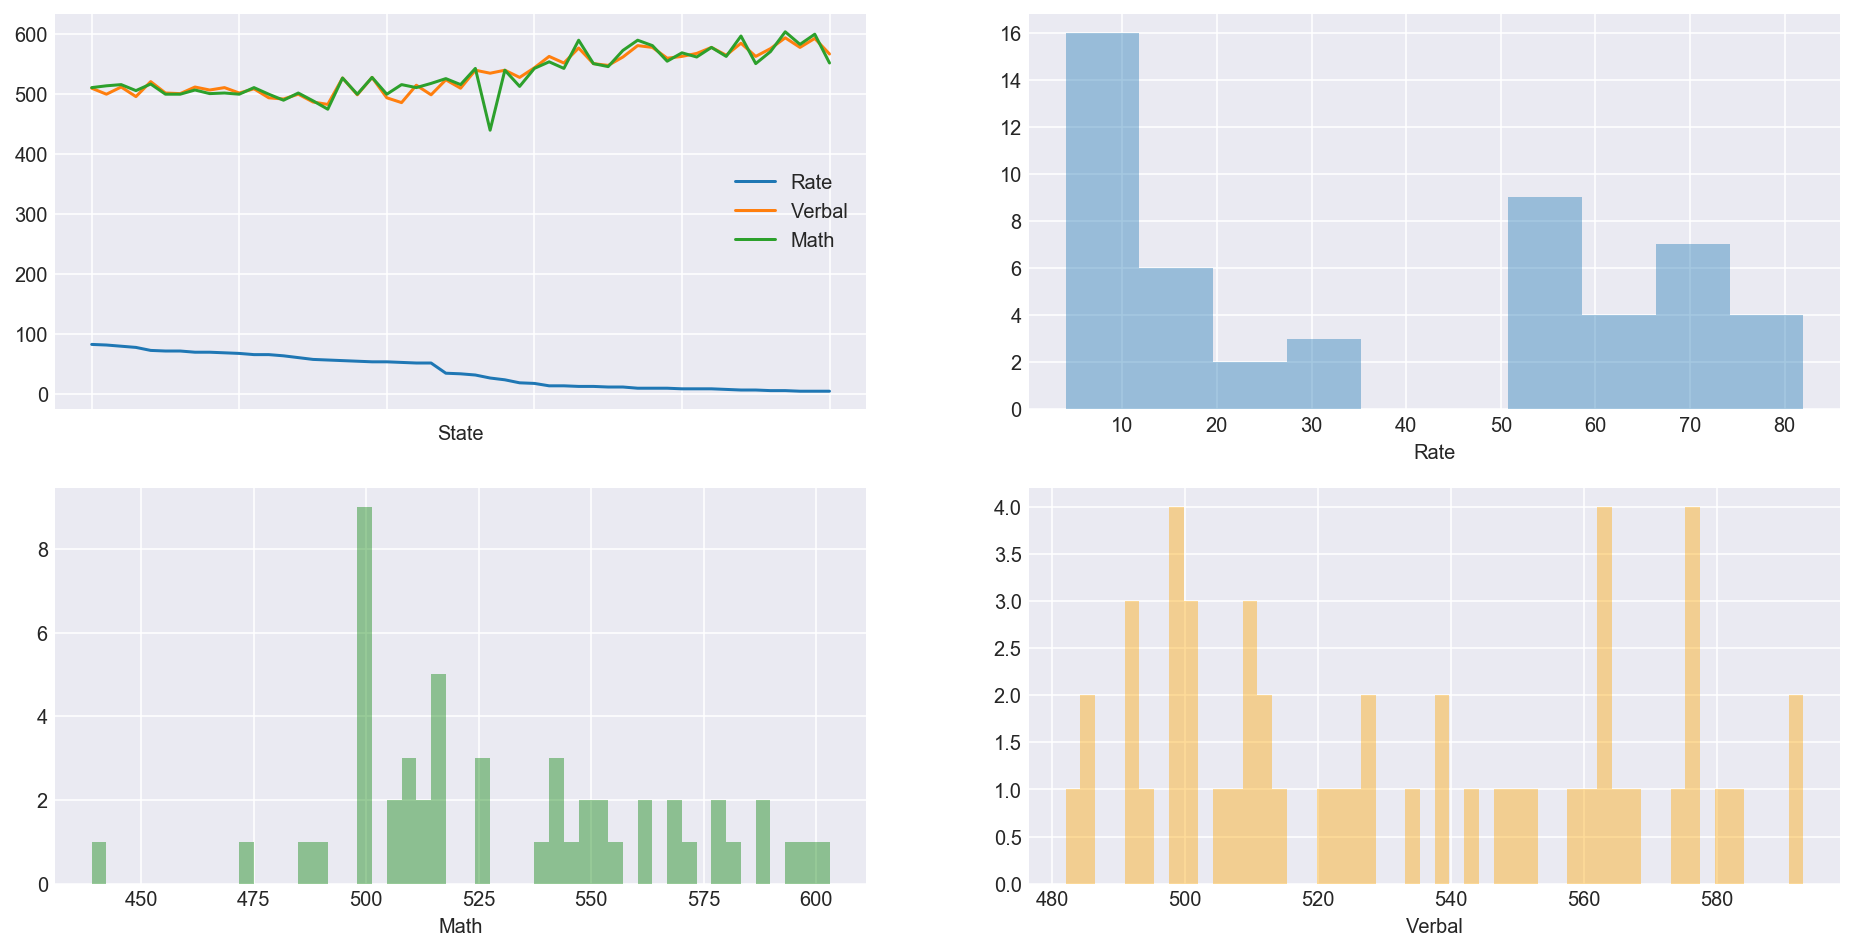

In [15]:
#['State', 'Rate', 'Verbal', 'Math']
fig, axes = plt.subplots(2,2, figsize=(16,8))

ax0 = satDf.plot(ax=axes[0][0])

ax1 = sns.distplot(satDf['Rate'], kde=False, bins=10, ax=axes[0][1], kde_kws={"label": "Rate"})
ax2 = sns.distplot(satDf['Math'], kde=False, bins=50, ax=axes[1][0], kde_kws={"label": "Math"}, color='green')
ax3 = sns.distplot(satDf['Verbal'], kde=False, bins=50, ax=axes[1][1], kde_kws={"label": "Verbal"}, color='orange')


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

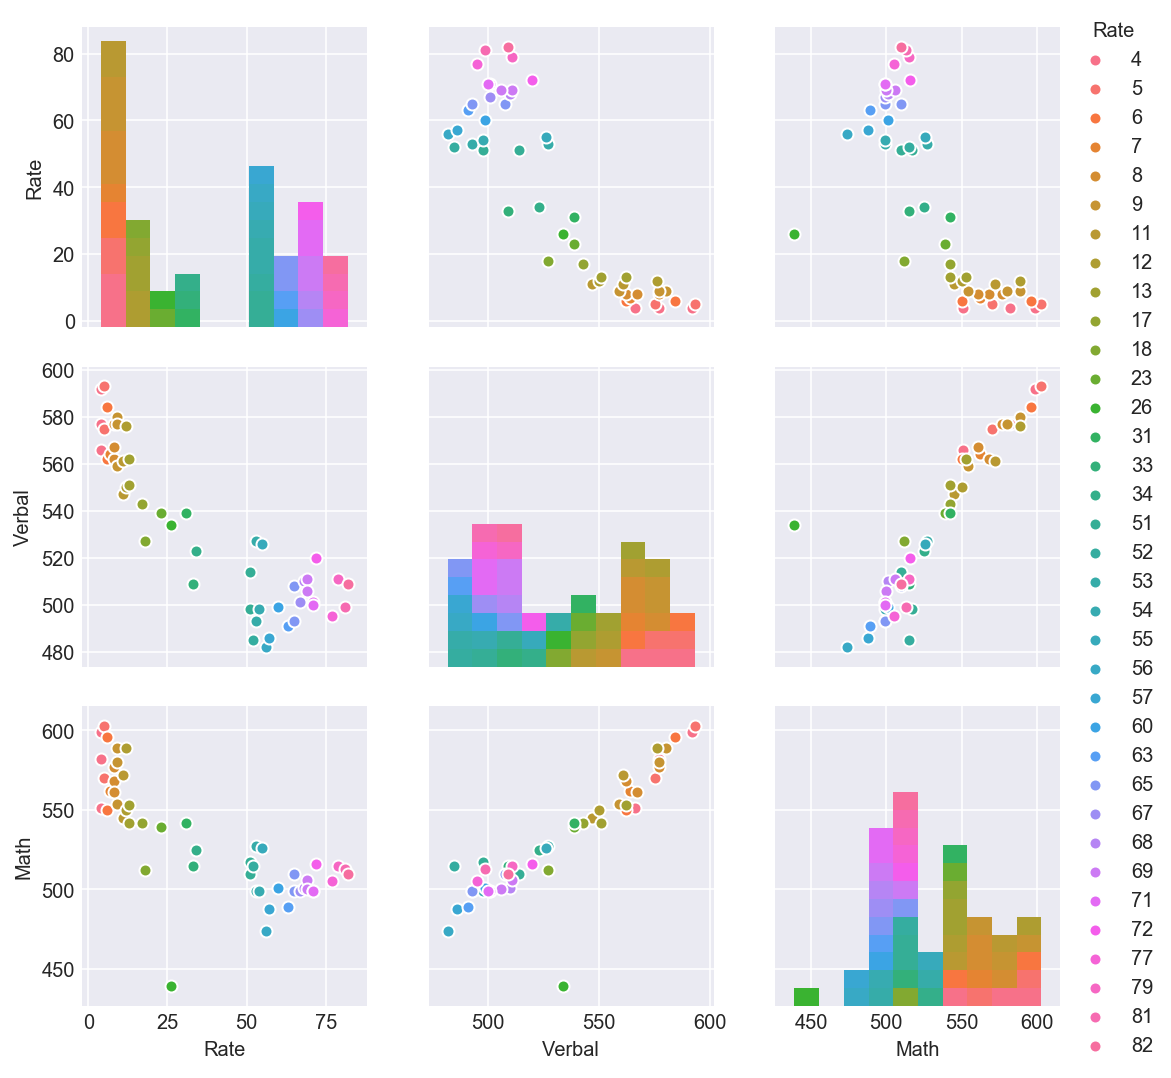

In [16]:
#sns.pairplot(satDf)
#sns.set_palette("Paired")
 #sns.pairplot(satDf, kind="reg", hue="Rate")
sns.pairplot(satDf, hue="Rate")
#sns.pairplot(satDf, hue="species", markers=["o", "s", "D"])

## Findings

[Rate and Verbal] and [Rate and Maths] have negative relationship 

While [Verbal and Math] have positive relationship


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [17]:
satDf.tail()

Rate  Verbal  Math
State                    
UT        5     575   570
IA        5     593   603
SD        4     577   582
ND        4     592   599
MS        4     566   551

Text(0.5,1,'Verbal and Maths per States')

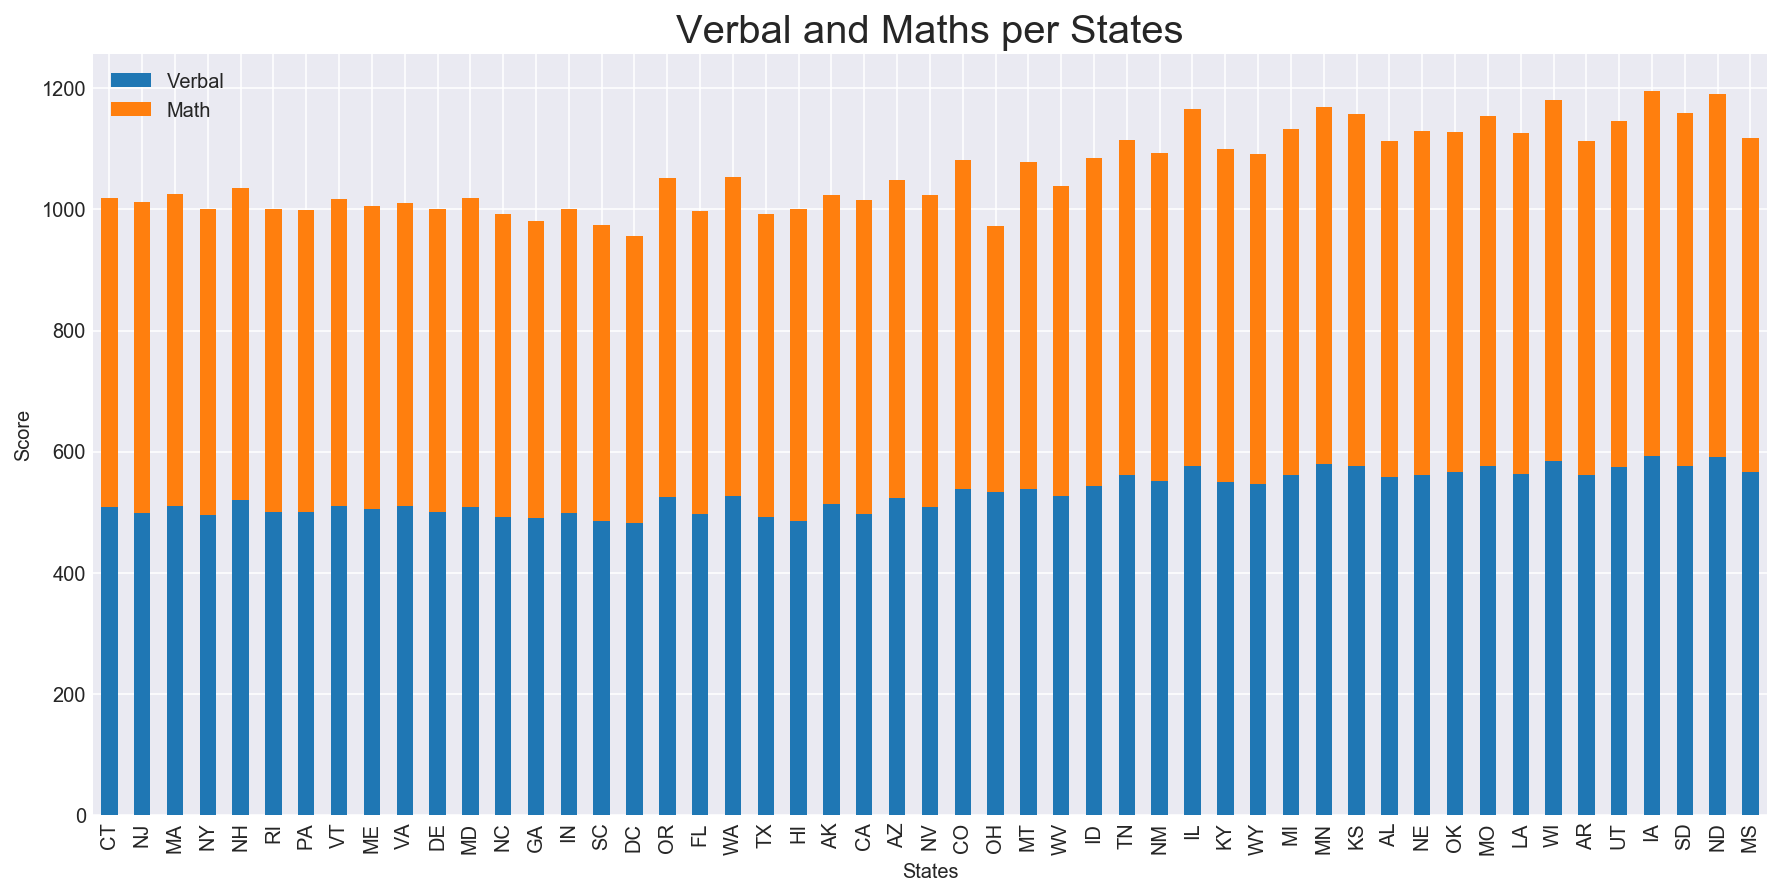

In [18]:

ax = satDf[['Verbal', 'Math']].plot(kind='bar', stacked=True, figsize=(15,7))

ax.set_ylabel("Score")
ax.set_xlabel("States")

ax.set_title("Verbal and Maths per States", fontsize=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5,1,'Rate, Verbal and Maths Score')

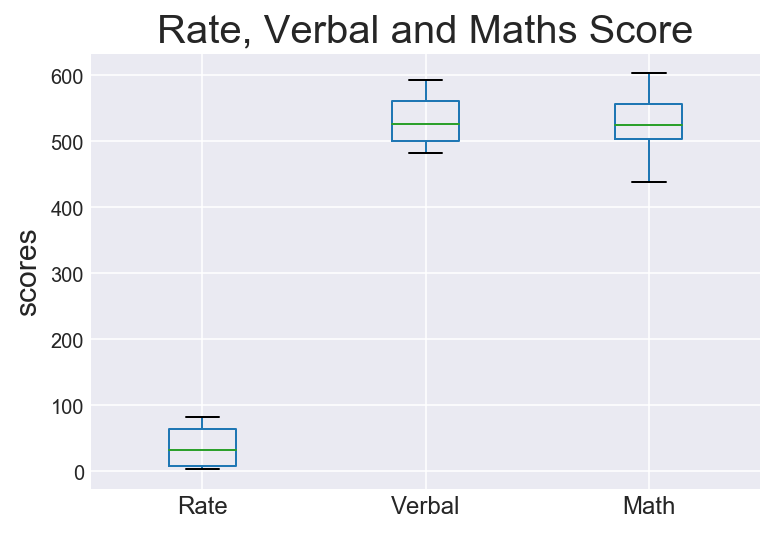

In [19]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
ax = satDf.plot.box()
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel("scores", fontsize='15')
ax.set_title("Rate, Verbal and Maths Score", fontsize='20')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Reference from: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc


In [20]:
from sklearn import preprocessing

# Get column names first
names = satDf.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(satDf)
scaled_df = pd.DataFrame(scaled_df, columns=names)

Text(0.5,1,'Rate, Verbal and Maths Score')

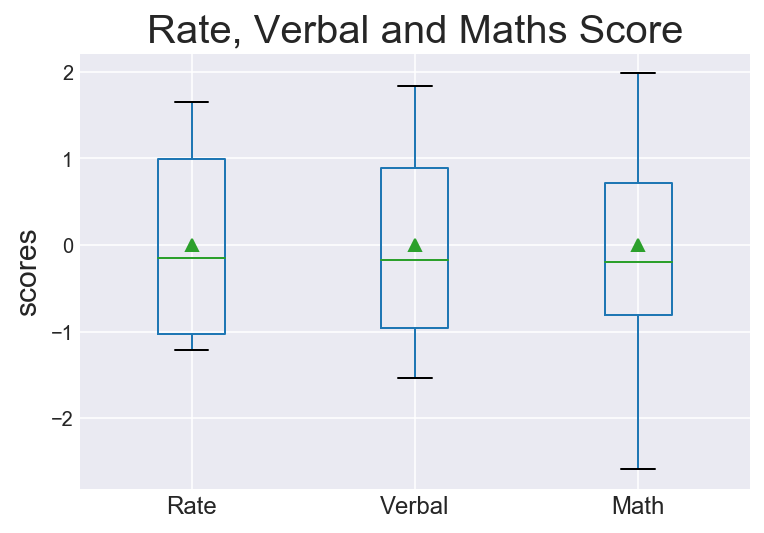

In [21]:
ax = scaled_df.plot.box(showmeans=True)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel("scores", fontsize='15')
ax.set_title("Rate, Verbal and Maths Score", fontsize='20')

Another way of doing the standardized data without using the library
Now this time, using the seaborn instead of the matplot lib
Also this time showing it horizontally

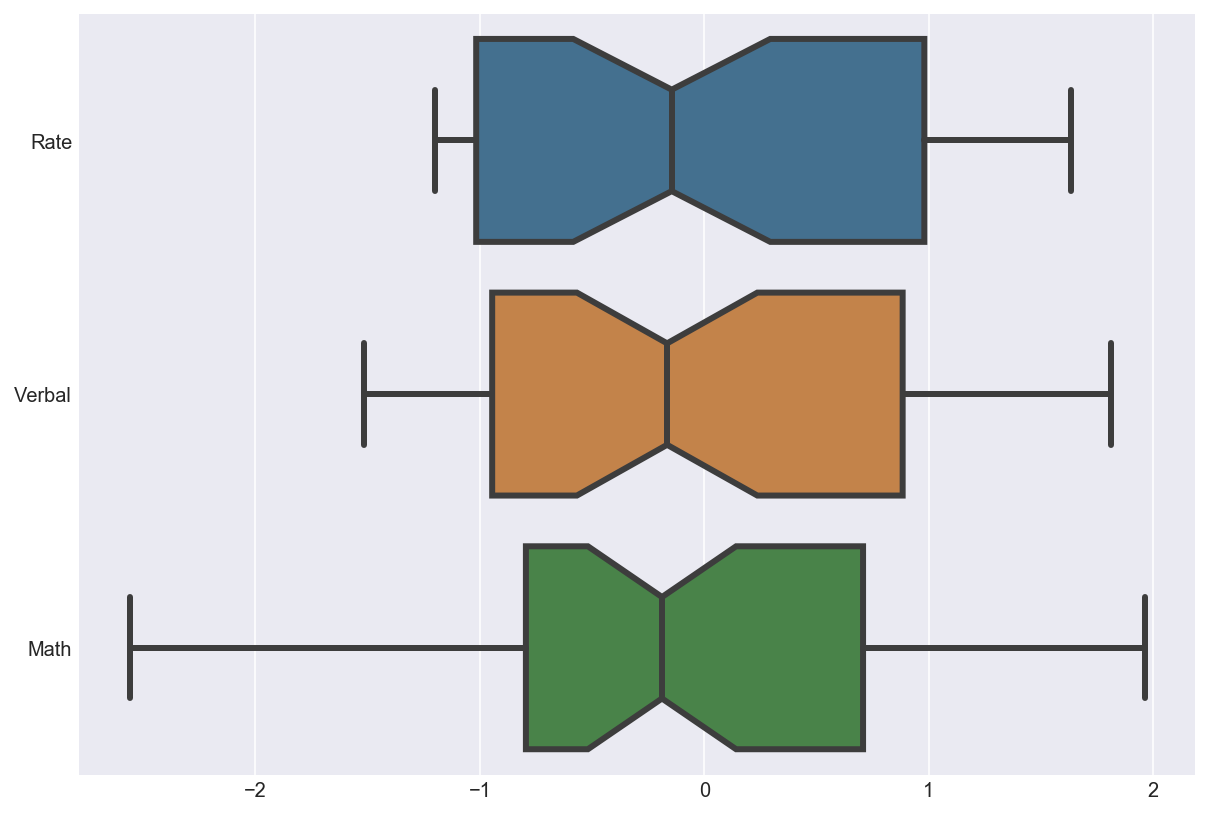

In [22]:
sat_stand = (satDf - satDf.mean()) / satDf.std()

fig = plt.figure(figsize=(10, 7))
ax = fig.gca()

ax = sns.boxplot(data=sat_stand, orient='h', fliersize=3, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
#find the mean (average) score

#mean_verbal_score = int(np.mean(satDf.loc[:, 'Verbal']))

mean_verbal_score = satDf['Verbal'].mean()

mean_verbal_score

532.5294117647059

In [24]:
#now find how many states have higher score than mean
higher_than_verbal_mean_df = satDf[satDf['Verbal'] > mean_verbal_score]
#higher_than_verbal_mean_df = satDf[satDf.loc[:, 'Verbal'] > mean_verbal_score]
higher_than_verbal_mean_df.head()

Rate  Verbal  Math
State                    
CO       31     539   542
OH       26     534   439
MT       23     539   539
ID       17     543   542
TN       13     562   553

In [25]:
print ("There are total of " + str(len(higher_than_verbal_mean_df)) + " states with score higher than mean " + str(mean_verbal_score))

There are total of 24 states with score higher than mean 532.5294117647059


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [26]:
# Find the middle value in the list 
#median_verbal_score = np.median(satDf.loc[:, 'Verbal'])
median_verbal_score = satDf['Verbal'].median()

In [27]:
#now find how many states have higher score than median
#higher_than_verbal_median_df = satDf[satDf['Verbal'] > median_verbal_score]

higher_than_verbal_median_df = satDf[satDf.loc[:, 'Verbal'] > median_verbal_score]
higher_than_verbal_median_df

Rate  Verbal  Math
State                    
CO       31     539   542
OH       26     534   439
MT       23     539   539
ID       17     543   542
TN       13     562   553
NM       13     551   542
IL       12     576   589
KY       12     550   550
WY       11     547   545
MI       11     561   572
MN        9     580   589
KS        9     577   580
AL        9     559   554
NE        8     562   568
OK        8     567   561
MO        8     577   577
LA        7     564   562
WI        6     584   596
AR        6     562   550
UT        5     575   570
IA        5     593   603
SD        4     577   582
ND        4     592   599
MS        4     566   551

In [28]:
print ("There are total of " + str(len(higher_than_verbal_median_df)) + 
       " states with score higher than median " + str(median_verbal_score))

There are total of 24 states with score higher than median 527.0


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [29]:
#using masking as requestd in the question
#satDf["Verbal_Math"] = satDf['Verbal'] - satDf['Math']

satDf["Verbal_Math"] = satDf.loc[:, 'Verbal'] - satDf.loc[:, 'Math']

satDf.head()

Rate  Verbal  Math  Verbal_Math
State                                 
CT       82     509   510           -1
NJ       81     499   513          -14
MA       79     511   515           -4
NY       77     495   505          -10
NH       72     520   516            4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

Reference: 
http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

#get list where the verbal > maths
#could have used .head(10) but practise using the masking operations

In [30]:
#sorted list
ver_math_df = satDf.sort_values('Verbal_Math', ascending=False) #, inplace=False)
ver_math_df.iloc[:10, :]

Rate  Verbal  Math  Verbal_Math
State                                 
OH       26     534   439           95
MS        4     566   551           15
WV       18     527   512           15
AR        6     562   550           12
TN       13     562   553            9
VA       68     510   501            9
NM       13     551   542            9
DC       56     482   474            8
ME       69     506   500            6
OK        8     567   561            6

#get list where the verbal < maths
#could have used .head(10) but practise using the masking operations

In [31]:
math_ver_df = satDf.sort_values('Verbal_Math', ascending=True)#, inplace=False)
math_ver_df.iloc[:10, :]

Rate  Verbal  Math  Verbal_Math
State                                 
HI       52     485   515          -30
CA       51     498   517          -19
NJ       81     499   513          -14
IL       12     576   589          -13
WI        6     584   596          -12
MI       11     561   572          -11
NY       77     495   505          -10
IA        5     593   603          -10
MN        9     580   589           -9
ND        4     592   599           -7

In [32]:
ver_math_df.head(3)

Rate  Verbal  Math  Verbal_Math
State                                 
OH       26     534   439           95
MS        4     566   551           15
WV       18     527   512           15

In [33]:
math_ver_df.head(3)

Rate  Verbal  Math  Verbal_Math
State                                 
HI       52     485   515          -30
CA       51     498   517          -19
NJ       81     499   513          -14

In [34]:
#del(satDf['Verbal_Math'])

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [35]:
satDf.corr()

Rate    Verbal      Math  Verbal_Math
Rate         1.000000 -0.888121 -0.773419    -0.098671
Verbal      -0.888121  1.000000  0.899909     0.044527
Math        -0.773419  0.899909  1.000000    -0.395574
Verbal_Math -0.098671  0.044527 -0.395574     1.000000

Reference
https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php
    
Are there guidelines to interpreting Pearson's correlation coefficient?
Yes, the following guidelines have been proposed:

guidelines have been proposed:

                             Coefficient, r
Strength of Association	
                        Positive      Negative
Small	                .1 to .3      -0.1 to -0.3
Medium	                .3 to .5      -0.3 to -0.5
Large	                .5 to 1.0     -0.5 to -1.0
    
    
These values are guidelines and whether an association is strong or not will also depend on what you are measuring.

## Findings
[Rate and Verbal] has higher negative relationship than [Rate and Maths]

While [Verbal and Math] have positive relationship and higest related than others


[Rate and Verbal] : -0.888121
[Rate and Maths]  : -0.773419
[Verbal and Math] :  0.899909

Also Verbal_Math are not as related to Verbal and Math as originally though.... hoovering around 0.5 and -4 


Though we are more interested in how Maths and Verbal are related.

The correlation can be easily seen in the heat map below

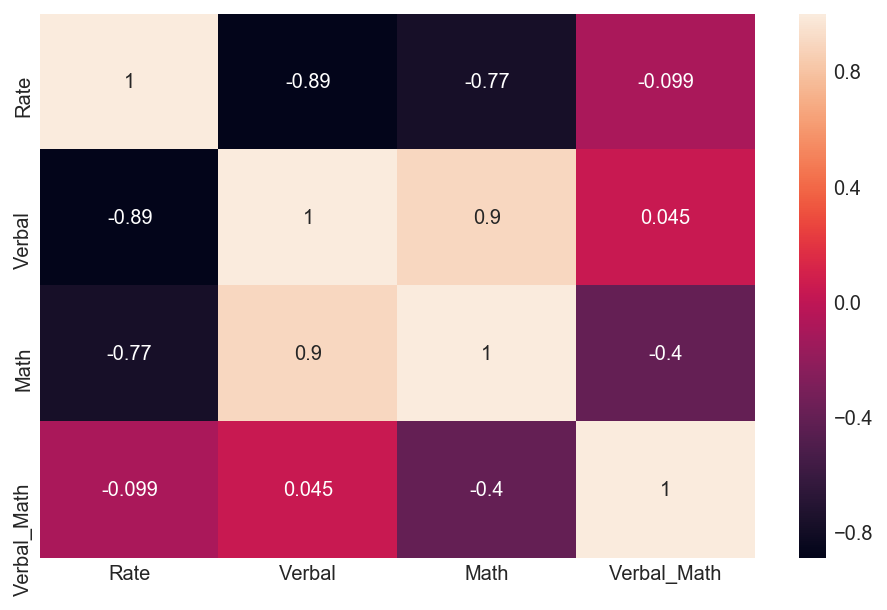

In [36]:
plt.figure(figsize=(8,5)) 
sns.heatmap(satDf.corr(), annot=True)

We further see how the Maths and Verbals are related using pair plots

In [37]:
ver_math_df.head(3)

Rate  Verbal  Math  Verbal_Math
State                                 
OH       26     534   439           95
MS        4     566   551           15
WV       18     527   512           15

In [38]:
math_ver_df.head(3)

Rate  Verbal  Math  Verbal_Math
State                                 
HI       52     485   515          -30
CA       51     498   517          -19
NJ       81     499   513          -14

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
satDf.describe()

Rate      Verbal        Math  Verbal_Math
count  51.000000   51.000000   51.000000    51.000000
mean   37.000000  532.529412  531.843137     0.686275
std    27.550681   33.360667   36.287393    15.839811
min     4.000000  482.000000  439.000000   -30.000000
25%     9.000000  501.000000  503.000000    -6.000000
50%    33.000000  527.000000  525.000000     0.000000
75%    64.000000  562.000000  557.500000     4.500000
max    82.000000  593.000000  603.000000    95.000000

count: number of data rows in the data set
mean: mean of the column
std: standard deviation of the column
min: minimum value of the column
25%: 25% quantile
50%: the median
75%  75% quantile
max:  maximum value in the column

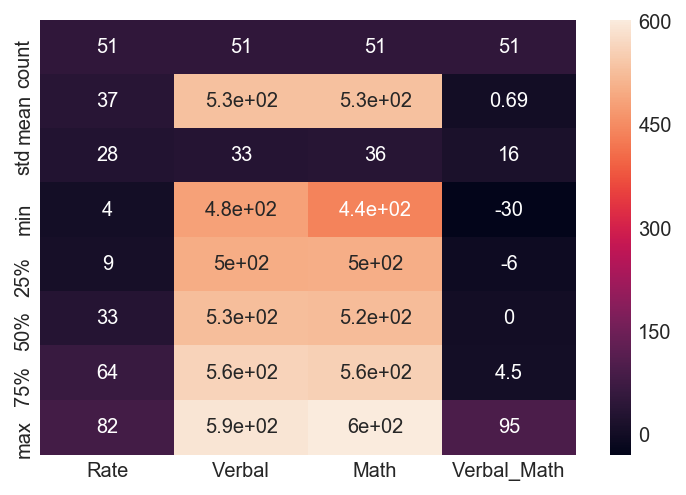

In [40]:
sns.heatmap(satDf.describe(), annot=True)

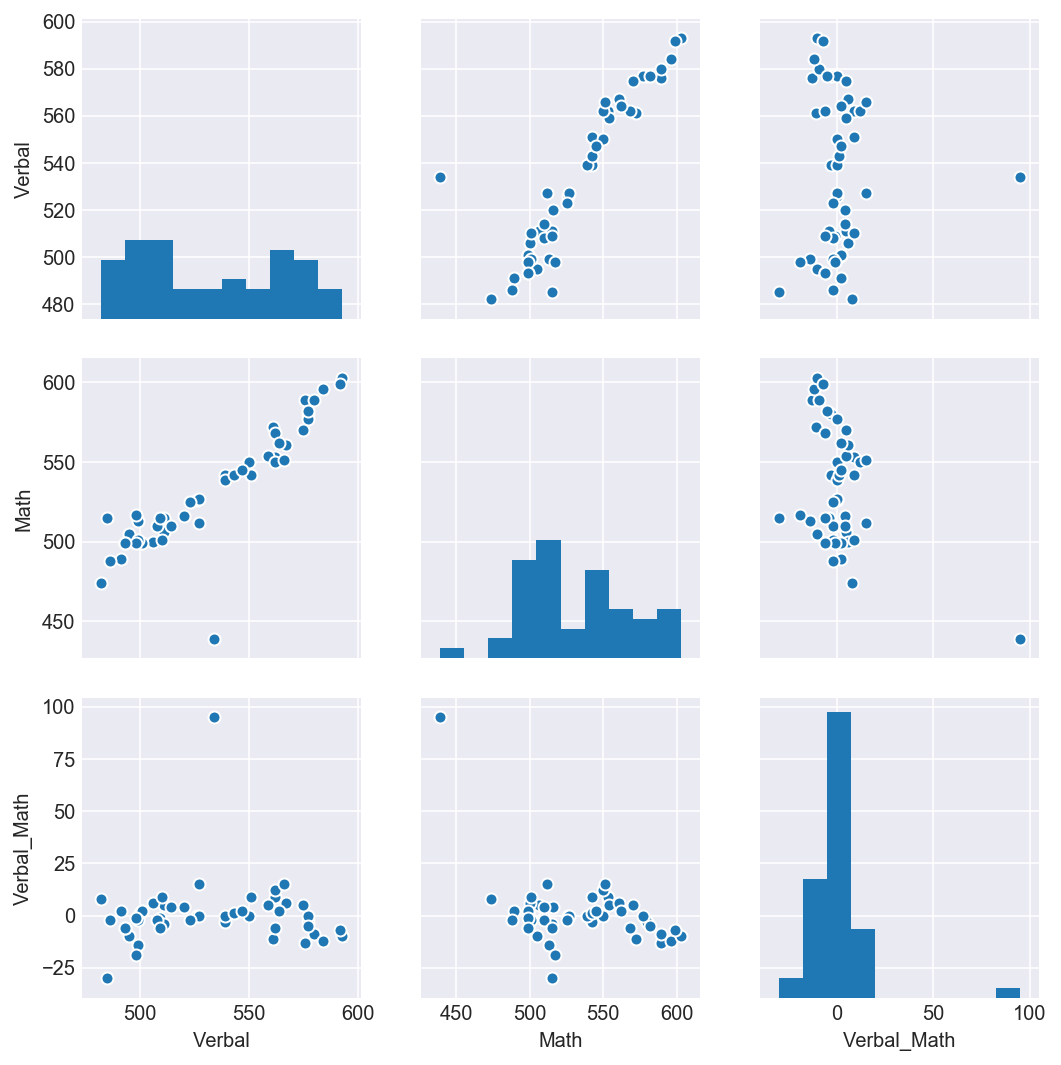

In [41]:
sns.pairplot(satDf[['Verbal', 'Math', 'Verbal_Math']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [42]:
satDf.cov()

Rate       Verbal         Math  Verbal_Math
Rate         759.04  -816.280000  -773.220000   -43.060000
Verbal      -816.28  1112.934118  1089.404706    23.529412
Math        -773.22  1089.404706  1316.774902  -227.370196
Verbal_Math  -43.06    23.529412  -227.370196   250.899608

Reference 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


In [43]:

scipy.stats.pearsonr(satDf['Verbal'], satDf['Math'])

(0.8999093181811048, 2.735579353543464e-19)

## Explanation
The covariance is a measure of "relatedness" between variables. 
It is literally the sum of deviations from the mean of  XX  times deviations from the mean of  YY adjusted by the sample size  NN.


Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$


Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one directly calculable from the covariance, is the correlation.


### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

So correlation uses Covariance and then scaled it using stadard deviations

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

## Explaination

Yes the data requires cleaning.  Some data are entered as "-" instead of float data, replace those with 0 value
Age value, some are entered as age bracket, so will need to find the average age to replace age bracket value.

Thre are no empty data as all of them have non-null values 

In [44]:
drugDf = pd.read_csv(drugFile)

In [45]:
drugDf.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [46]:
drugDf.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  crack-use  heroin-use  \
count            17.000000    17.000000  17.000000   17.000000   
mean             42.941176     2.176471   0.294118    0.352941   
std              18.362566     1.816772   0.235772    0.333762   
min               4.000000     0.000000   0.000000    0.000000   
25%              30.000000     0.500000   0.000000    0.100000   
50%              52.000000     2.000000   0.400000    0.200000   
75%              52.000000     4.000000   0.500000    0.600000   
max              72.000000     4.900000   0.600000    1.100000   

       hallucinogen-use  hallucinogen-frequency         ...          \
count         17.000000               17.000000         ...           
mean           3.394118                8.411765         ...           
std            2.792506               15.000245         ...           
min            0.100000                2.000000         ...           
25%            0.600000                3.000000         ...           
50%            3.200000                3.000000         ...           
75%            5.200000                4.000000         ...           
max            8.600000               52.000000         ...           

       pain-releiver-use  pain-releiver-frequency  oxycontin-use  \
count          17.000000                17.000000      17.000000   
mean            6.270588                14.705882       0.935294   
std             3.166379                 6.935098       0.608216   
min             0.600000                 7.000000       0.000000   
25%             3.900000                12.000000       0.400000   
50%             6.200000                12.000000       1.100000   
75%             9.000000                15.000000       1.400000   
max            10.000000                36.000000       1.700000   

       tranquilizer-use  tranquilizer-frequency  stimulant-use  \
count         17.000000               17.000000      17.000000   
mean           2.805882               11.735294       1.917647   
std            1.753379               11.485205       1.407673   
min            0.200000                4.500000       0.000000   
25%            1.400000                6.000000       0.600000   
50%            3.500000               10.000000       1.800000   
75%            4.200000               11.000000       3.000000   
max            5.400000               52.000000       4.100000   

       stimulant-frequency   meth-use  sedative-use  sedative-frequency  
count            17.000000  17.000000     17.000000           17.000000  
mean             31.147059   0.382353      0.282353           19.382353  
std              85.973790   0.262762      0.138000           24.833527  
min               2.000000   0.000000      0.000000            3.000000  
25%               7.000000   0.200000      0.200000            6.500000  
50%              10.000000   0.400000      0.300000           10.000000  
75%              12.000000   0.600000      0.400000           17.500000  
max             364.000000   0.900000      0.500000          104.000000  

[8 rows x 21 columns]

In [47]:
drugDf.isnull().values.any()

False

In [48]:
drugDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [49]:
drugDf.head(20)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0                -        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2                -        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [50]:
drugDf.describe().T

count         mean          std     min     25%  \
n                         17.0  3251.058824  1297.890426  2223.0  2469.0   
alcohol-use               17.0    55.429412    26.878866     3.9    40.1   
alcohol-frequency         17.0    33.352941    21.318833     3.0    10.0   
marijuana-use             17.0    18.923529    11.959752     1.1     8.7   
marijuana-frequency       17.0    42.941176    18.362566     4.0    30.0   
cocaine-use               17.0     2.176471     1.816772     0.0     0.5   
crack-use                 17.0     0.294118     0.235772     0.0     0.0   
heroin-use                17.0     0.352941     0.333762     0.0     0.1   
hallucinogen-use          17.0     3.394118     2.792506     0.1     0.6   
hallucinogen-frequency    17.0     8.411765    15.000245     2.0     3.0   
inhalant-use              17.0     1.388235     0.927283     0.0     0.6   
pain-releiver-use         17.0     6.270588     3.166379     0.6     3.9   
pain-releiver-frequency   17.0    14.705882     6.935098     7.0    12.0   
oxycontin-use             17.0     0.935294     0.608216     0.0     0.4   
tranquilizer-use          17.0     2.805882     1.753379     0.2     1.4   
tranquilizer-frequency    17.0    11.735294    11.485205     4.5     6.0   
stimulant-use             17.0     1.917647     1.407673     0.0     0.6   
stimulant-frequency       17.0    31.147059    85.973790     2.0     7.0   
meth-use                  17.0     0.382353     0.262762     0.0     0.2   
sedative-use              17.0     0.282353     0.138000     0.0     0.2   
sedative-frequency        17.0    19.382353    24.833527     3.0     6.5   

                            50%     75%     max  
n                        2798.0  3058.0  7391.0  
alcohol-use                64.6    77.5    84.2  
alcohol-frequency          48.0    52.0    52.0  
marijuana-use              20.8    28.4    34.0  
marijuana-frequency        52.0    52.0    72.0  
cocaine-use                 2.0     4.0     4.9  
crack-use                   0.4     0.5     0.6  
heroin-use                  0.2     0.6     1.1  
hallucinogen-use            3.2     5.2     8.6  
hallucinogen-frequency      3.0     4.0    52.0  
inhalant-use                1.4     2.0     3.0  
pain-releiver-use           6.2     9.0    10.0  
pain-releiver-frequency    12.0    15.0    36.0  
oxycontin-use               1.1     1.4     1.7  
tranquilizer-use            3.5     4.2     5.4  
tranquilizer-frequency     10.0    11.0    52.0  
stimulant-use               1.8     3.0     4.1  
stimulant-frequency        10.0    12.0   364.0  
meth-use                    0.4     0.6     0.9  
sedative-use                0.3     0.4     0.5  
sedative-frequency         10.0    17.5   104.0

In [51]:
ageAll = len(np.array(drugDf['age']))

In [52]:
ageUnique = len(drugDf['age'].unique())

In [53]:
#confirm that ages have unigue values
assert (ageAll == ageUnique)

In [54]:
# convert all data to float
def data_cleaner(x):
    #remove empty space if any
    x = x.replace(' ', '')
    
    #convert to float where possible
    x = x.replace('-','0')
    try:
        return float(x)
    except:
        return float(0)

In [55]:
# check data and clean
def age_conversion(x):
    
    returnAge = 0.0
    x = str(x)
    try:
        #remove empty space if any
        x = x.replace(' ', '')
    except:
        pass
    
    #find symbols in text
    dash = "-"
    plus = "+"
    indexDash = x.find(dash)
    indexPlus = x.find(plus)
    
    #get the age value
    if indexDash > 0:
        #found dash, get average value
        returnAge = (float(x[:indexDash]) + float(x[indexDash+1:]))/2
    elif indexPlus > 0:
        #found plus, get the age only
        returnAge = x[:indexPlus]
    else:
        returnAge = x

    #turn to float instead of string
    try:
        float(returnAge)
    except:
        returnAge = float(0)
        
    return (returnAge)

In [56]:
#go through all columns with object type values
#excect age, and convert data including '-' to float

for colName in drugDf.columns:
    #print (colName, drugDf[[colName]].dtypes.values)
    #check if it is an object type
    if drugDf[[colName]].dtypes.values[0] == 'O':
        if (colName != 'age'):
            #print (colName)
            drugDf[colName] = drugDf[colName].map(data_cleaner)        
        elif (colName == 'age'):
            #perform addiional cleaning
            #i.e. 12, 22-23 or 65+
            drugDf[colName] = drugDf[colName].map(age_conversion)

In [57]:
#trying to put the age back in as the index by using dictionary
ageIndex = np.array(drugDf['age']).astype(int)
print (ageIndex)
ageDict = dict(zip(range(17), ageIndex))
#ageDict

[12 13 14 15 16 17 18 19 20 21 22 24 27 32 42 57 65]


In [58]:
#now set the index column as age
drugDf.set_index('age')
drugDf['age'] = ageIndex

In [59]:
drugDf.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12  2798          3.9                3.0            1.1   
1   13  2757          8.5                6.0            3.4   
2   14  2792         18.1                5.0            8.7   
3   15  2956         29.2                6.0           14.5   
4   16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0              0.0         ...                    0.1                 24.5   
1              3.0         ...                    0.1                 41.0   
2              0.0         ...                    0.4                  4.5   
3              9.5         ...                    0.8                  3.0   
4              1.0         ...                    1.1                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             0.0           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   
3                  6.0       0.3            10.5           0.4   
4                  9.5       0.3            36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 28 columns]

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!


To be done

## 
Reference: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age
Usage is in percentage (values is 0 - 100)
Frequency is median

try to do the pair plot like 6.2

sns.pairplot(satDf[['Verbal', 'Math', 'Verbal_Math']]) or scatter plot or stripplot

based on the age and the usage is already percentage, so the x should be age, y should be percentage

based on the age and the freq is medain, so the x should be again by age, and y should be median value

median can be converted to percentage or not?  i.e sum per freq type... then use that value over it

how to do it>>>>>

In [60]:
drugDf

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0    12  2798          3.9                3.0            1.1   
1    13  2757          8.5                6.0            3.4   
2    14  2792         18.1                5.0            8.7   
3    15  2956         29.2                6.0           14.5   
4    16  3058         40.1               10.0           22.5   
5    17  3038         49.3               13.0           28.0   
6    18  2469         58.7               24.0           33.7   
7    19  2223         64.6               36.0           33.4   
8    20  2271         69.7               48.0           34.0   
9    21  2354         83.2               52.0           33.0   
10   22  4707         84.2               52.0           28.4   
11   24  4591         83.1               52.0           24.9   
12   27  2628         80.7               52.0           20.8   
13   32  2864         77.5               52.0           16.4   
14   42  7391         75.0               52.0           10.4   
15   57  3923         67.2               52.0            7.3   
16   65  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0               0.0         ...                    0.1                 24.5   
1               3.0         ...                    0.1                 41.0   
2               0.0         ...                    0.4                  4.5   
3               9.5         ...                    0.8                  3.0   
4               1.0         ...                    1.1                  4.0   
5              21.0         ...                    1.4                  6.0   
6              10.0         ...                    1.7                  7.0   
7               2.0         ...                    1.5                  7.5   
8               5.0         ...                    1.7                 12.0   
9              17.0         ...                    1.3                 13.5   
10              5.0         ...                    1.7                 17.5   
11              6.0         ...                    1.3                 20.0   
12              6.0         ...                    1.2                 13.5   
13             15.0         ...                    0.9                 46.0   
14             48.0         ...                    0.3                 12.0   
15             62.0         ...                    0.4                  5.0   
16              0.0         ...                    0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    2

In [61]:
#get the -use and -frequency into a columns and make a sum per age
drugDf.describe()

age            n  alcohol-use  alcohol-frequency  marijuana-use  \
count  17.000000    17.000000    17.000000          17.000000      17.000000   
mean   25.529412  3251.058824    55.429412          33.352941      18.923529   
std    15.362770  1297.890426    26.878866          21.318833      11.959752   
min    12.000000  2223.000000     3.900000           3.000000       1.100000   
25%    16.000000  2469.000000    40.100000          10.000000       8.700000   
50%    20.000000  2798.000000    64.600000          48.000000      20.800000   
75%    27.000000  3058.000000    77.500000          52.000000      28.400000   
max    65.000000  7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency         ...          oxycontin-use  \
count        17.000000         ...              17.000000   
mean         12.382353         ...               0.935294   
std          17.361532         ...               0.608216   
min           0.000000         ...               0.000000   
25%           2.000000         ...               0.400000   
50%           6.000000         ...               1.100000   
75%          15.000000         ...               1.400000   
max          62.000000         ...               1.700000   

       oxycontin-frequency  tranquilizer-use  tranquilizer-frequency  \
count            17.000000         17.000000               17.000000   
mean             13.941176          2.805882               11.735294   
std              12.902134          1.753379               11.485205   
min               0.000000          0.200000                4.500000   
25%               5.000000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              17.500000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant-use  stimulant-frequency   meth-use  meth-frequency  \
count      17.000000            17.000000  17.000000       17.000000   
mean        1.917647            31.147059   0.382353       31.735294   
std         1.407673            85.973790   0.262762       32.206423   
min         0.000000             2.000000   0.000000        0.000000   
25%         0.600000             7.000000   0.200000       10.500000   
50%         1.800000            10.000000   0.400000       24.000000   
75%         3.000000            12.000000   0.600000       46.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 28 columns]

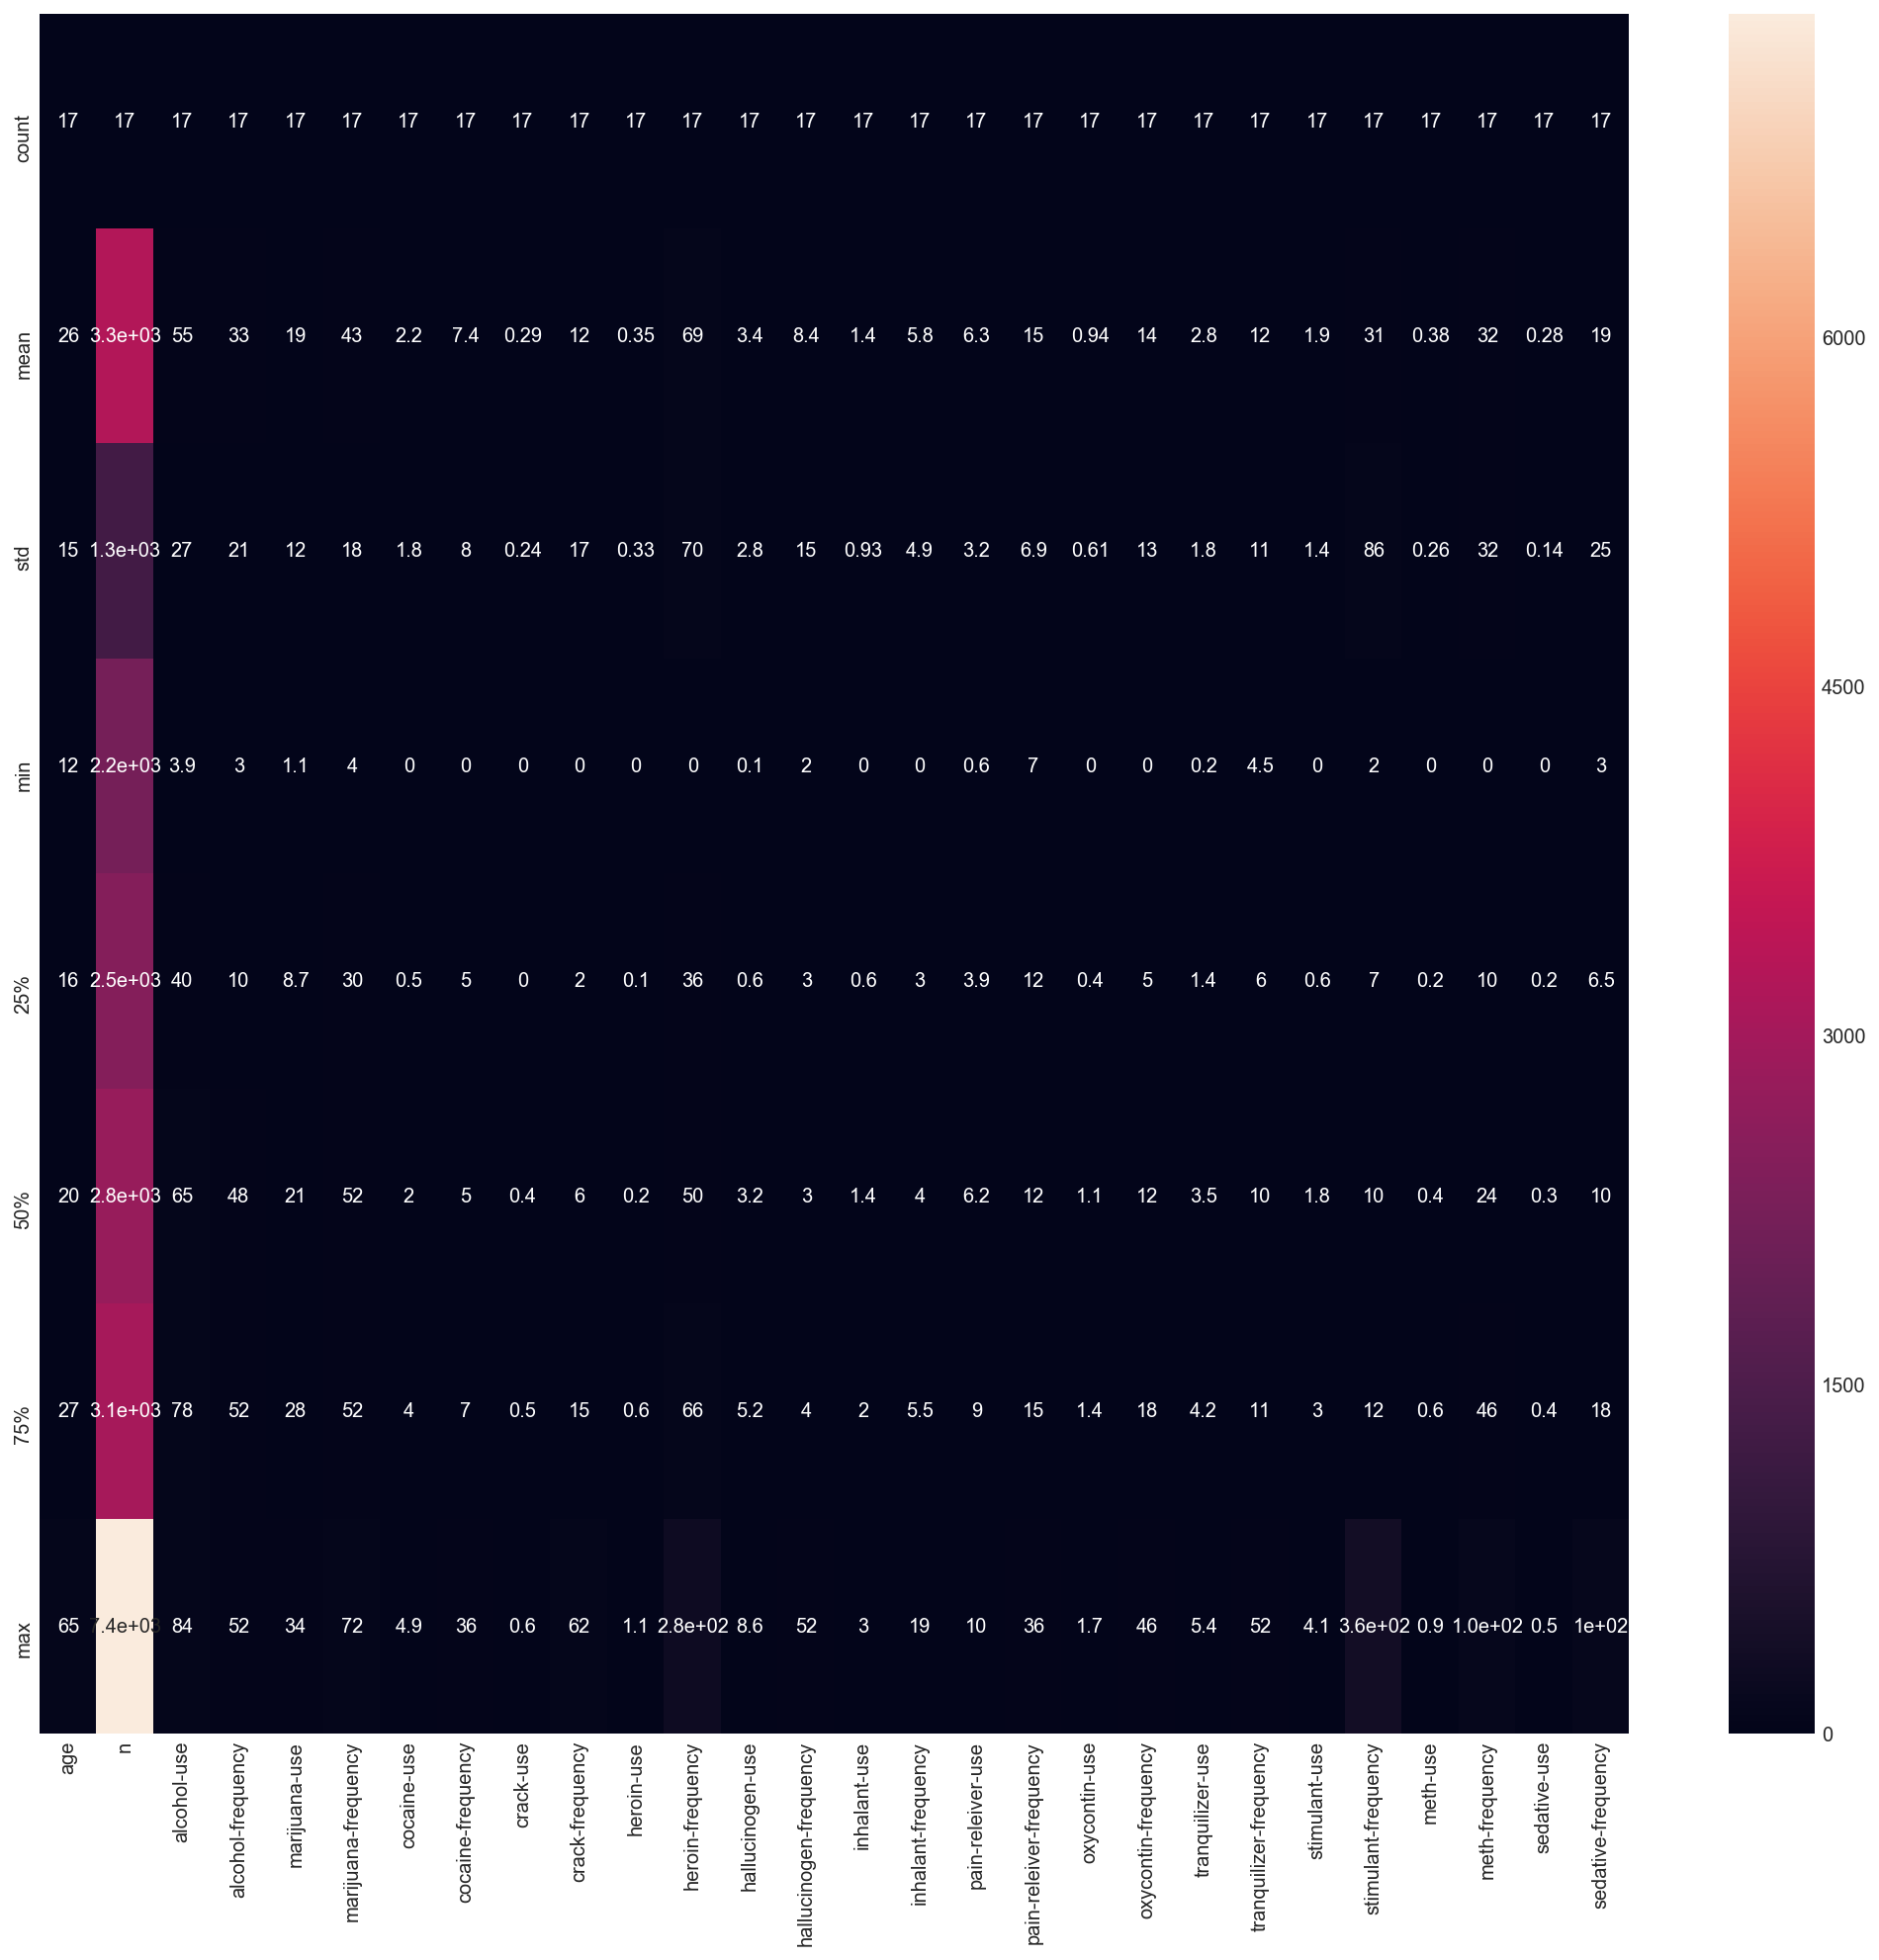

In [62]:
plt.figure(figsize=(18, 16))
sns.heatmap(drugDf.describe(), annot=True)

In [63]:
#trying to put the age back in as the index by using dictionary
ageIndex = np.array(drugDf['age']).astype(int)
print (ageIndex)

[12 13 14 15 16 17 18 19 20 21 22 24 27 32 42 57 65]


In [64]:
ageDict = dict(zip(range(17), ageIndex))
#ageDict

In [65]:
#getting the columns names wiht use
use_cols = [colName for colName in drugDf.columns if 'use' in colName ]
#use_cols
#getting columns only for use cols
usageSeries = drugDf[use_cols]
usageDf = pd.DataFrame(usageSeries)
usageDf.rename(index = ageDict, inplace=True)
usageDf.describe()

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
count    17.000000      17.000000    17.000000  17.000000   17.000000   
mean     55.429412      18.923529     2.176471   0.294118    0.352941   
std      26.878866      11.959752     1.816772   0.235772    0.333762   
min       3.900000       1.100000     0.000000   0.000000    0.000000   
25%      40.100000       8.700000     0.500000   0.000000    0.100000   
50%      64.600000      20.800000     2.000000   0.400000    0.200000   
75%      77.500000      28.400000     4.000000   0.500000    0.600000   
max      84.200000      34.000000     4.900000   0.600000    1.100000   

       hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
count         17.000000     17.000000          17.000000      17.000000   
mean           3.394118      1.388235           6.270588       0.935294   
std            2.792506      0.927283           3.166379       0.608216   
min            0.100000      0.000000           0.600000       0.000000   
25%            0.600000      0.600000           3.900000       0.400000   
50%            3.200000      1.400000           6.200000       1.100000   
75%            5.200000      2.000000           9.000000       1.400000   
max            8.600000      3.000000          10.000000       1.700000   

       tranquilizer-use  stimulant-use   meth-use  sedative-use  
count         17.000000      17.000000  17.000000     17.000000  
mean           2.805882       1.917647   0.382353      0.282353  
std            1.753379       1.407673   0.262762      0.138000  
min            0.200000       0.000000   0.000000      0.000000  
25%            1.400000       0.600000   0.200000      0.200000  
50%            3.500000       1.800000   0.400000      0.300000  
75%            4.200000       3.000000   0.600000      0.400000  
max            5.400000       4.100000   0.900000      0.500000

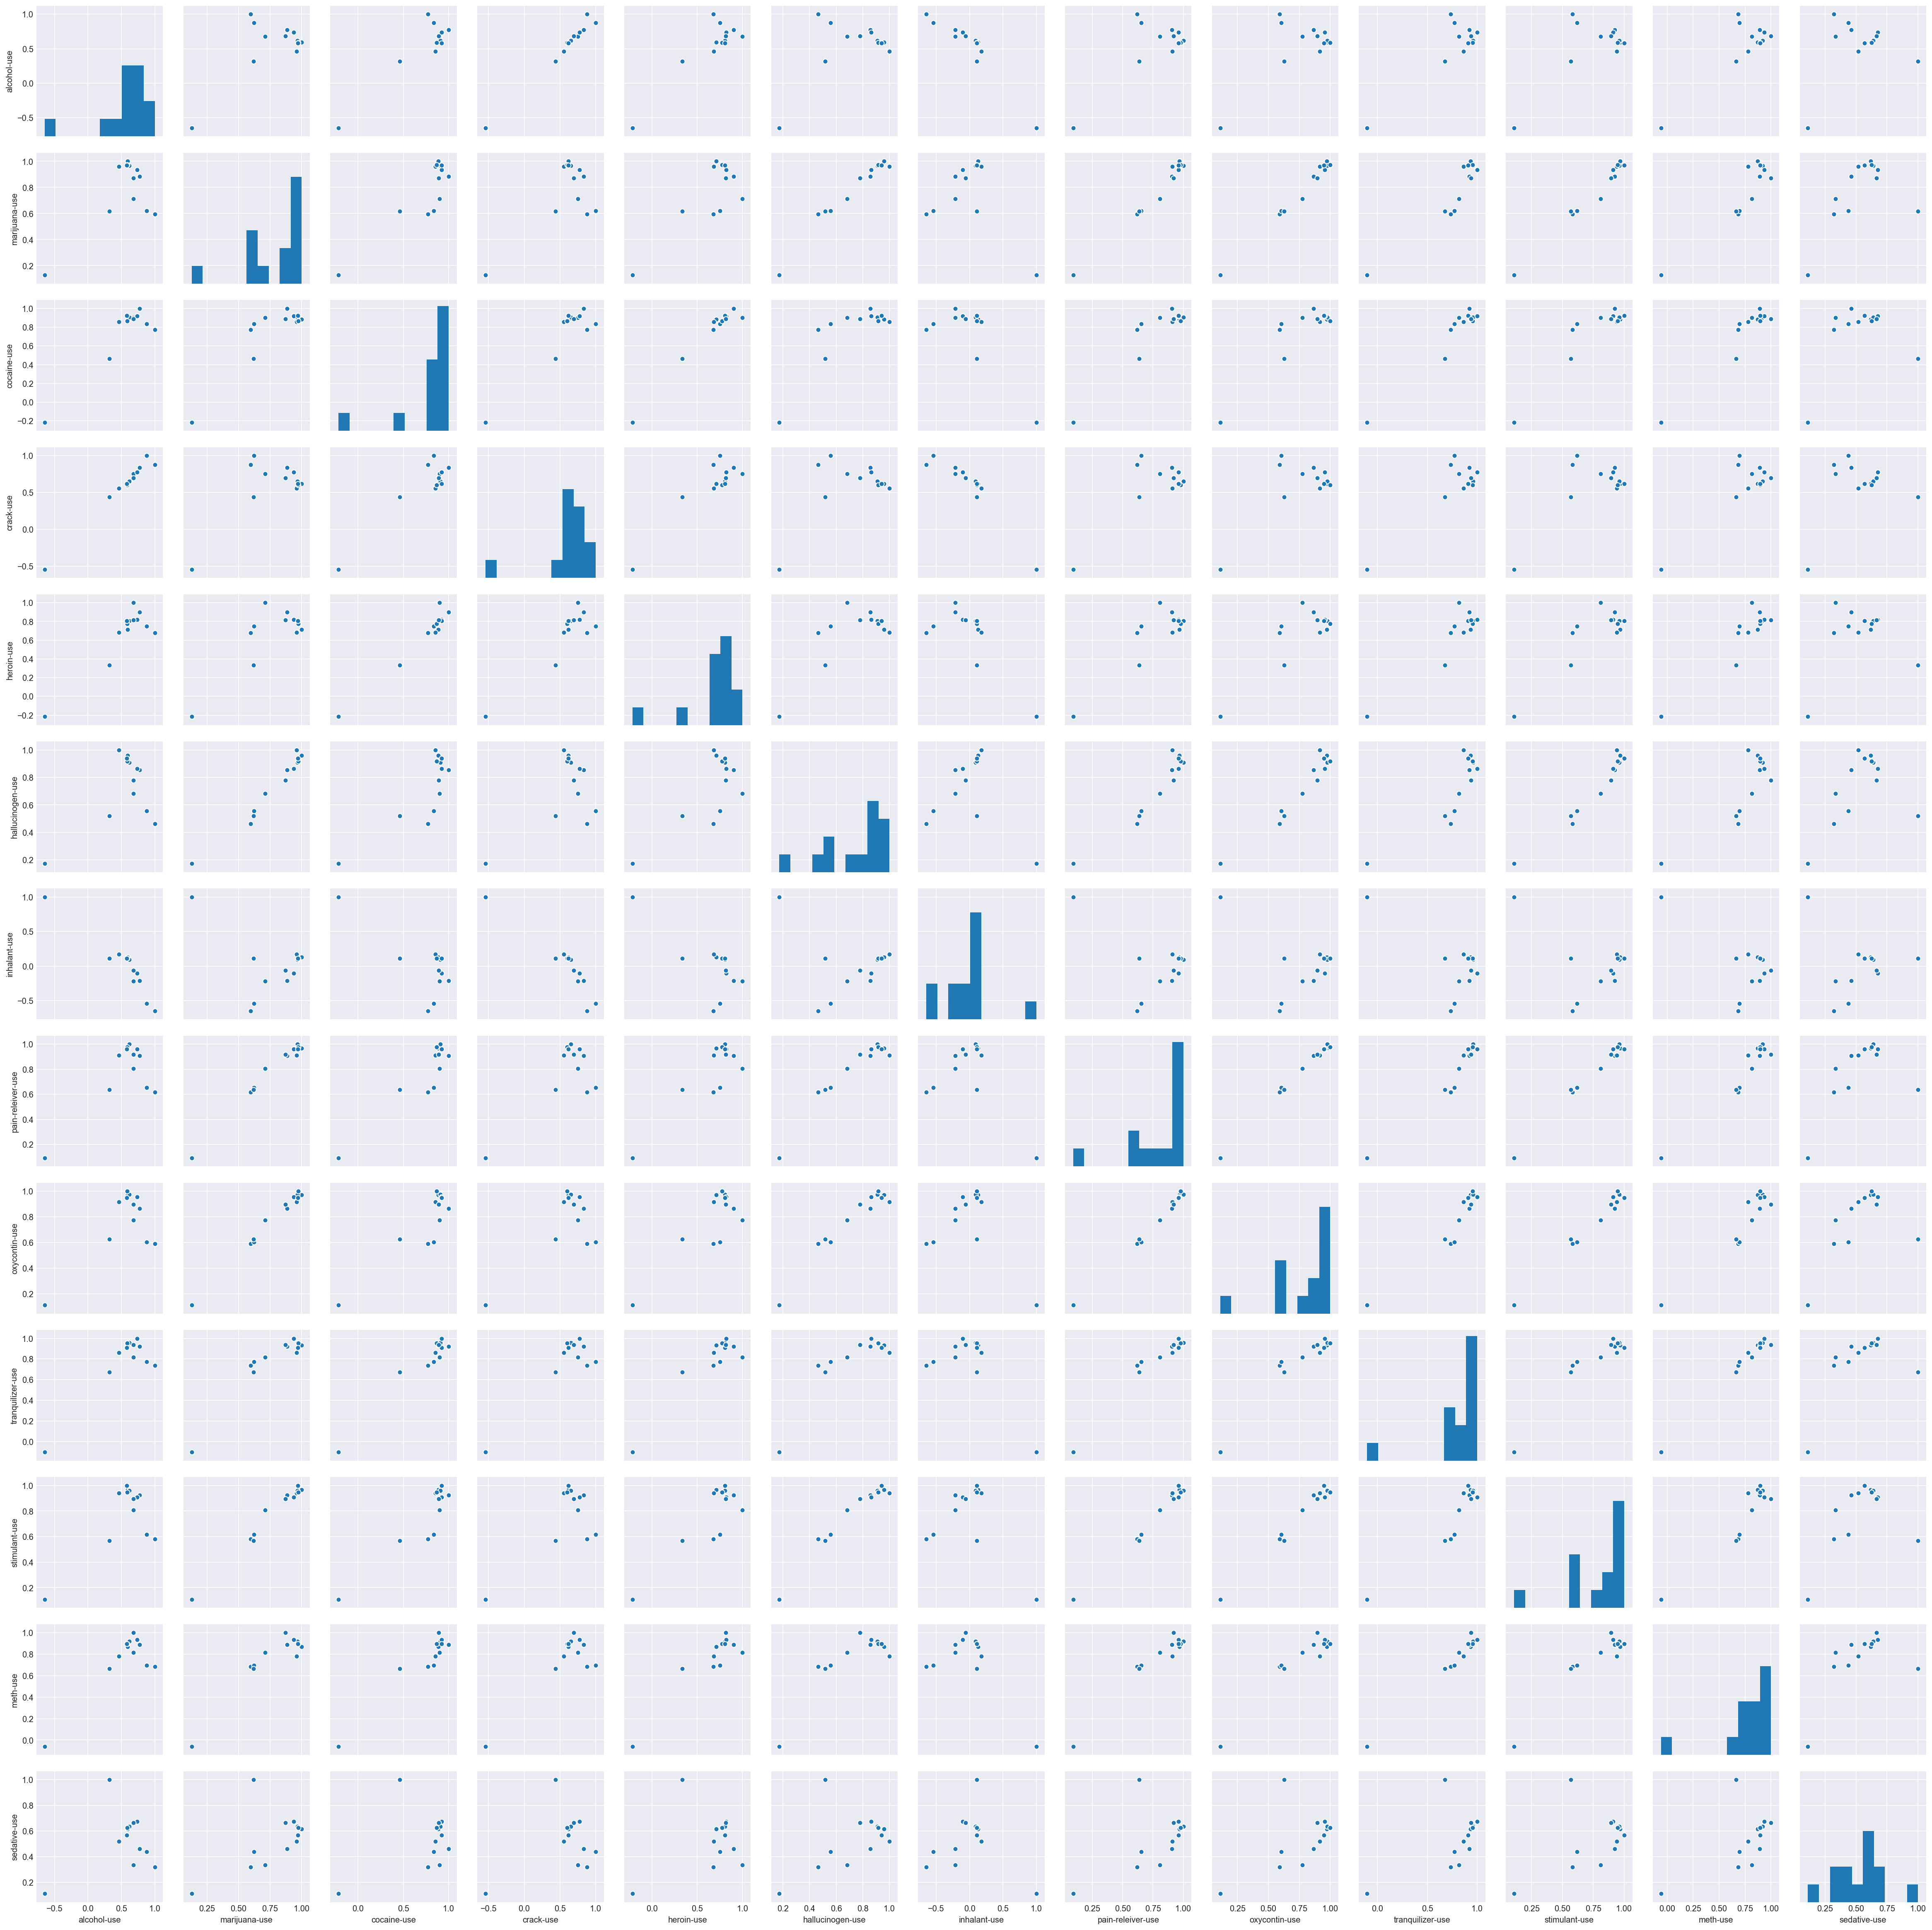

In [66]:
sns.pairplot(usageDf.corr())

Drugs uses correlation seem pretty high towards the upper right corner

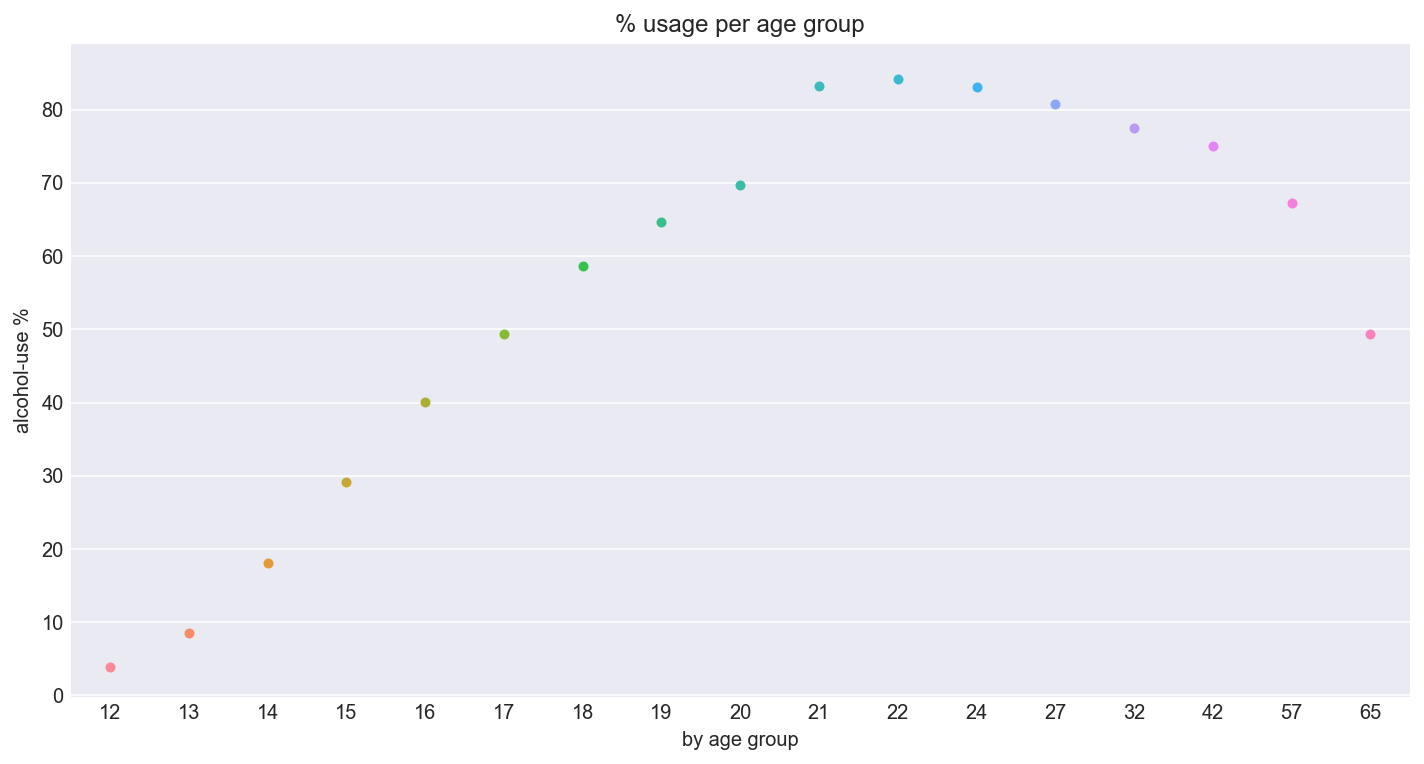

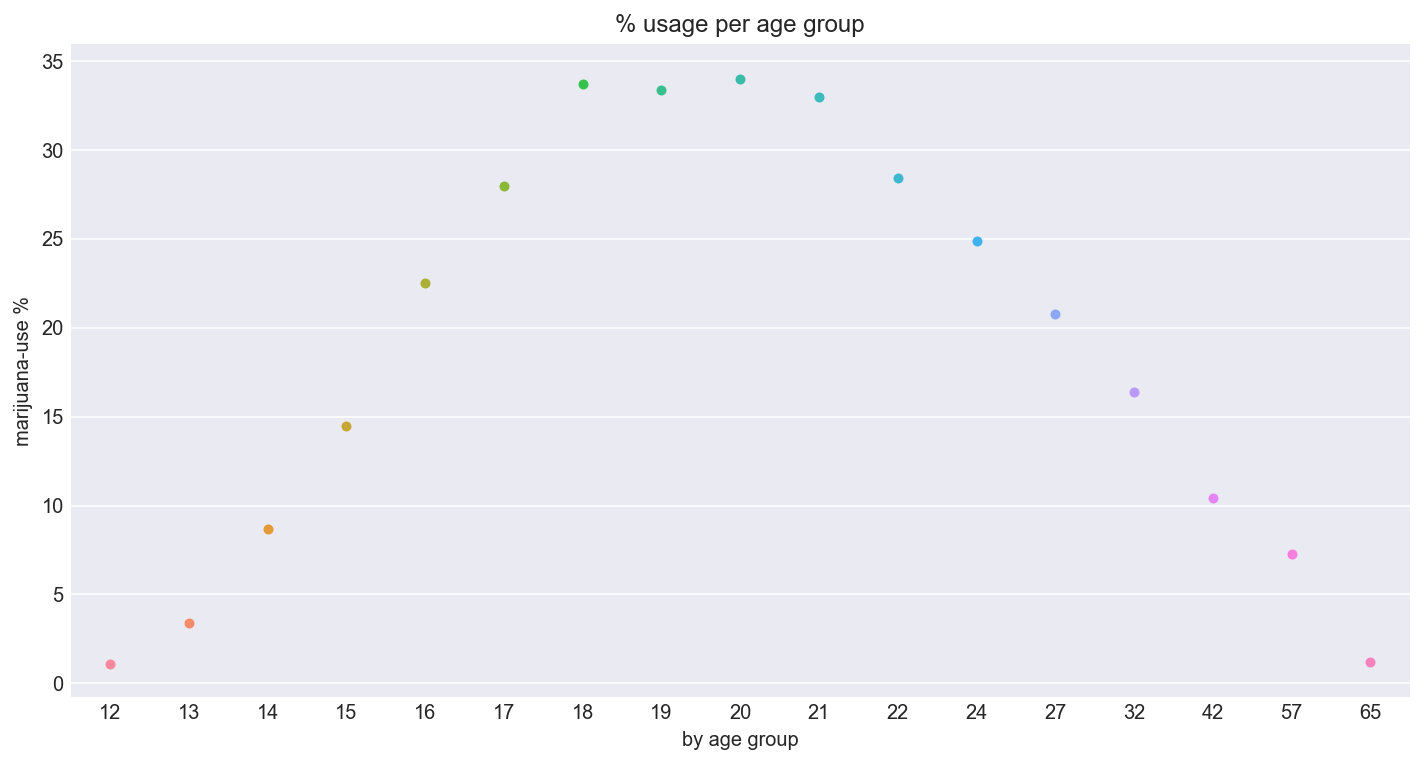

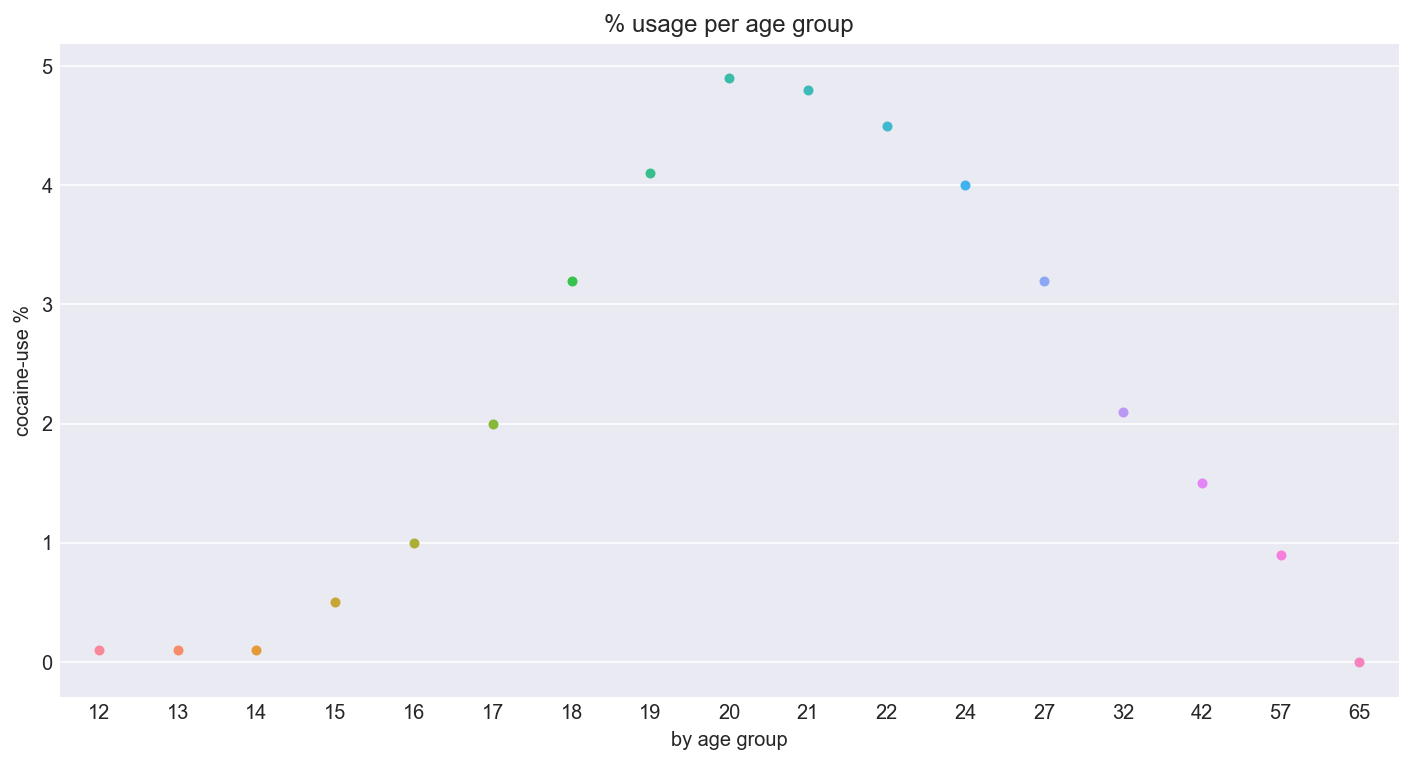

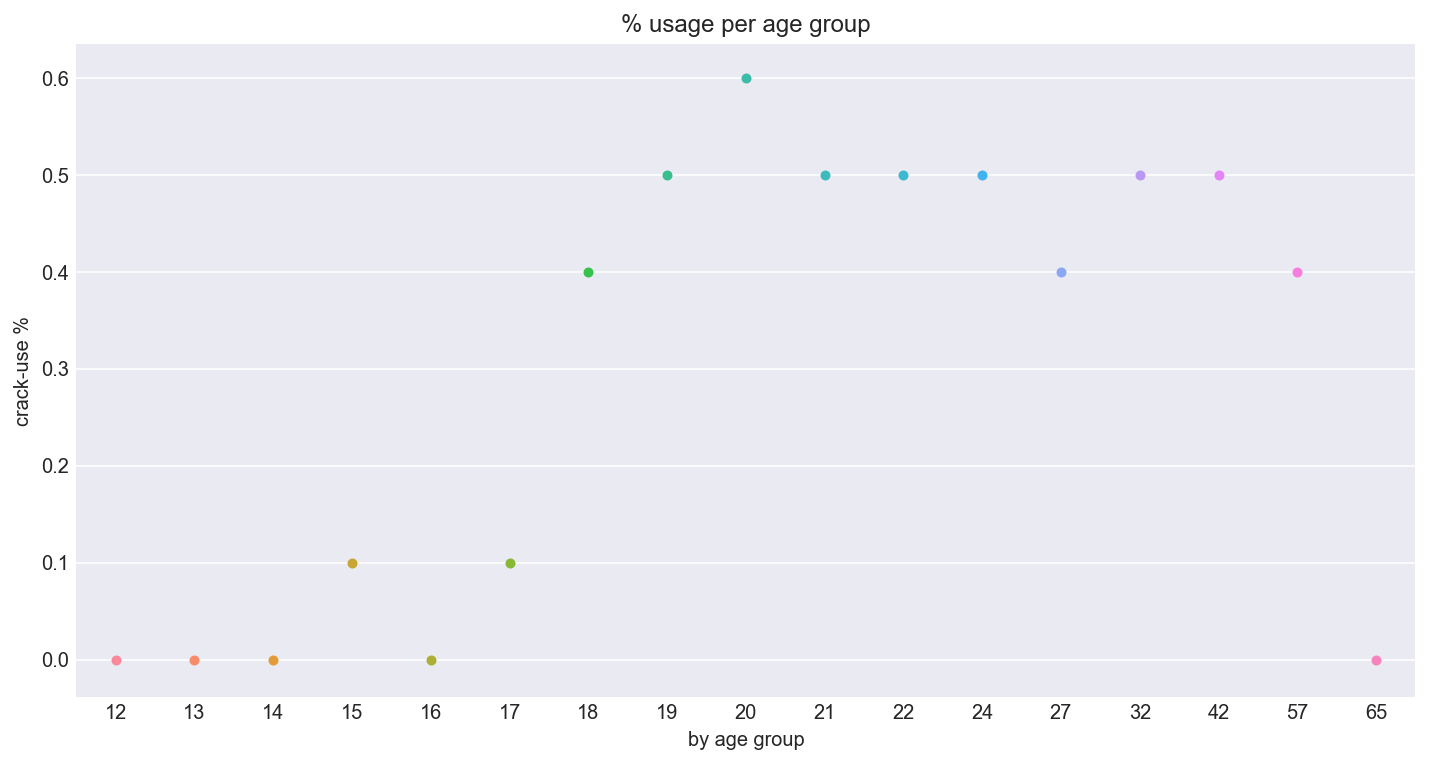

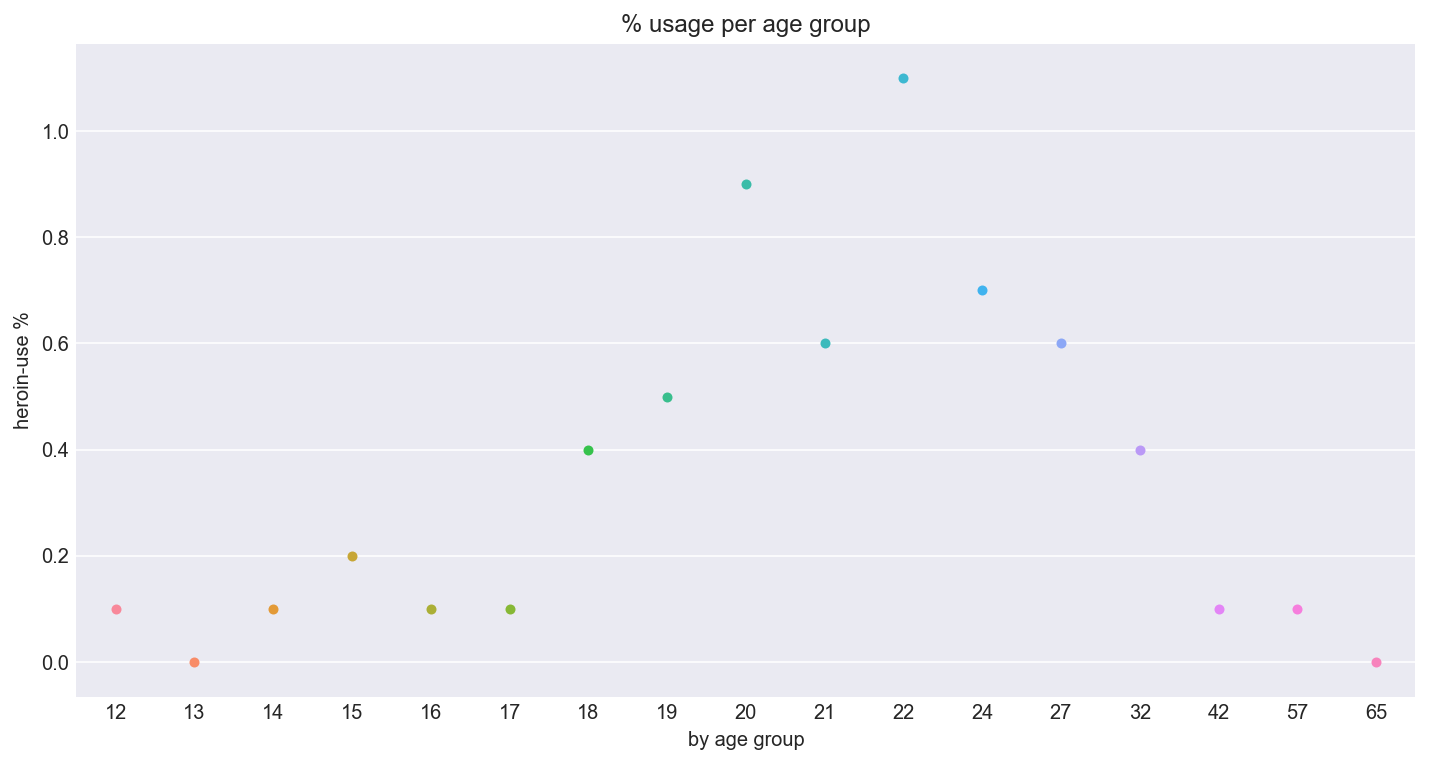

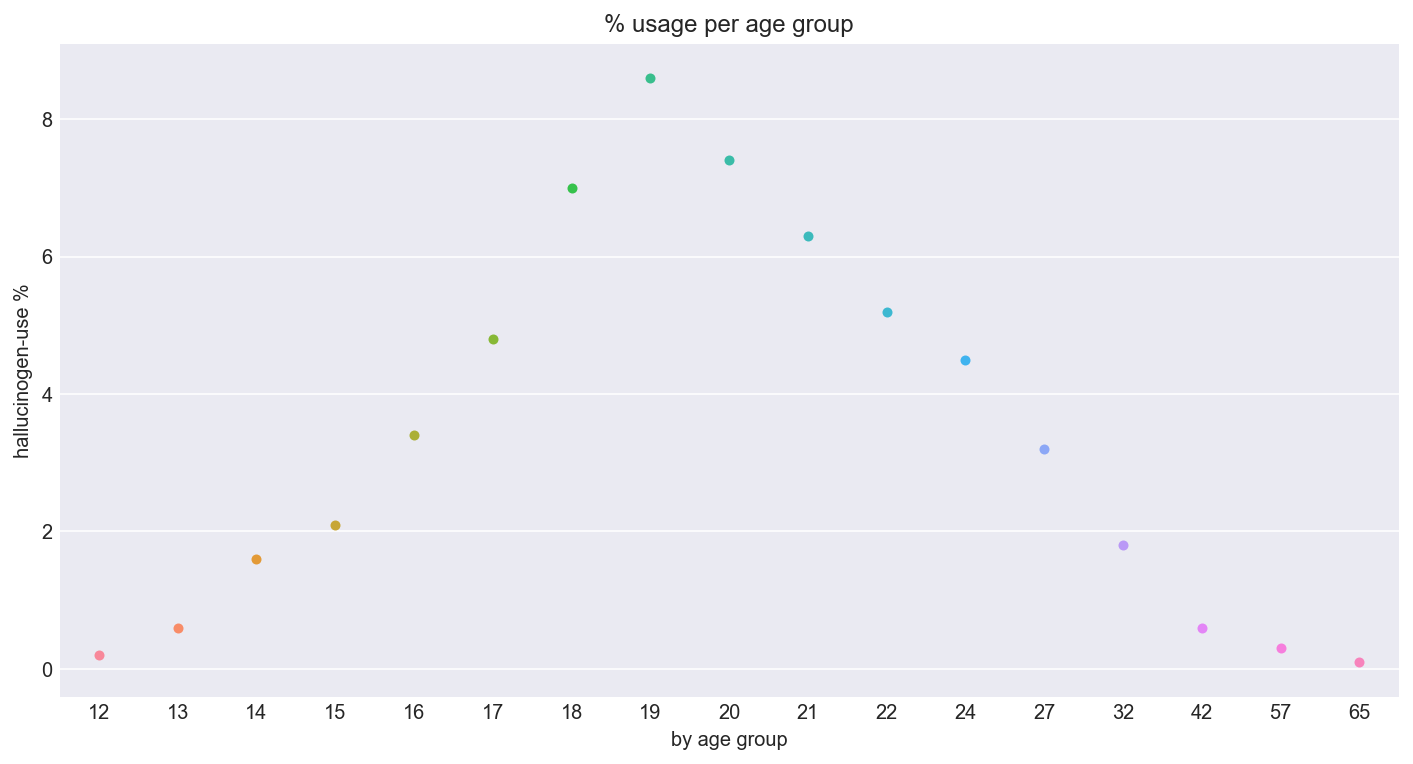

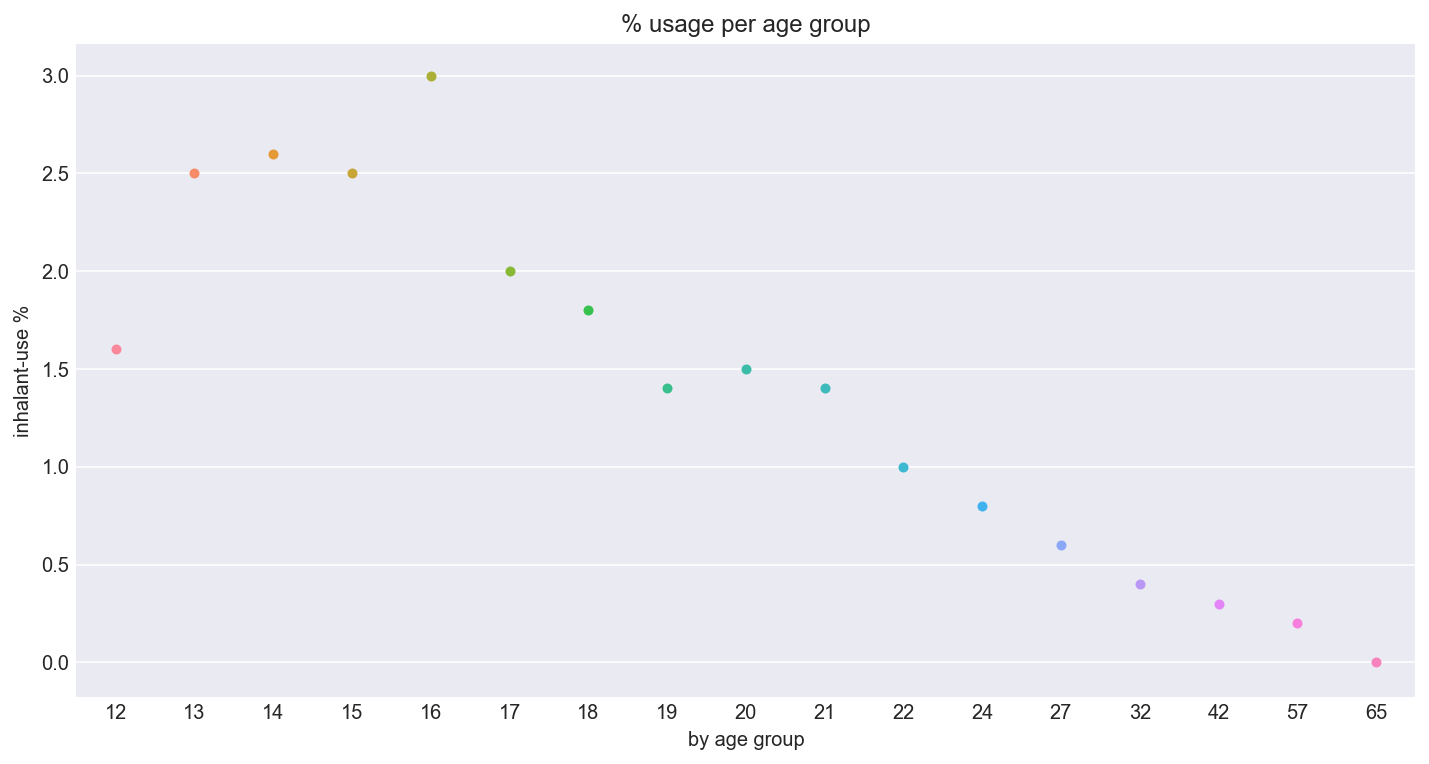

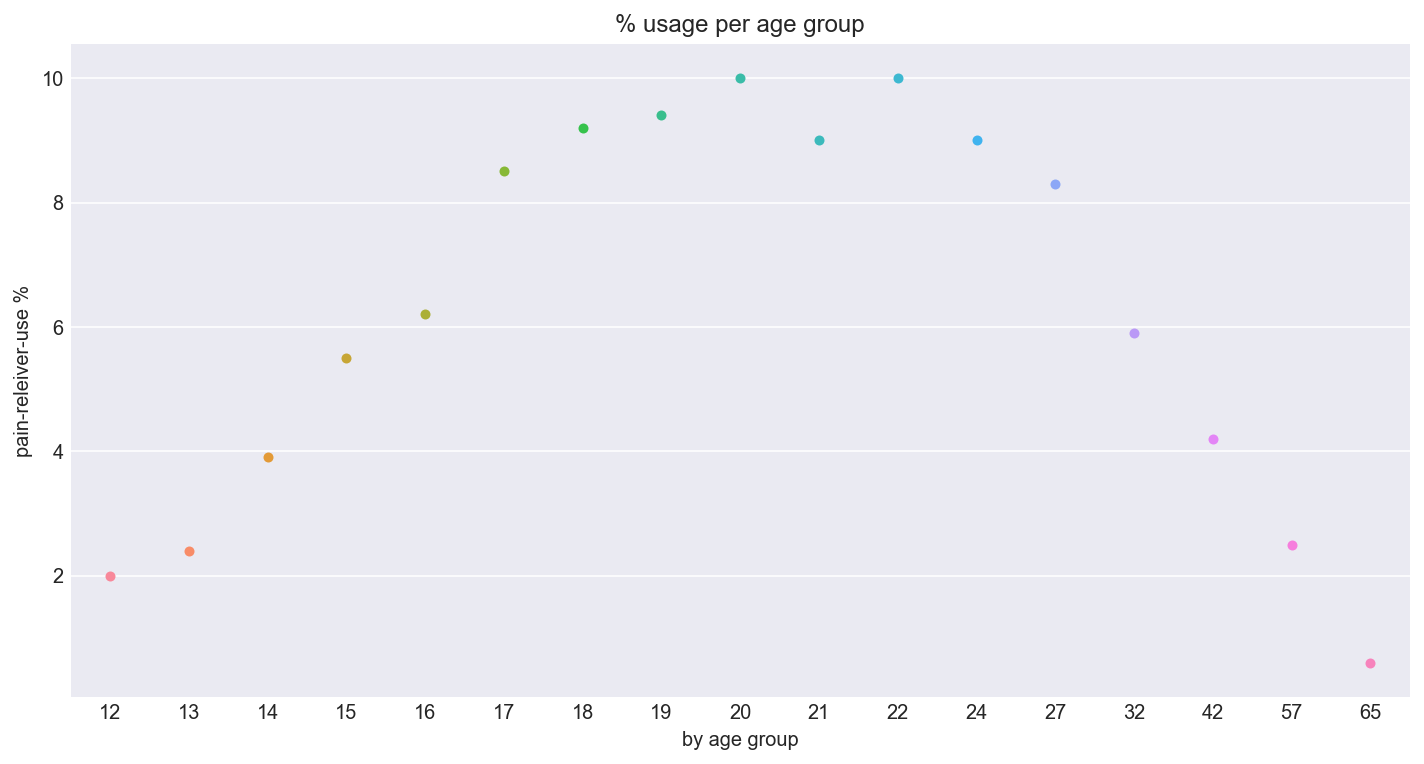

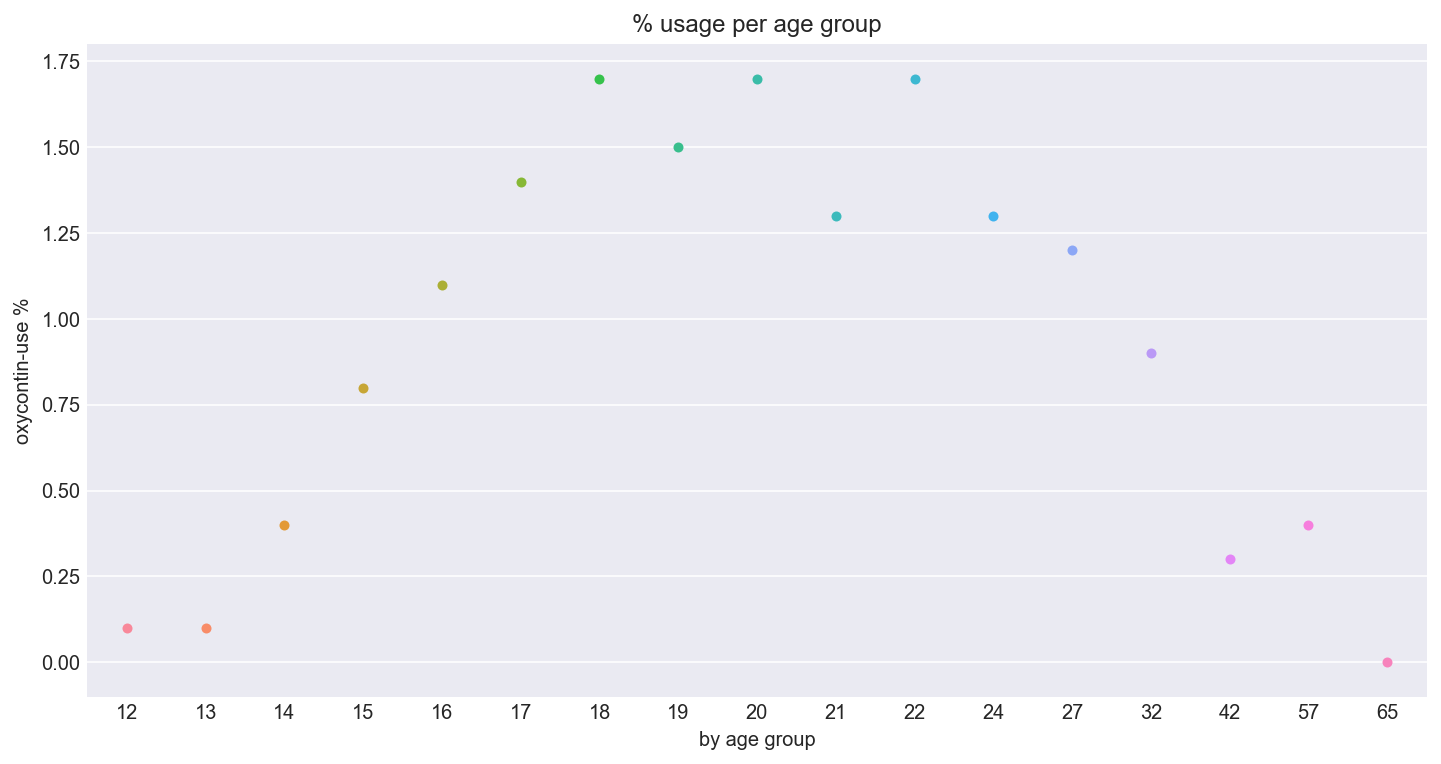

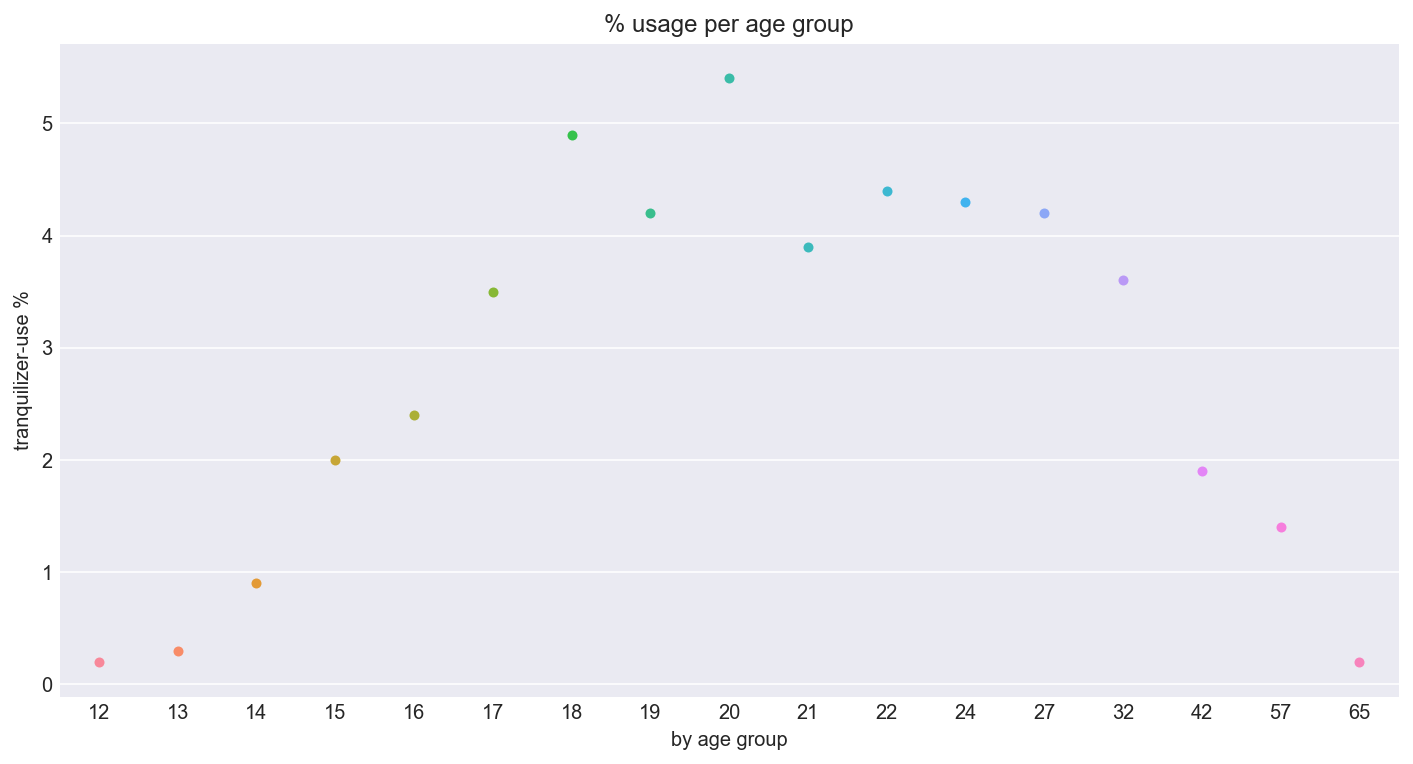

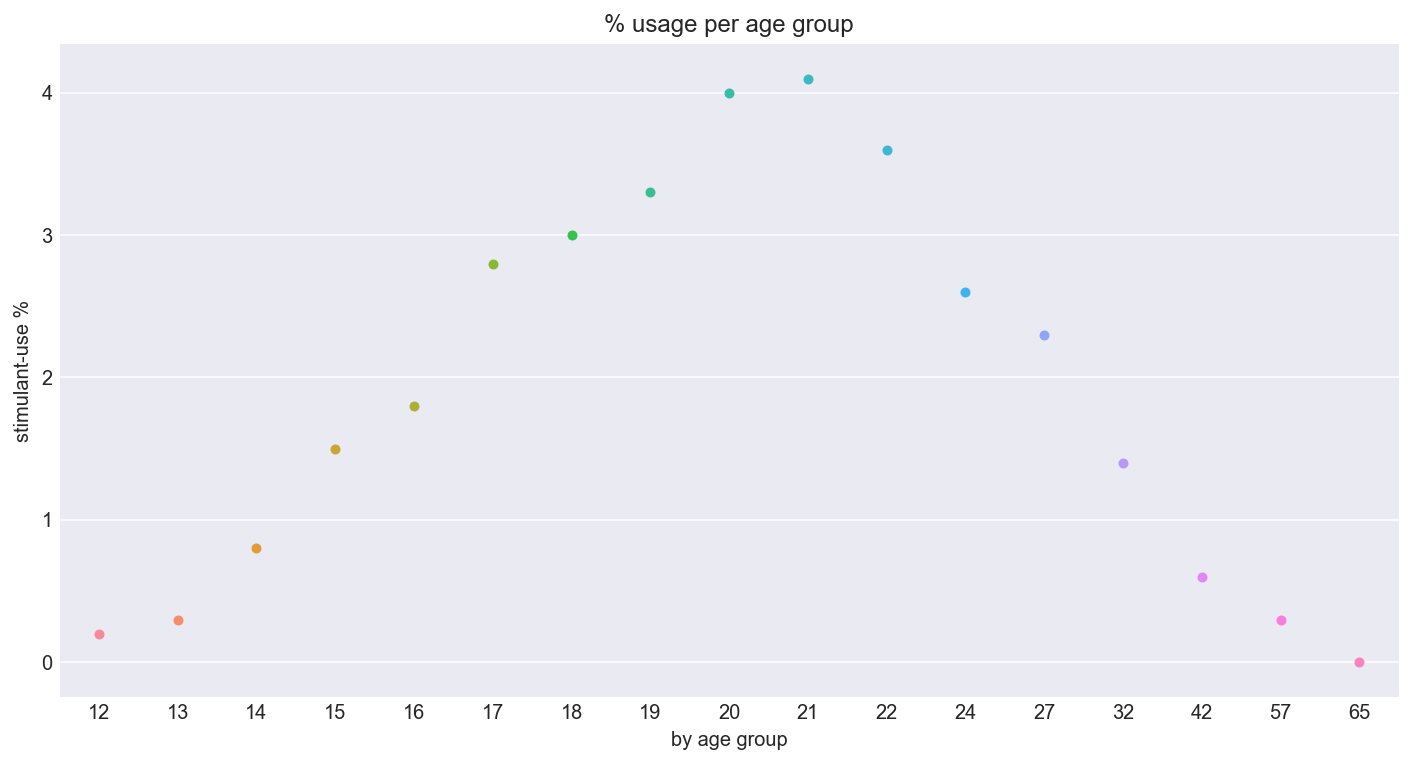

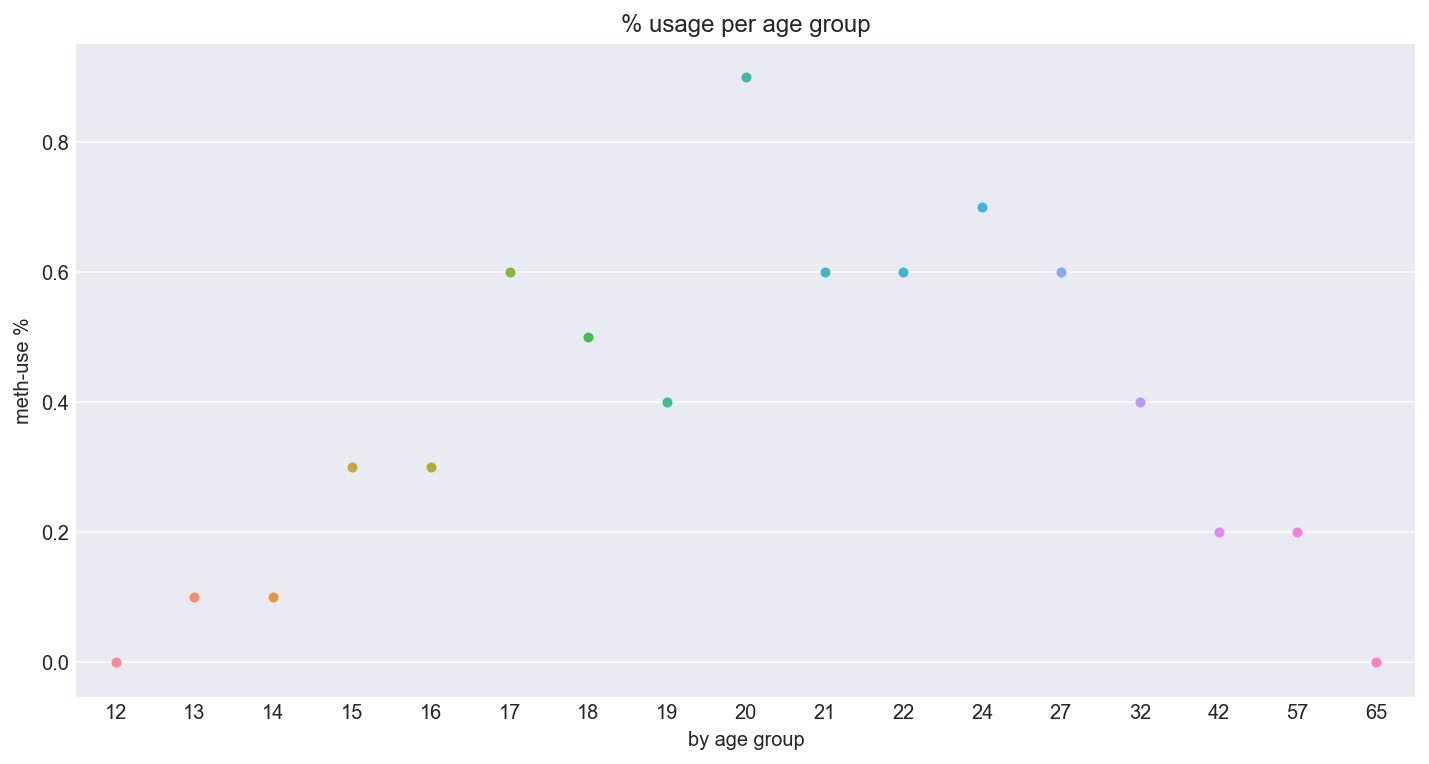

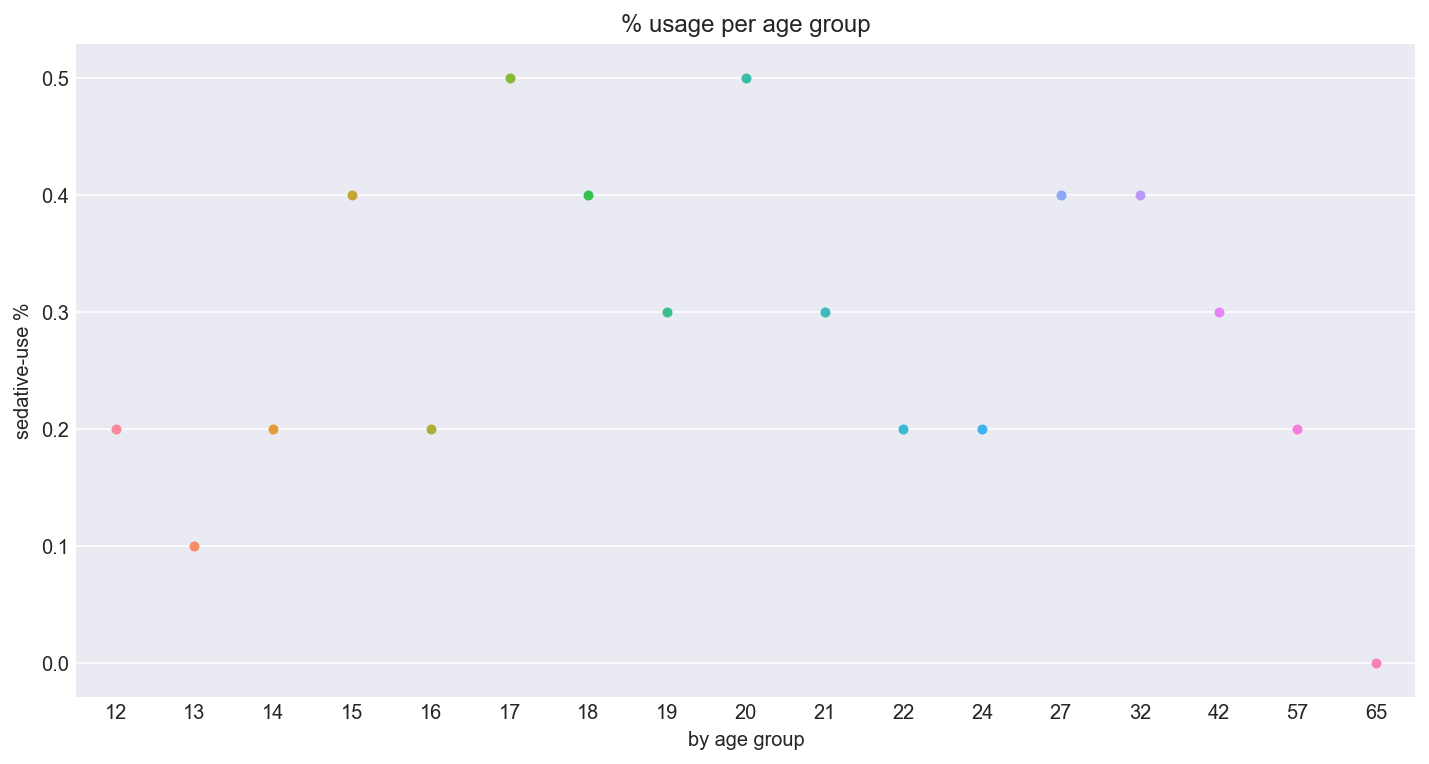

In [67]:
#already in percentage - just plot them
for drugType in usageDf.columns.values:
    ax = plt.figure(figsize=(12, 6))
    #ax.set_ylabel('frequency %', fontsize=16)
    #ax.set_title(drugType, fontsize=20)
    ax = sns.stripplot(x=ageIndex, y=usageDf[drugType], data=usageDf)
    ax.set( xlabel='by age group', ylabel=drugType+ ' %', title='% usage per age group')

Text(0.5,1,'Drug Usage amount per age group')

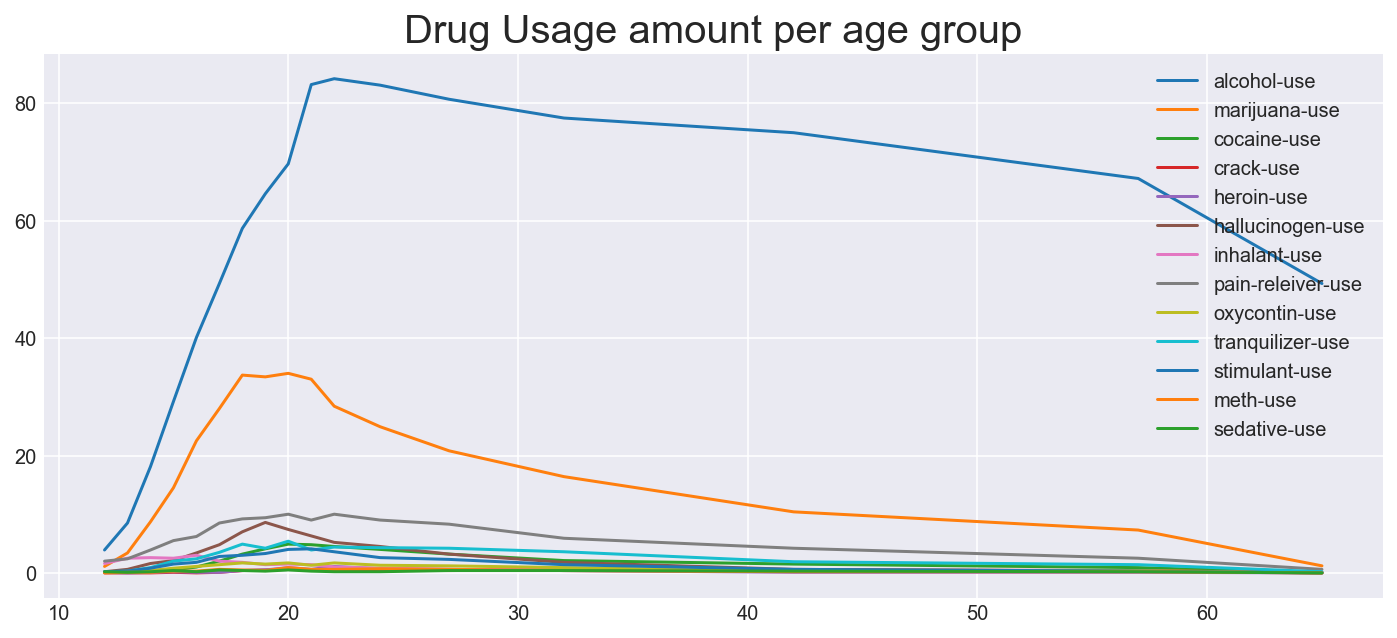

In [68]:
ax = usageDf.plot(figsize=(12, 5))
ax.set_title("Drug Usage amount per age group", fontsize=20)

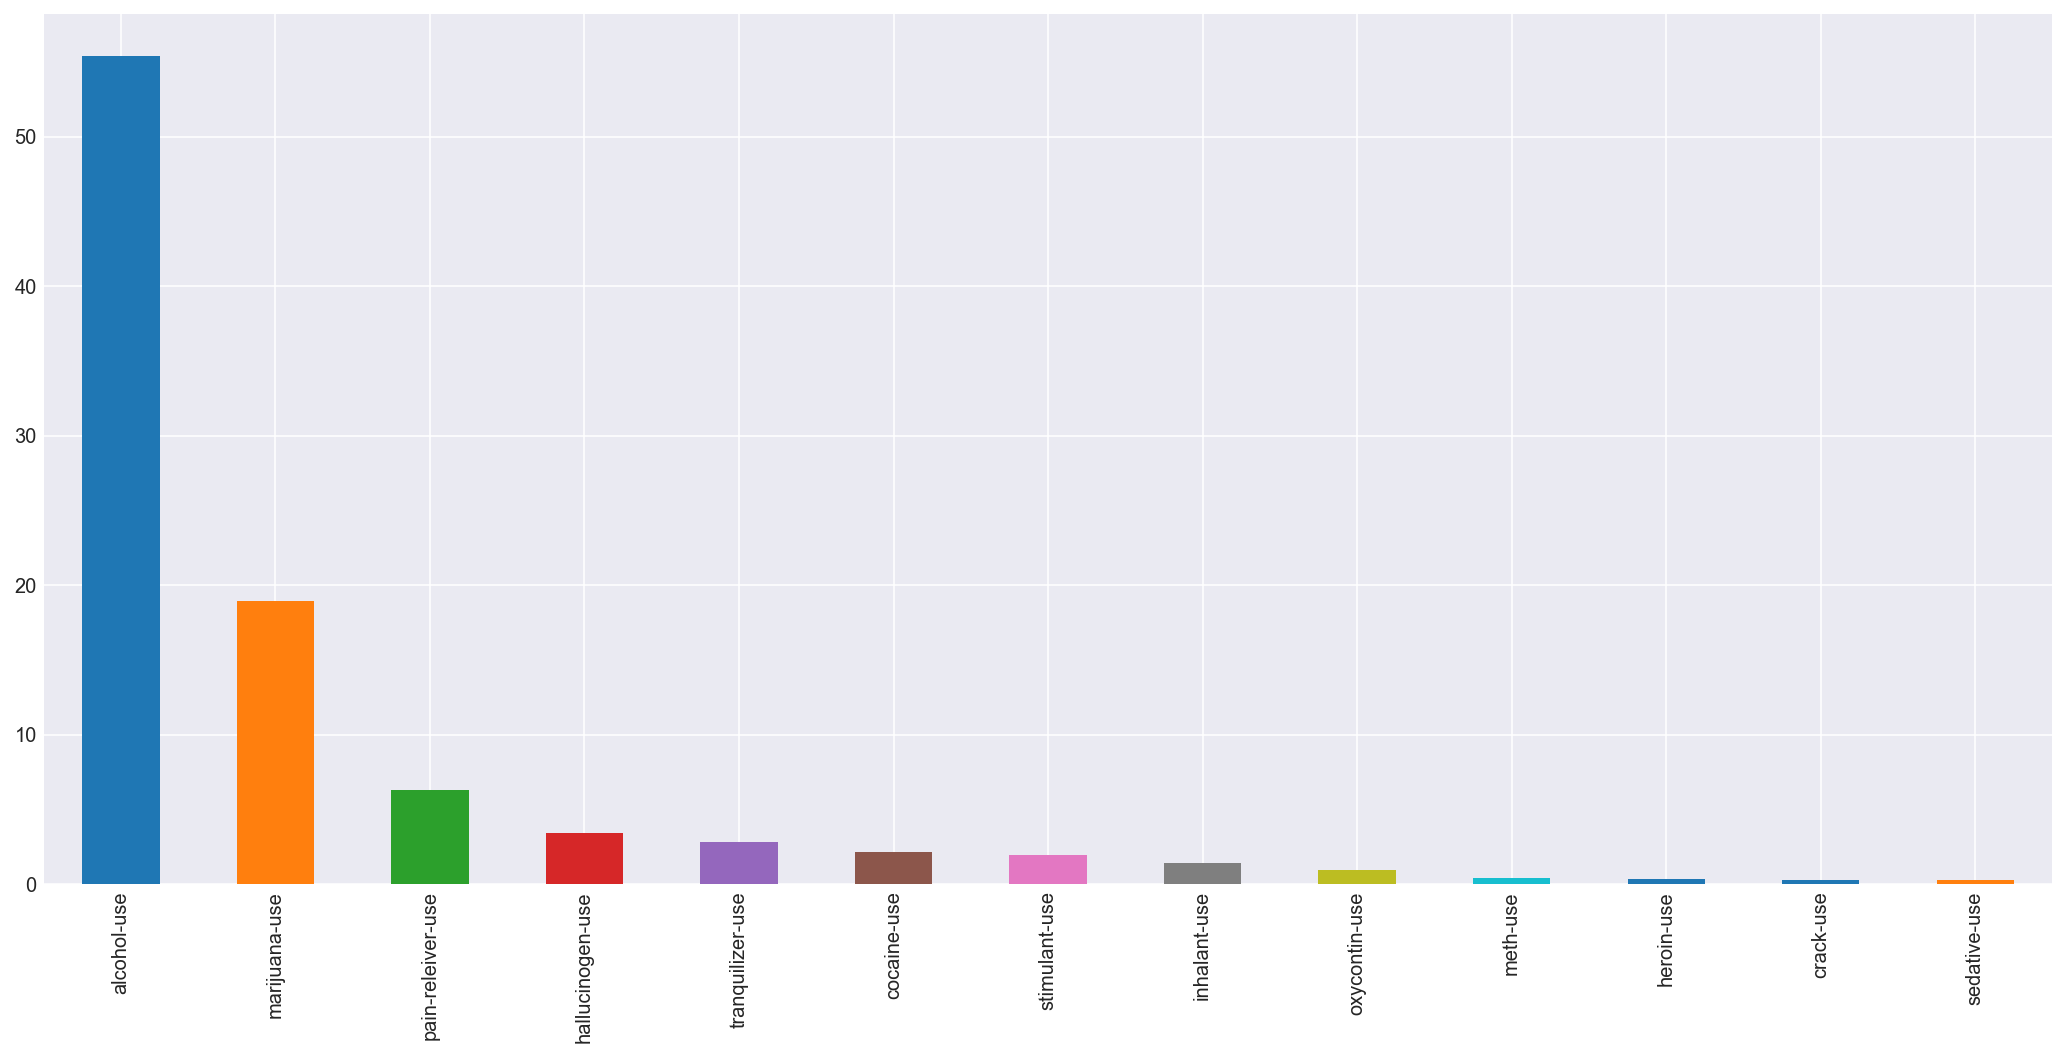

In [69]:
usageDf.mean().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))

Based on the figure above Alchohol, Marijuana and pain reliever are the 3 higest usesage

Usage are increasing from teen to early 20s before slowing down as age increases

In [70]:
#getting the columns names wiht frequency
freq_cols = [colName for colName in drugDf.columns if 'frequency' in colName]
#freq_cols
#getting columns only for frequency
freqSeries = drugDf[freq_cols]
freqDf = pd.DataFrame(freqSeries)
freqDf.rename(index = ageDict, inplace=True)
freqDf.describe()

alcohol-frequency  marijuana-frequency  cocaine-frequency  \
count          17.000000            17.000000          17.000000   
mean           33.352941            42.941176           7.411765   
std            21.318833            18.362566           8.014119   
min             3.000000             4.000000           0.000000   
25%            10.000000            30.000000           5.000000   
50%            48.000000            52.000000           5.000000   
75%            52.000000            52.000000           7.000000   
max            52.000000            72.000000          36.000000   

       crack-frequency  heroin-frequency  hallucinogen-frequency  \
count        17.000000         17.000000               17.000000   
mean         12.382353         68.970588                8.411765   
std          17.361532         70.153285               15.000245   
min           0.000000          0.000000                2.000000   
25%           2.000000         35.500000                3.000000   
50%           6.000000         50.000000                3.000000   
75%          15.000000         66.500000                4.000000   
max          62.000000        280.000000               52.000000   

       inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
count           17.000000                17.000000            17.000000   
mean             5.794118                14.705882            13.941176   
std              4.937291                 6.935098            12.902134   
min              0.000000                 7.000000             0.000000   
25%              3.000000                12.000000             5.000000   
50%              4.000000                12.000000            12.000000   
75%              5.500000                15.000000            17.500000   
max             19.000000                36.000000            46.000000   

       tranquilizer-frequency  stimulant-frequency  meth-frequency  \
count               17.000000            17.000000       17.000000   
mean                11.735294            31.147059       31.735294   
std                 11.485205            85.973790       32.206423   
min                  4.500000             2.000000        0.000000   
25%                  6.000000             7.000000       10.500000   
50%                 10.000000            10.000000       24.000000   
75%                 11.000000            12.000000       46.000000   
max                 52.000000           364.000000      105.000000   

       sedative-frequency  
count           17.000000  
mean            19.382353  
std             24.833527  
min              3.000000  
25%              6.500000  
50%             10.000000  
75%             17.500000  
max            104.000000

Text(0.5,1,'Drug Frequency per age group')

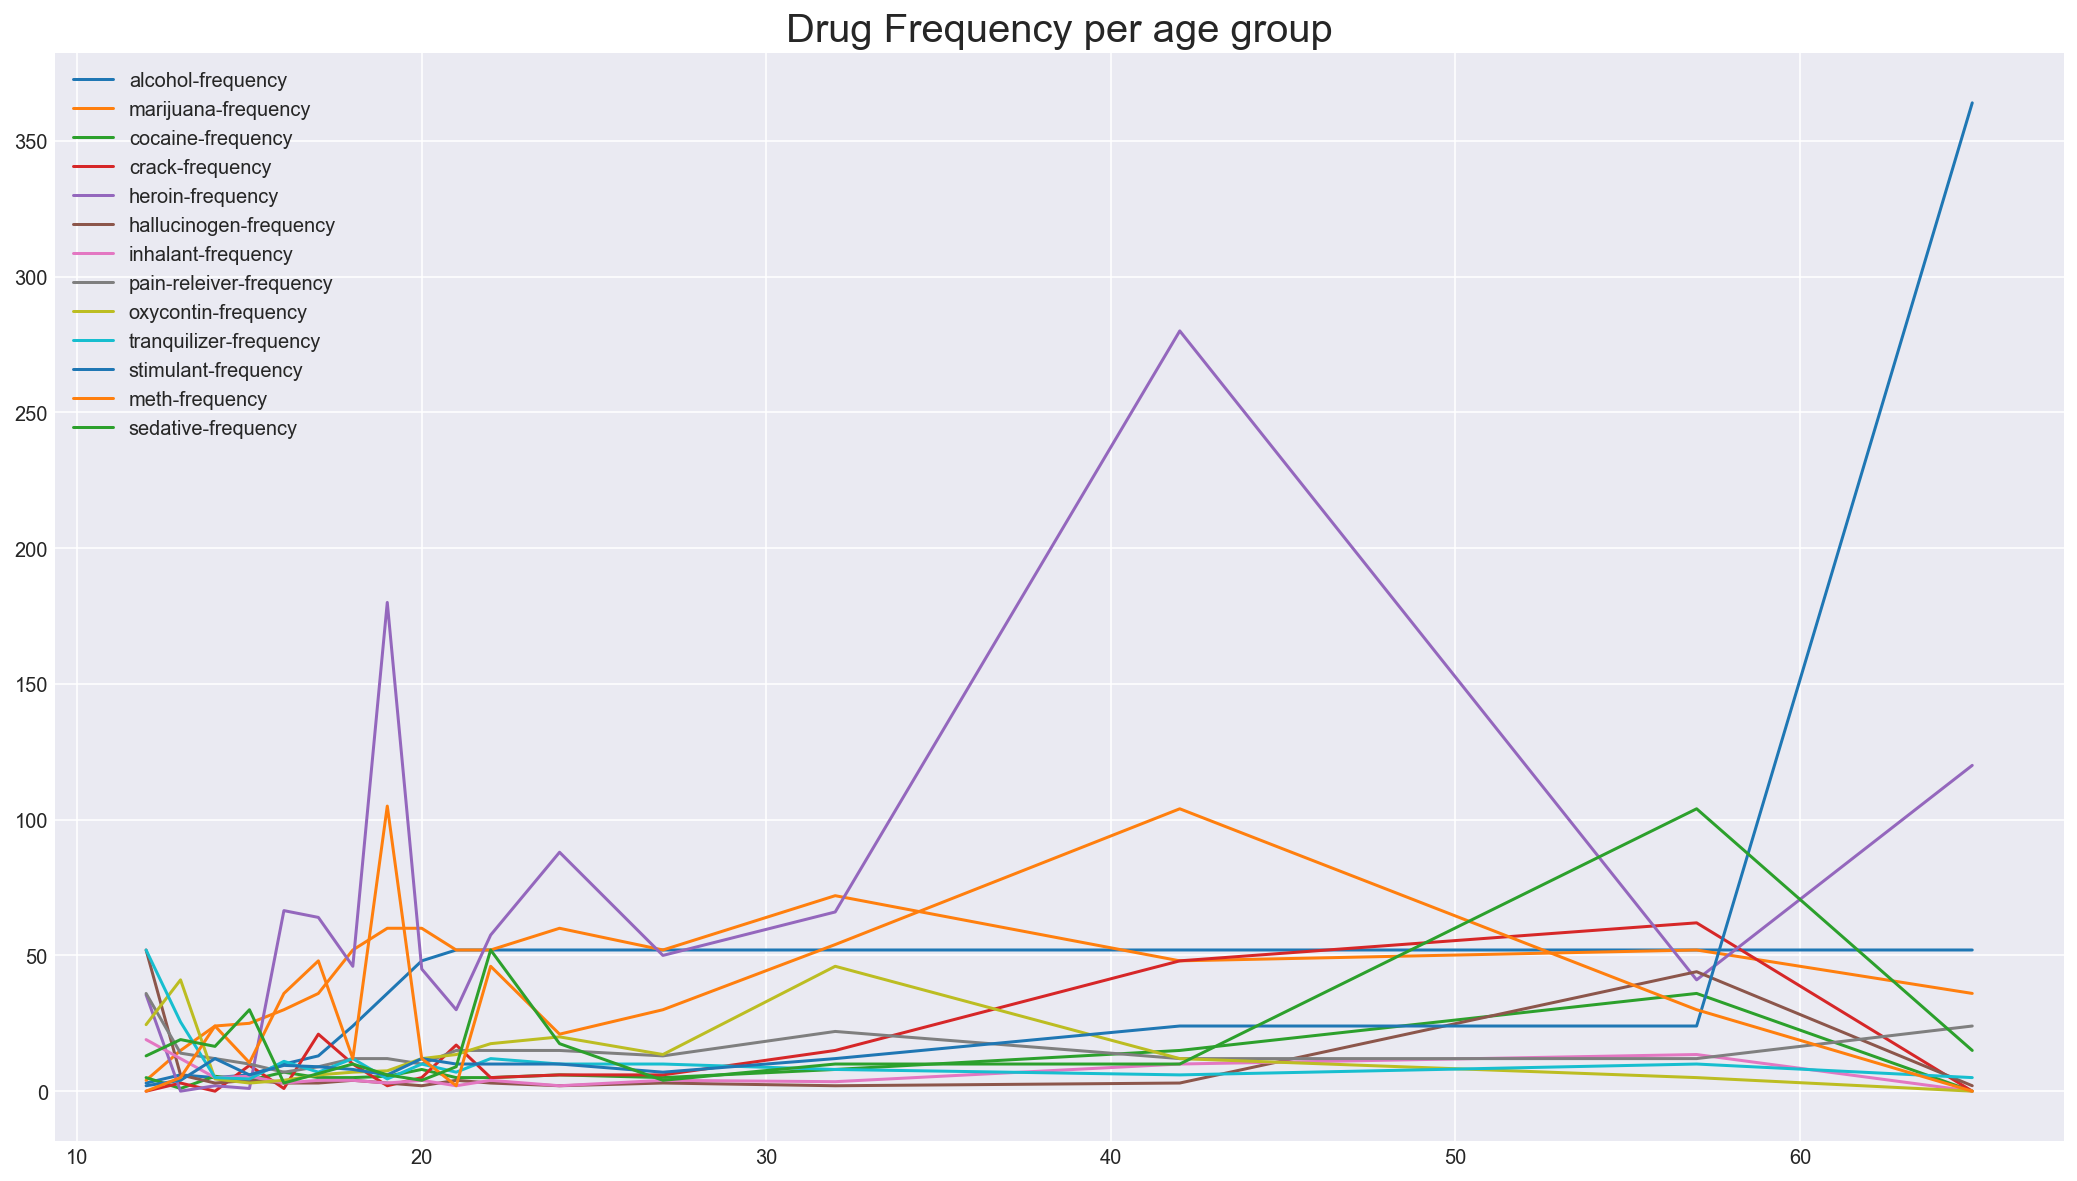

In [71]:
ax = freqDf.plot(figsize=(18, 10))
ax.set_title("Drug Frequency per age group", fontsize=20)

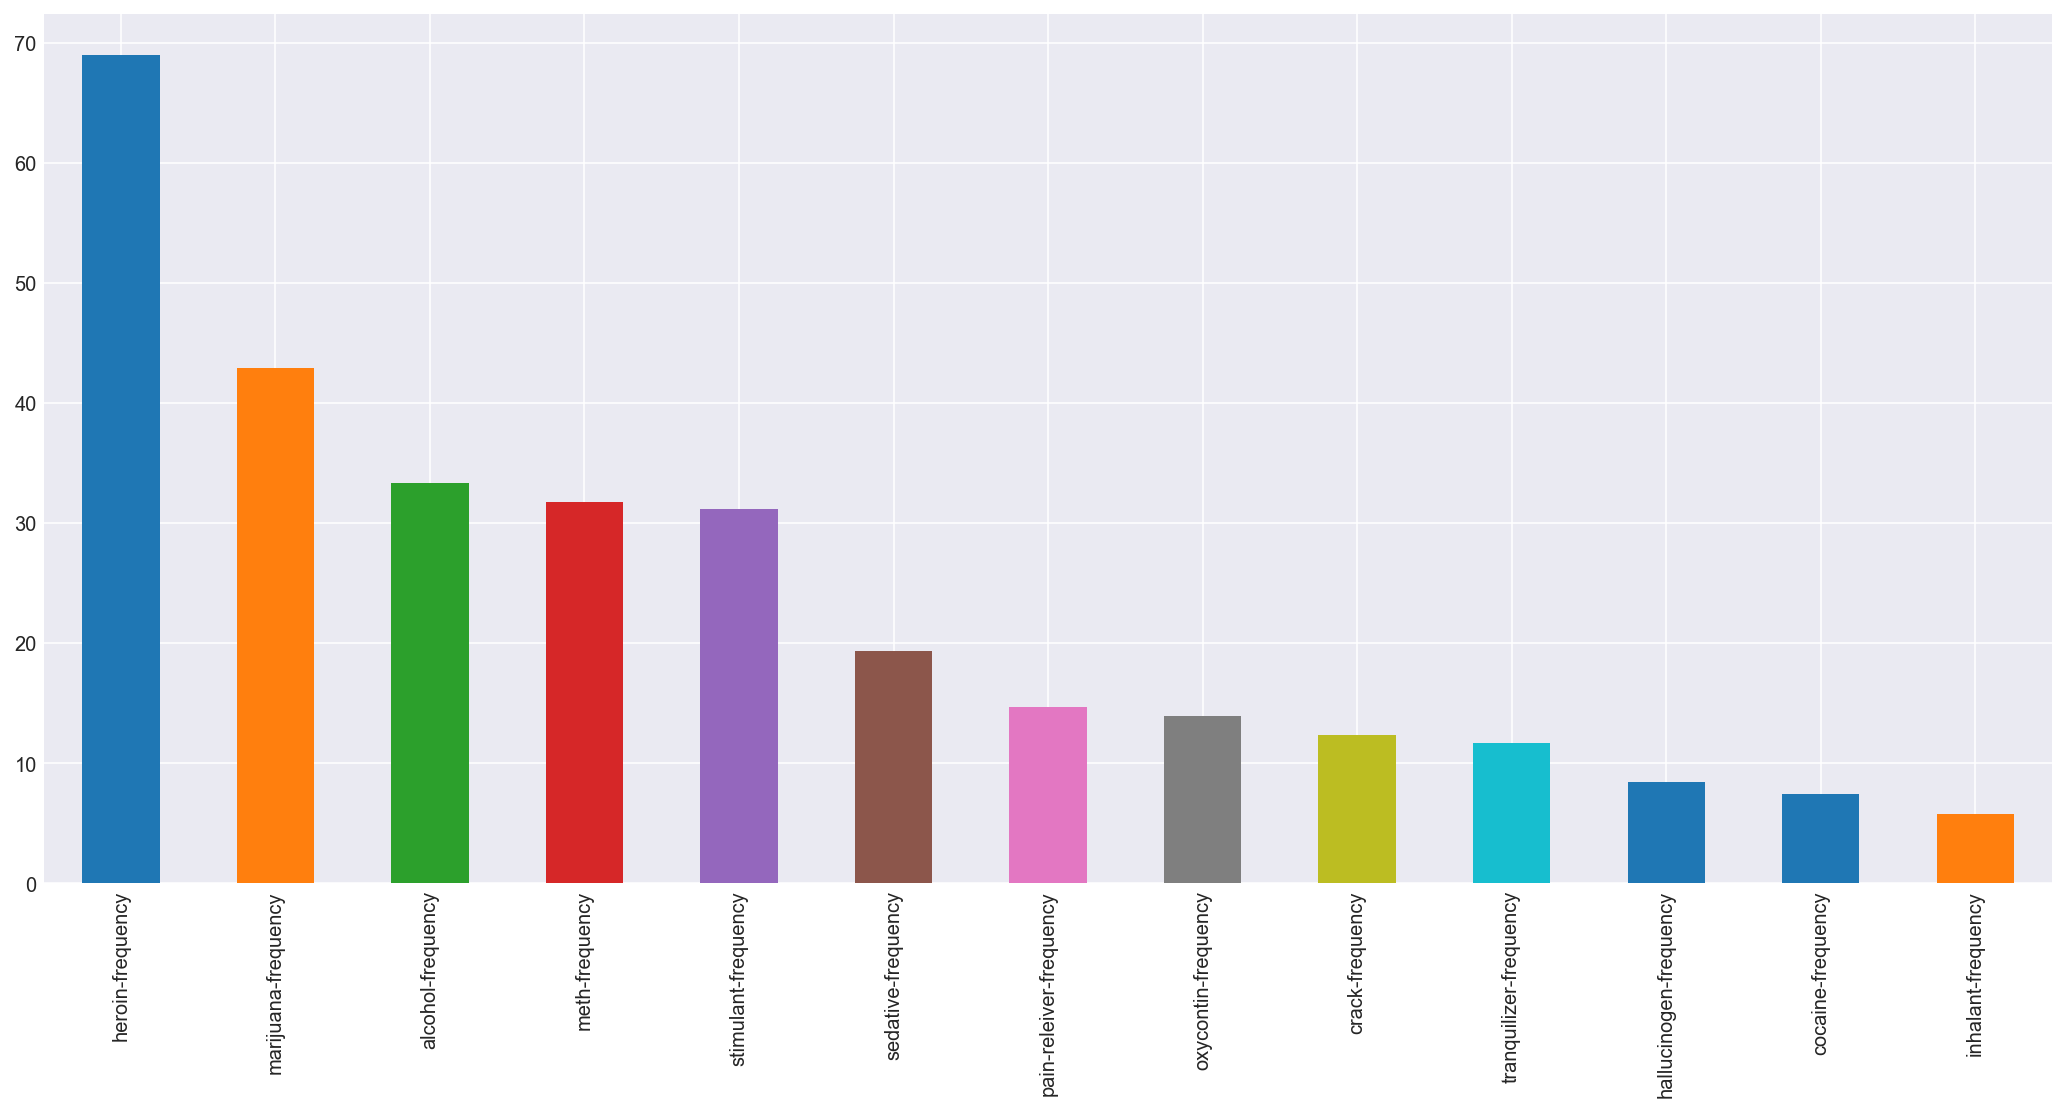

In [72]:
freqDf.mean().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))

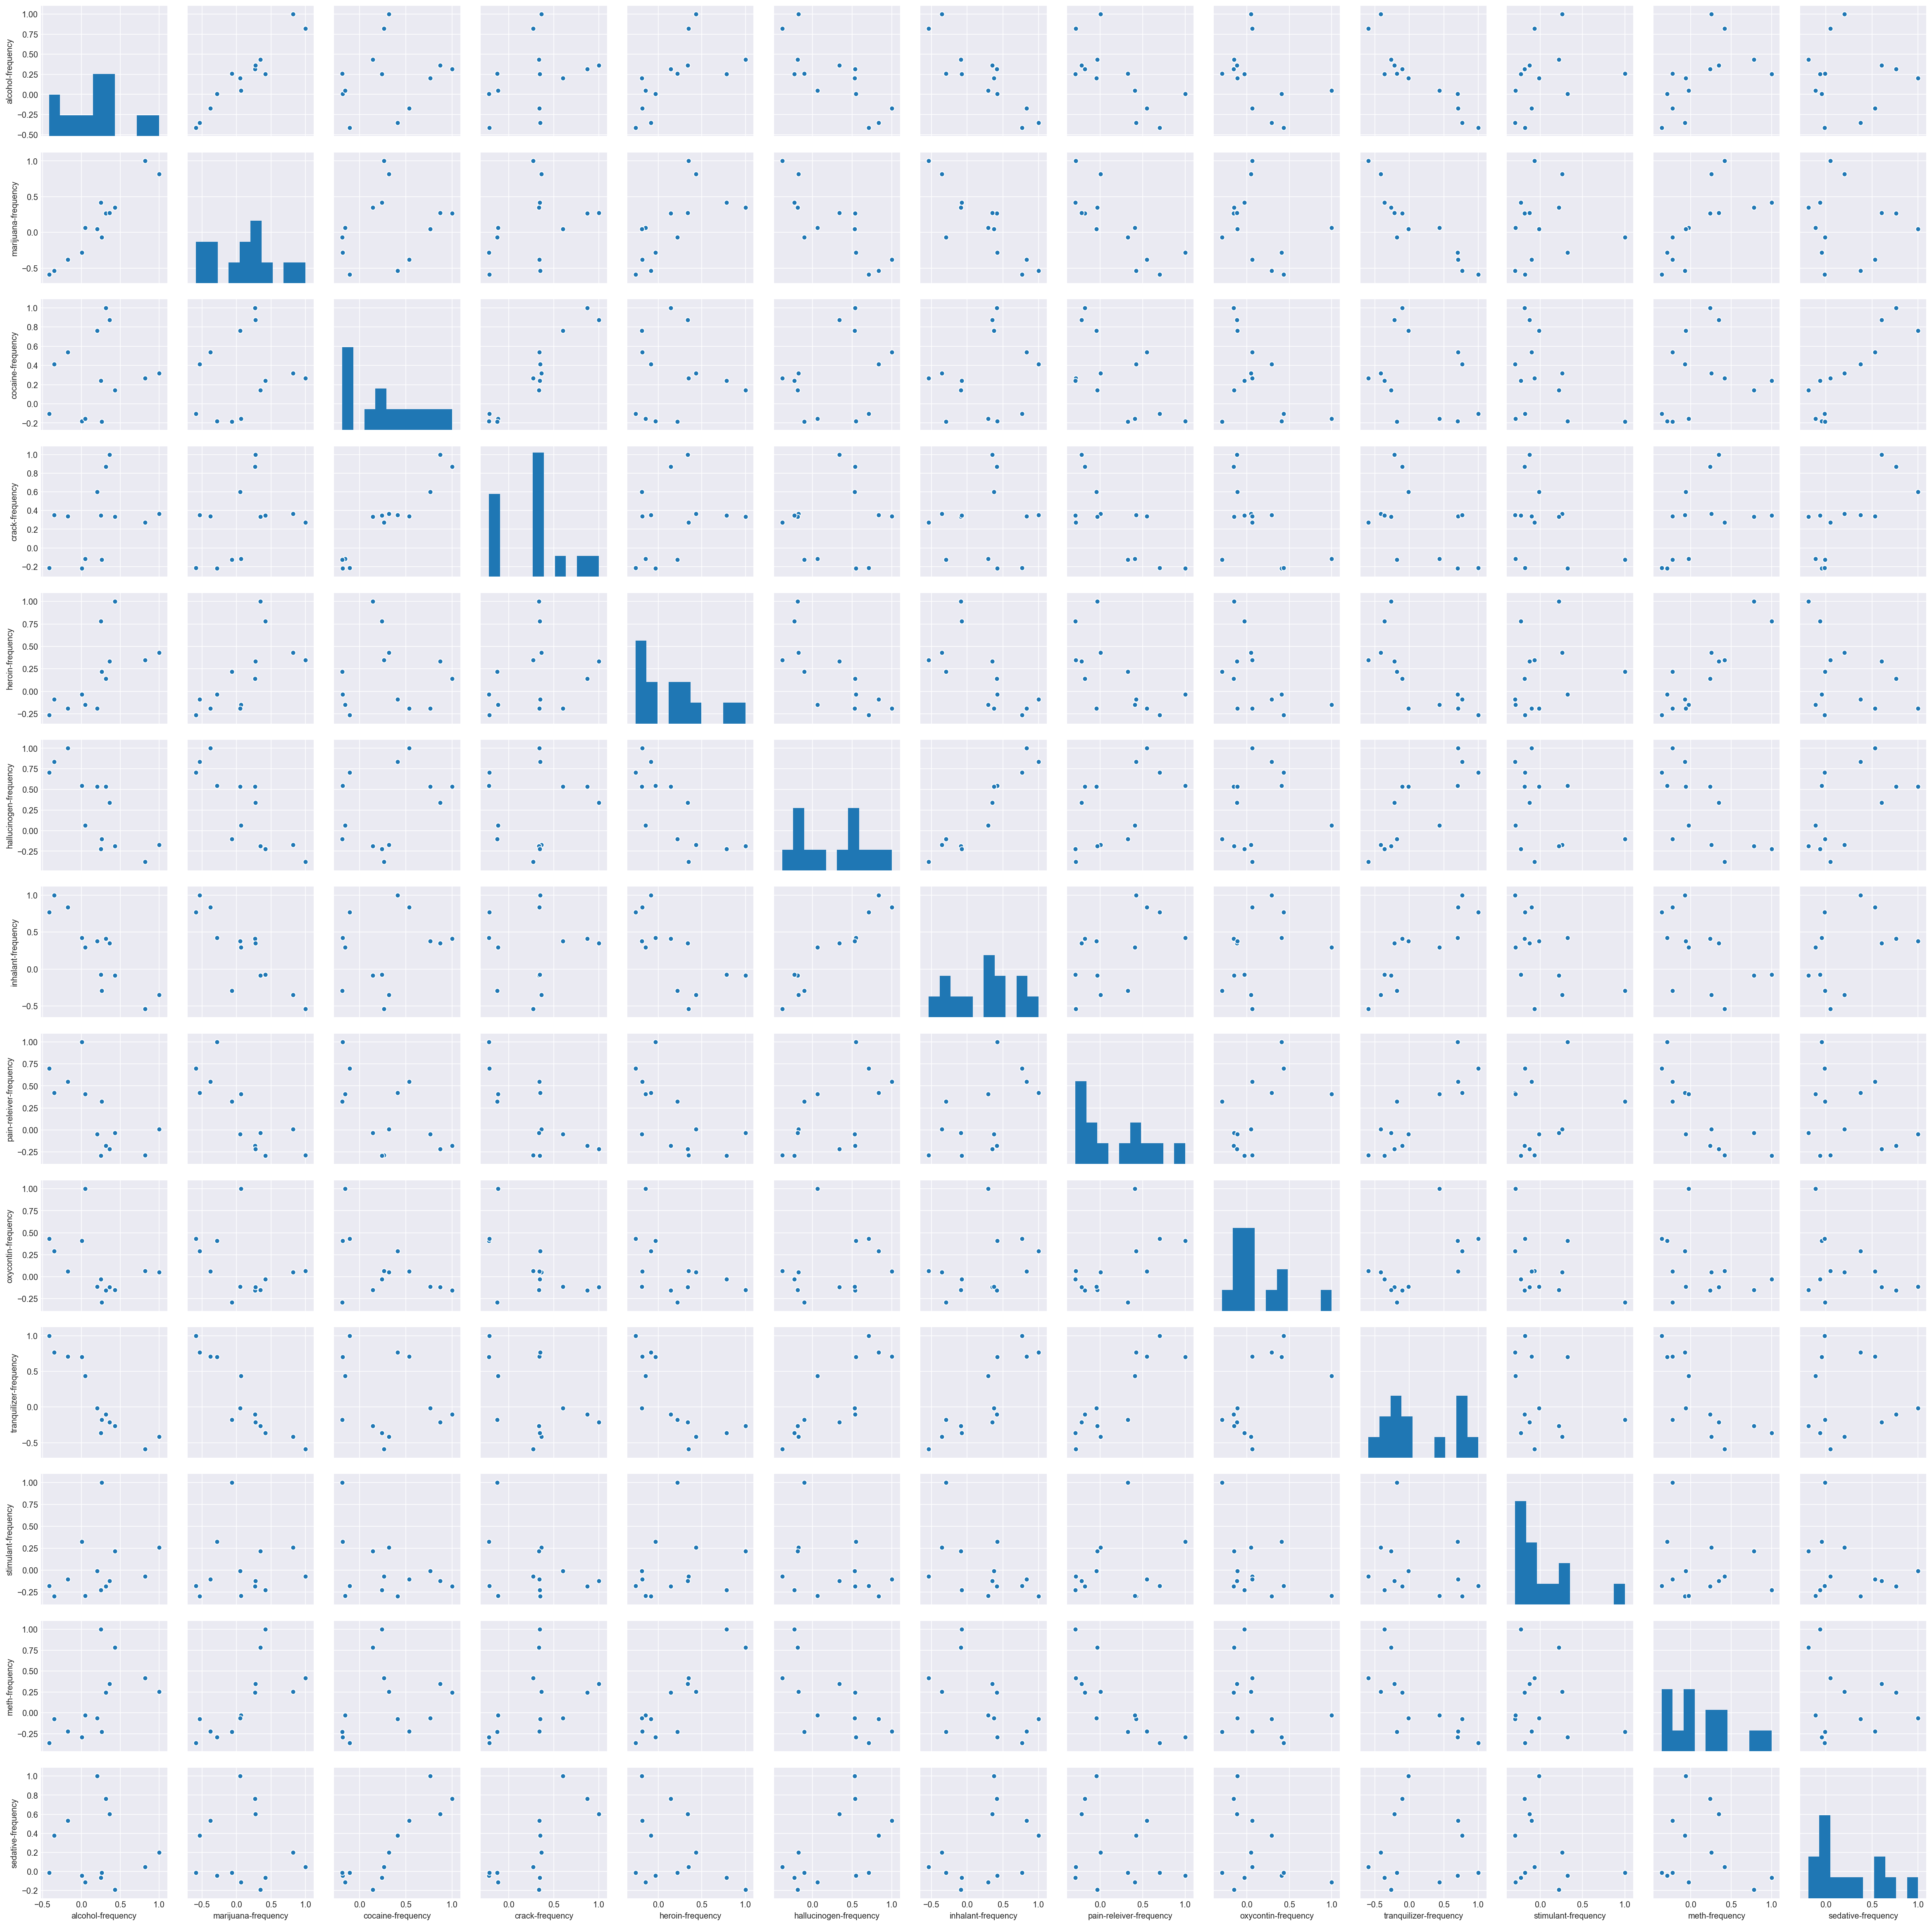

In [73]:
sns.pairplot(freqDf.corr())

Drugs frequency correlation, does not seem to have a proper pattern, most of them are all over the place

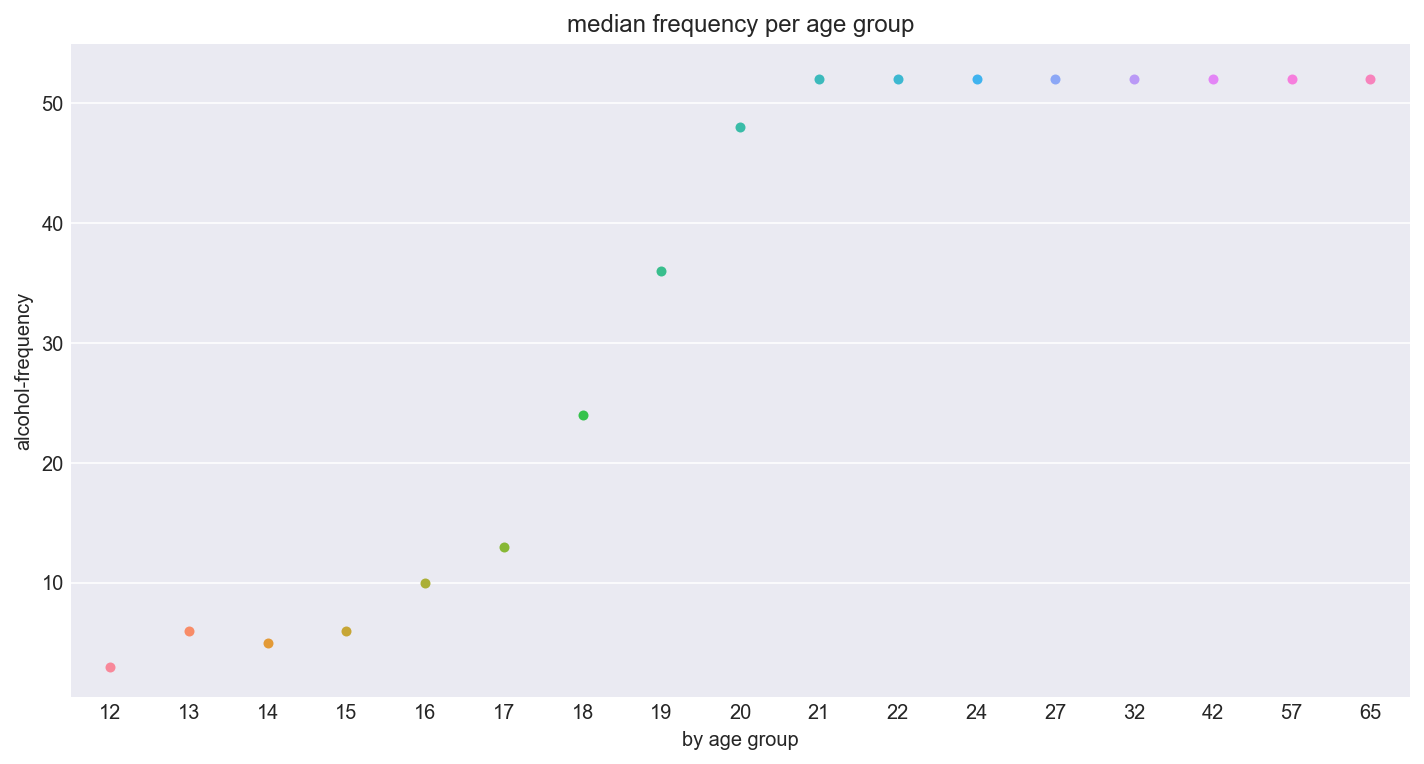

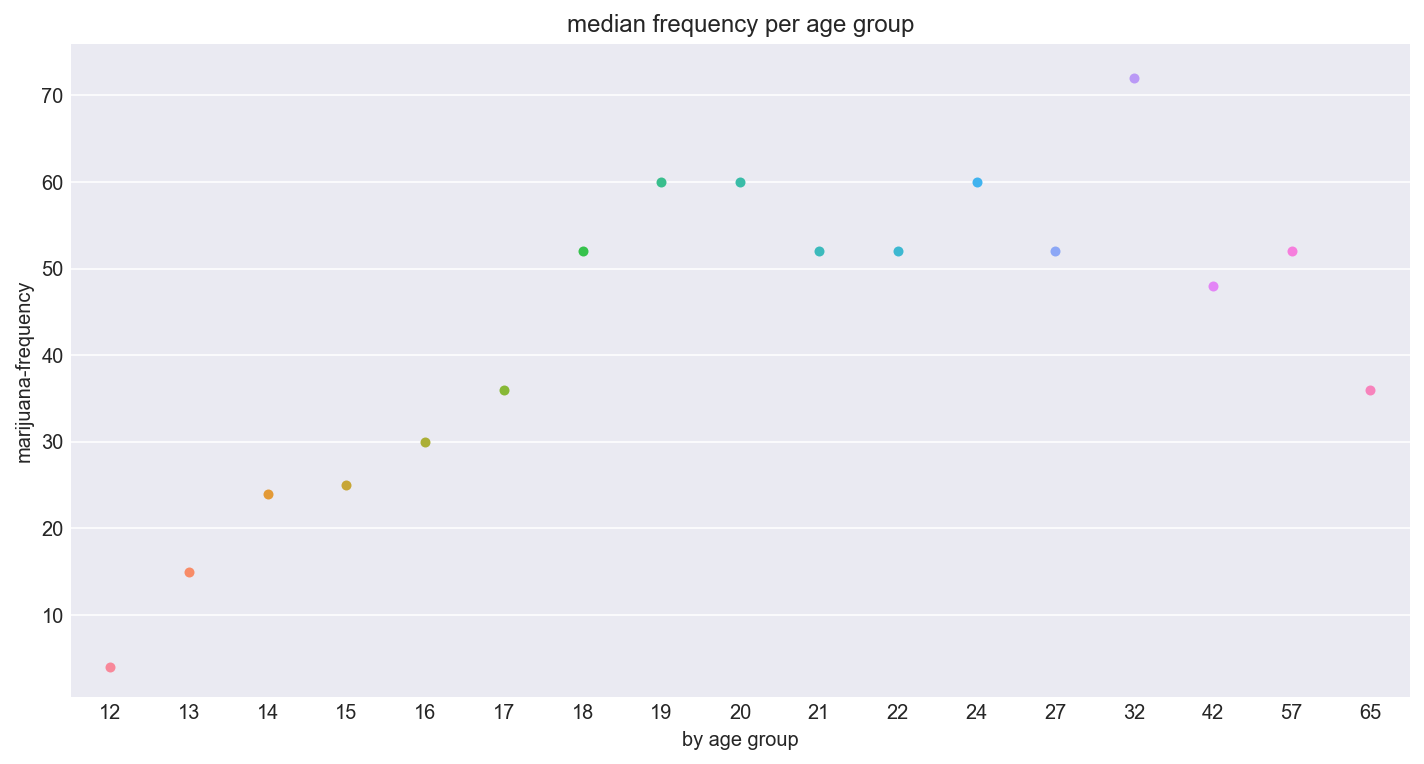

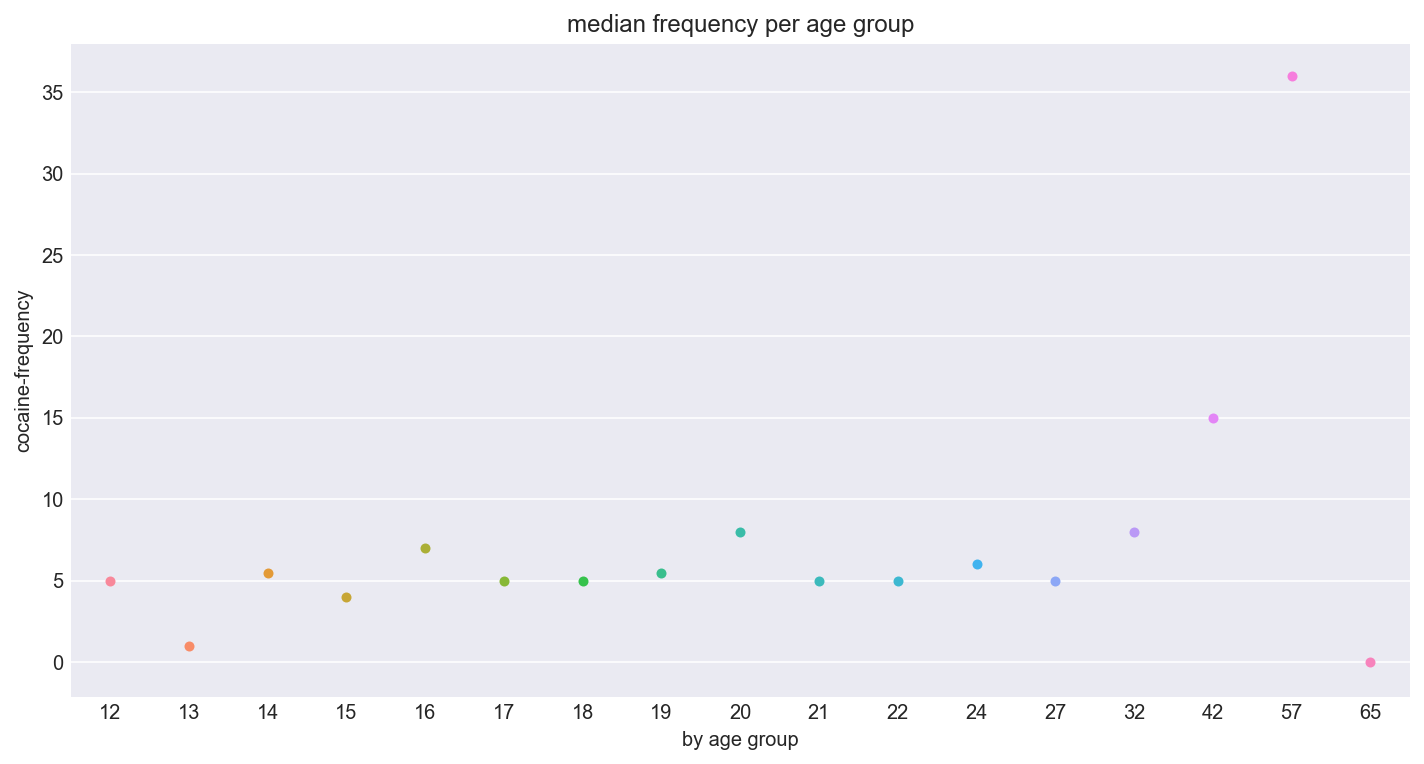

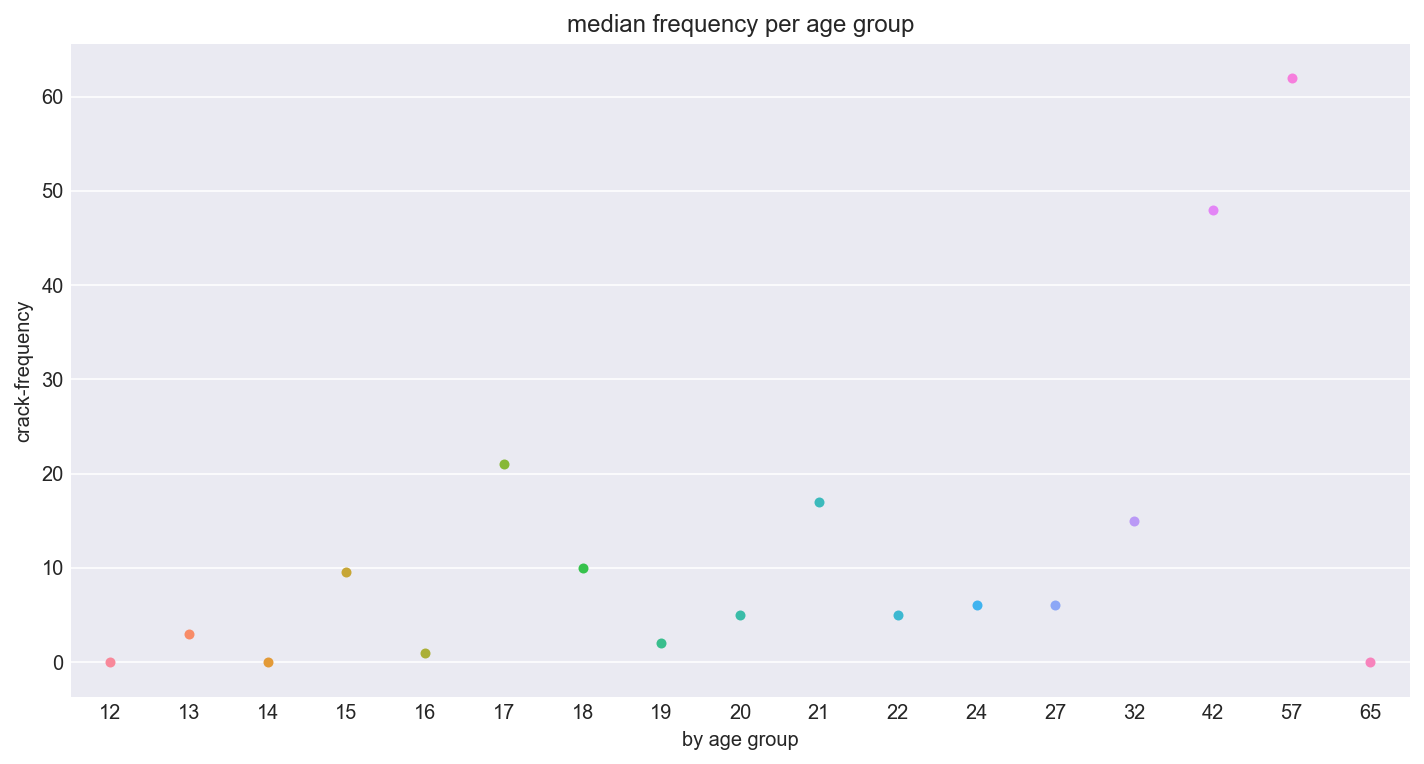

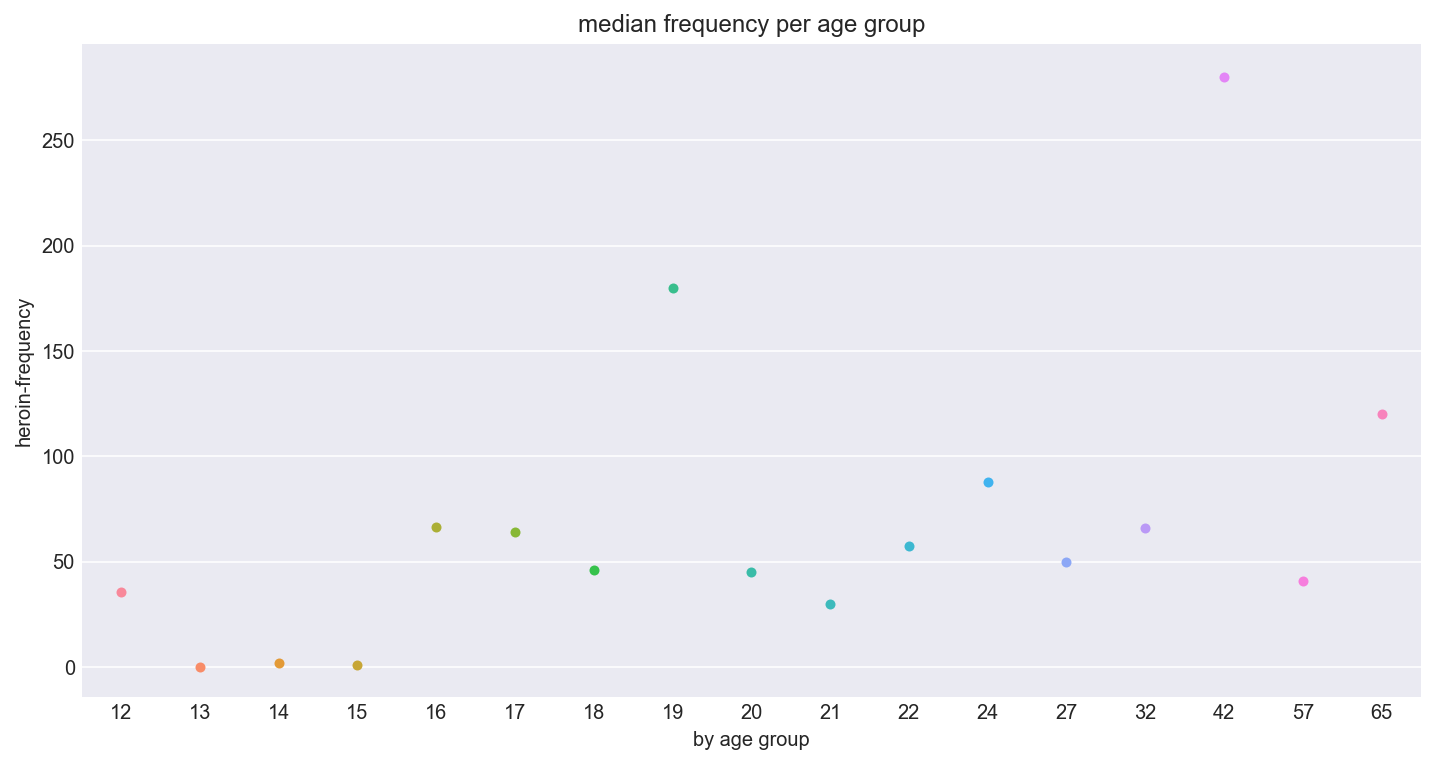

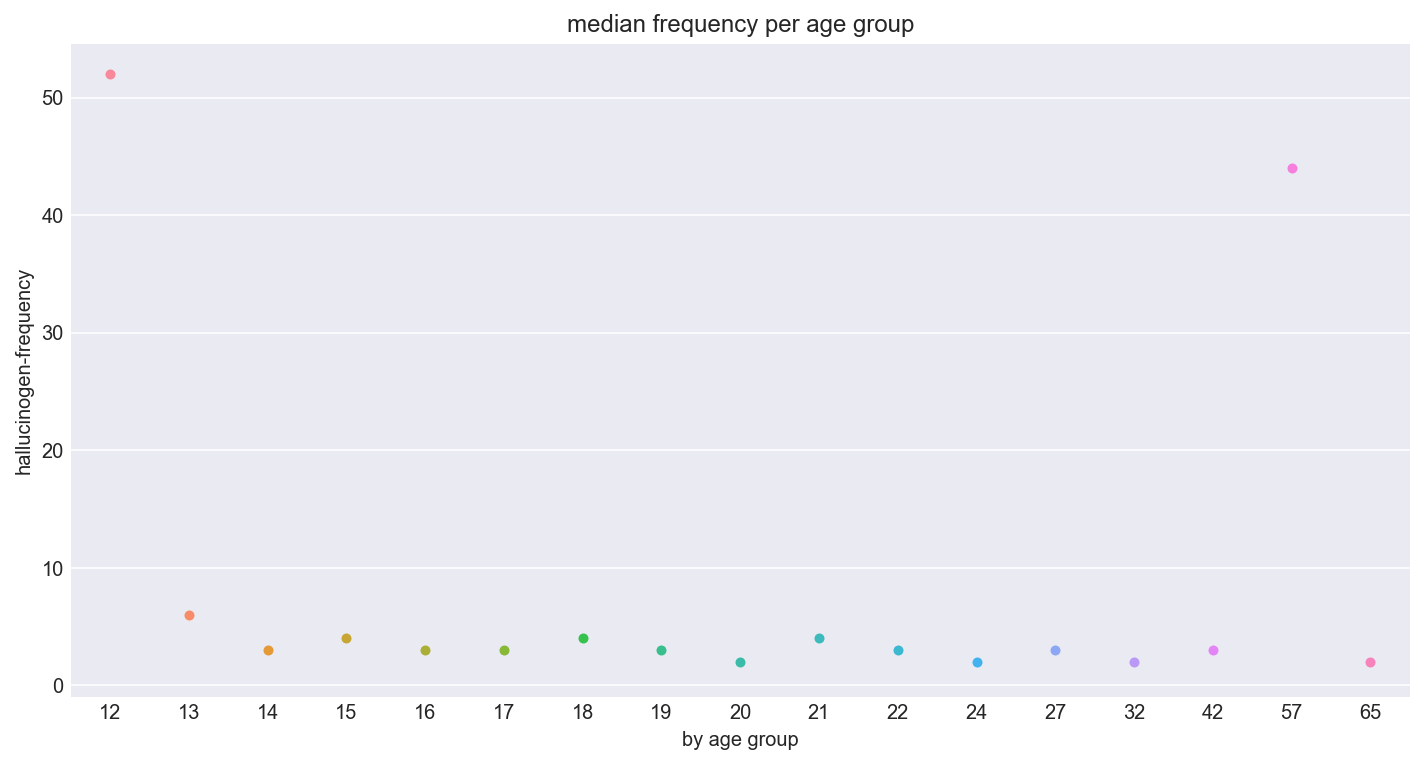

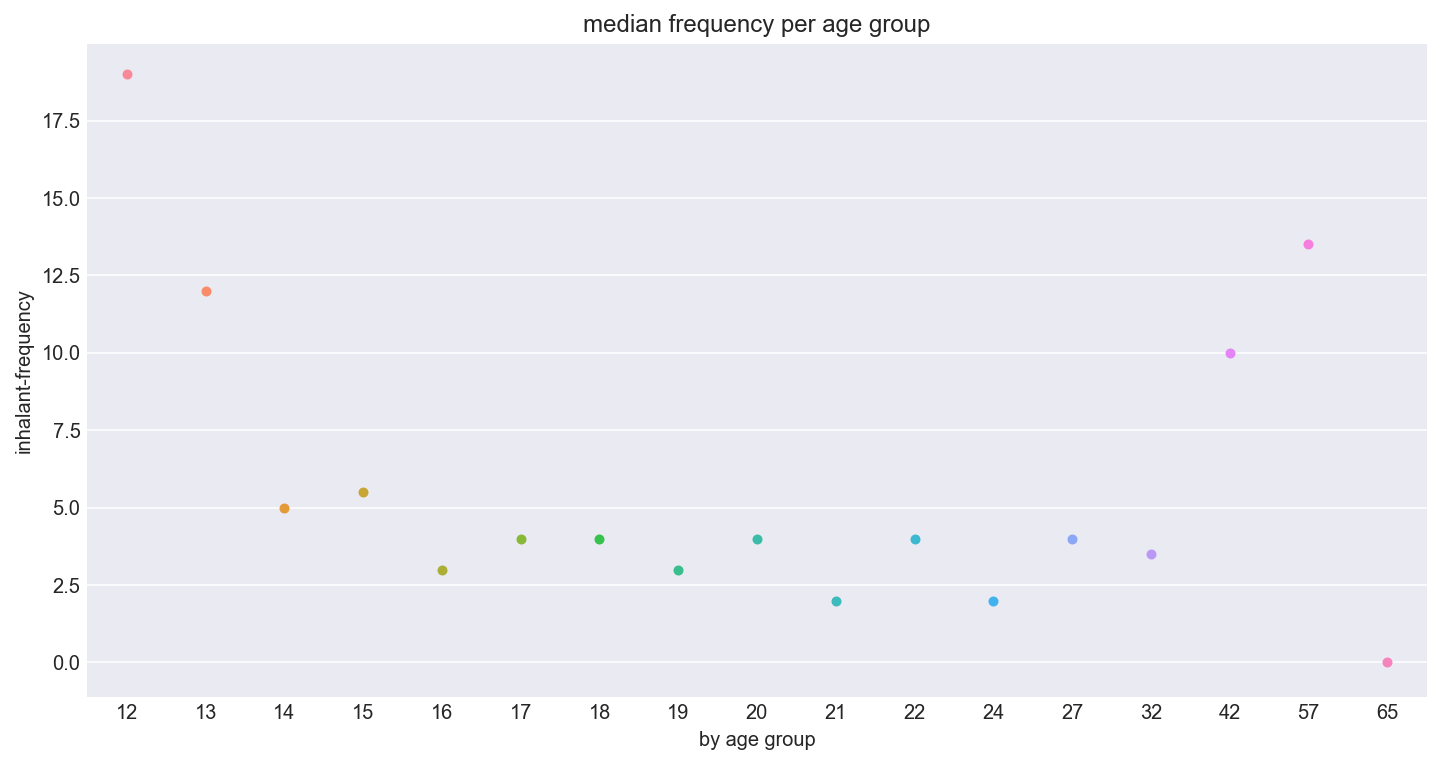

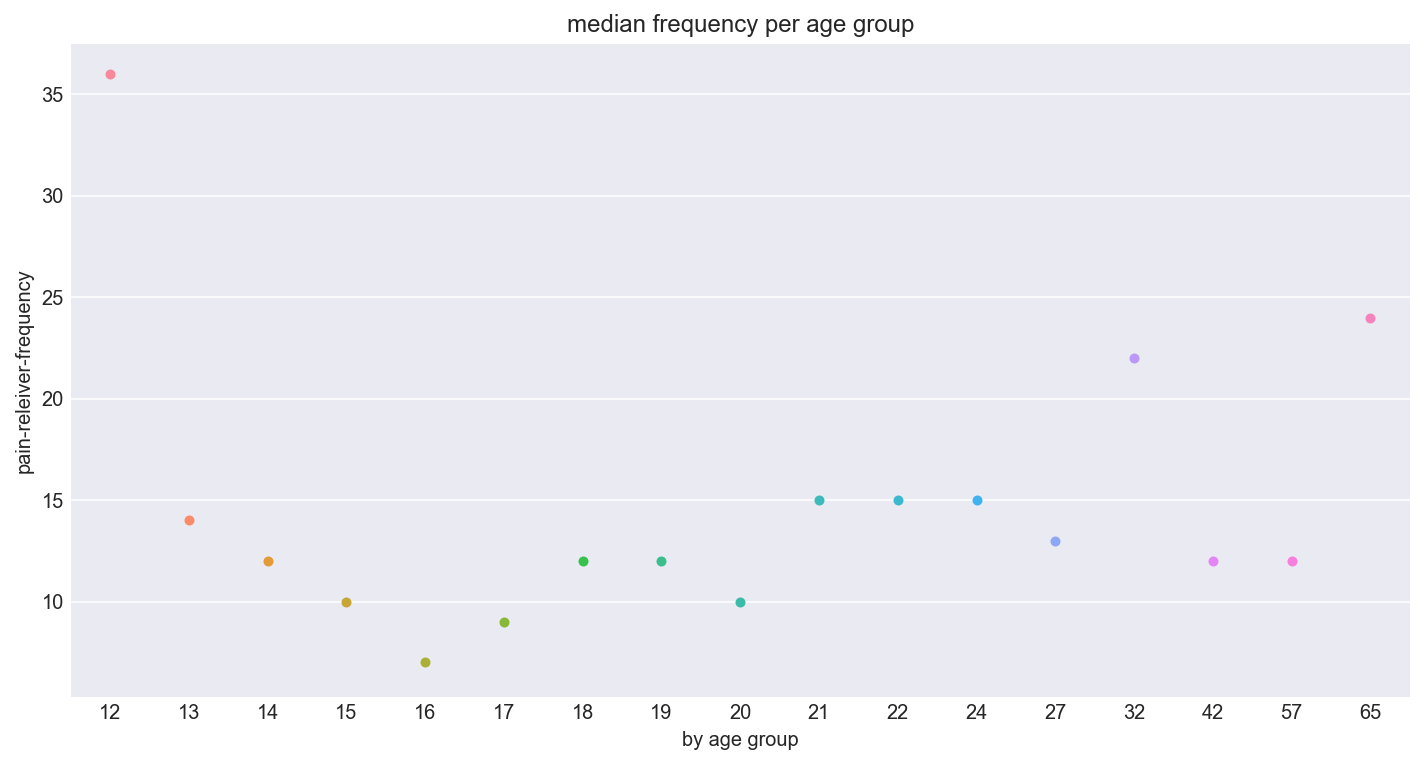

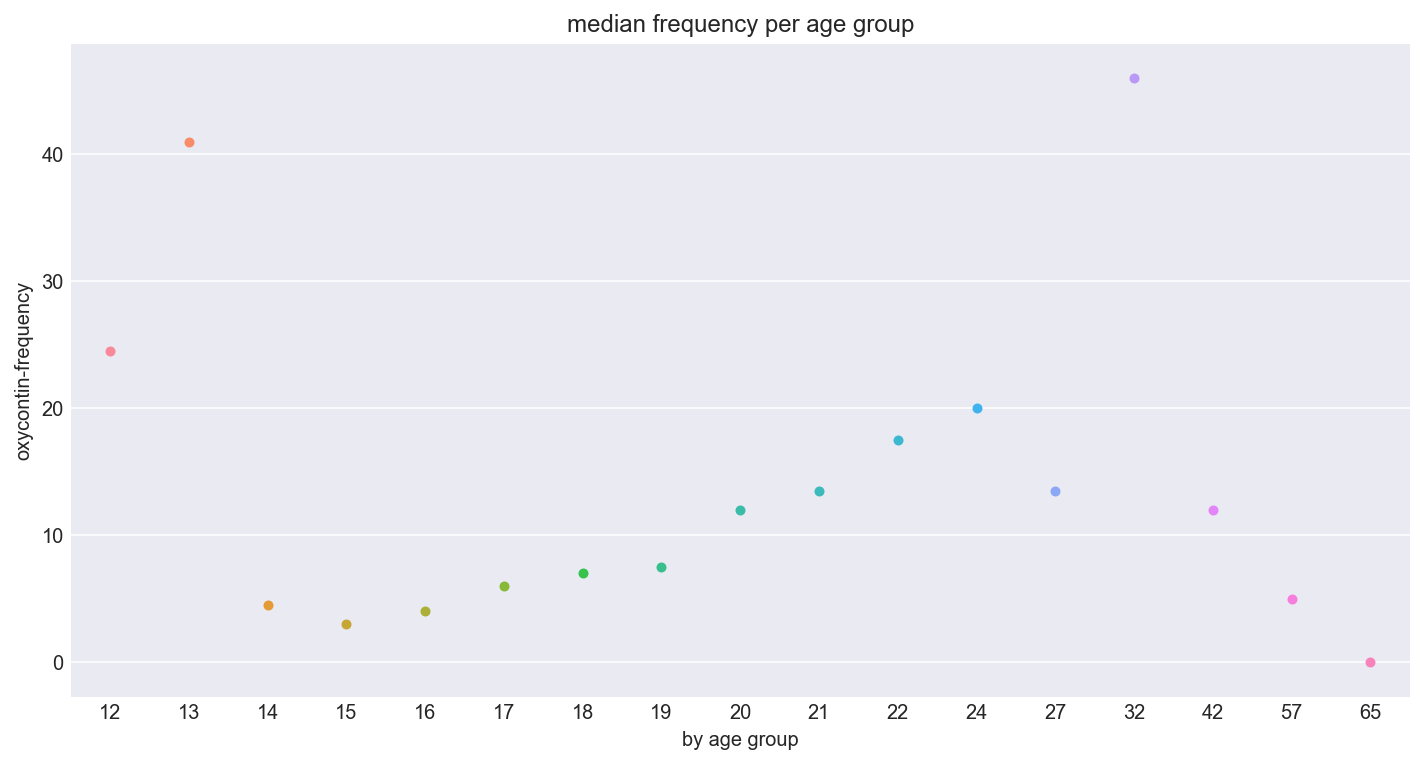

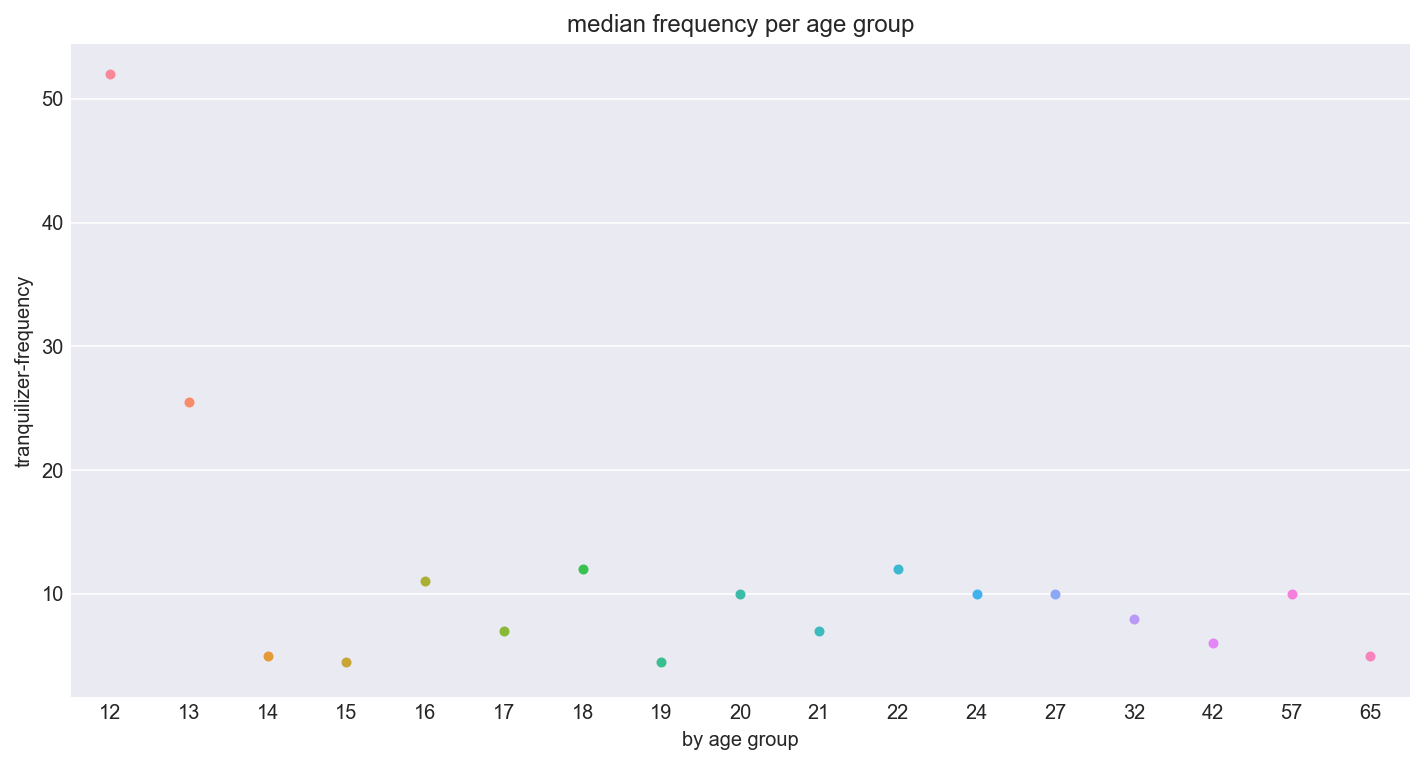

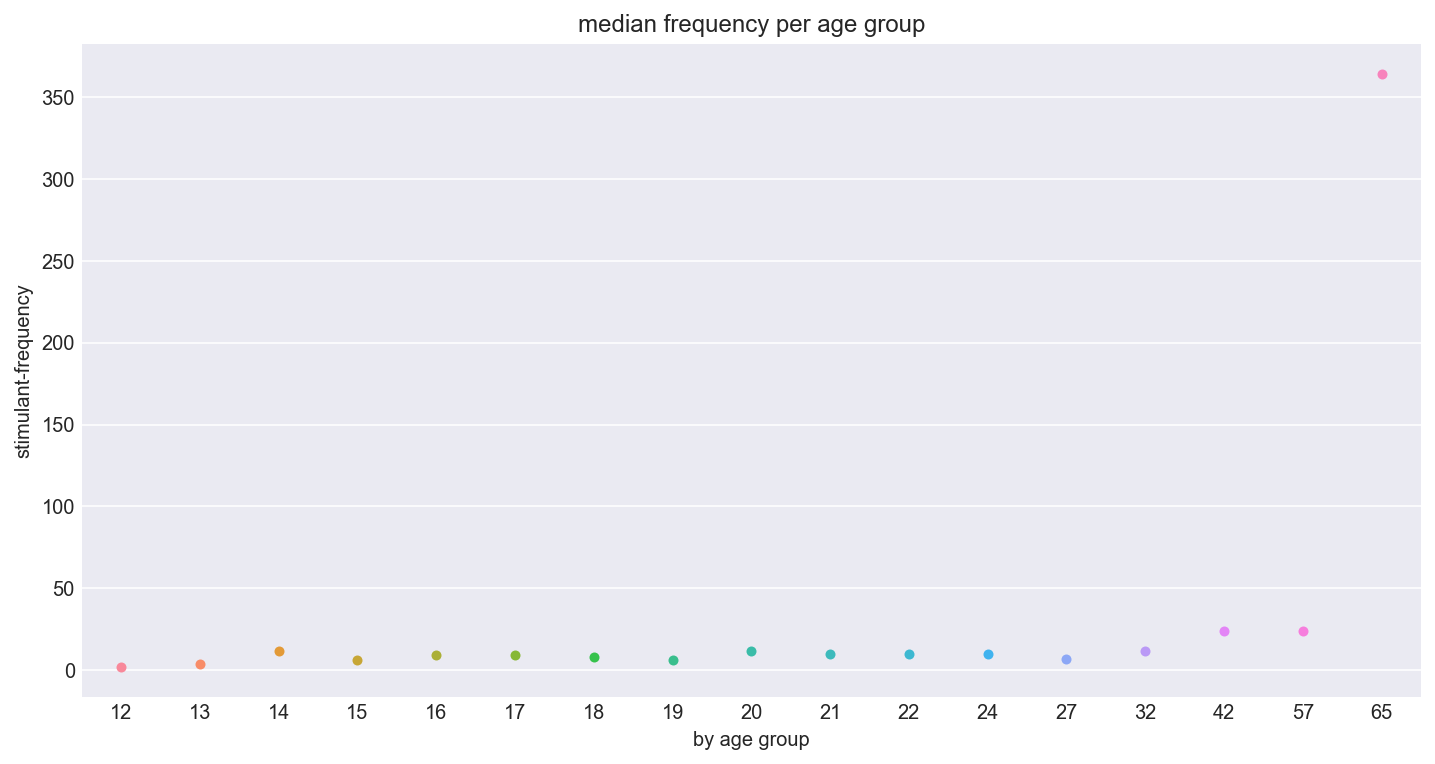

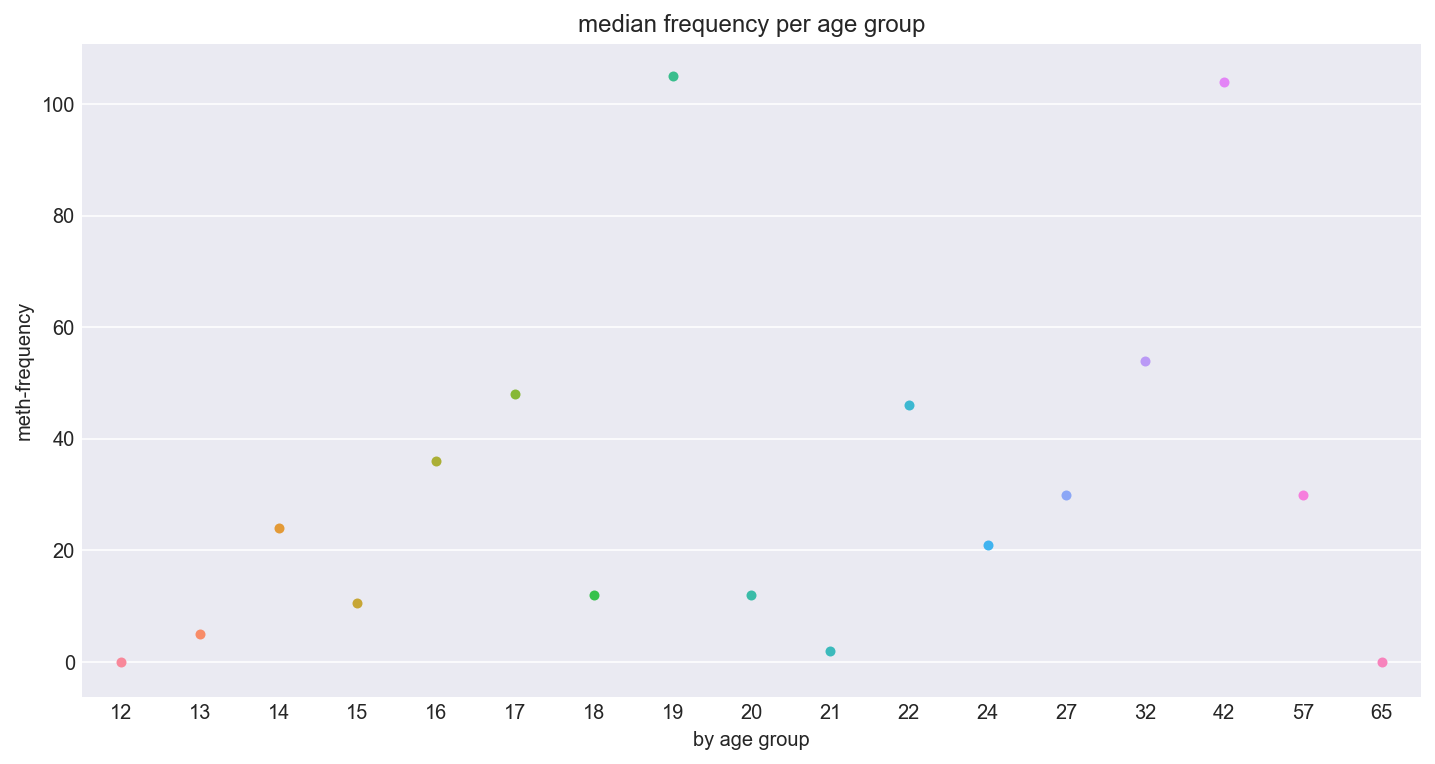

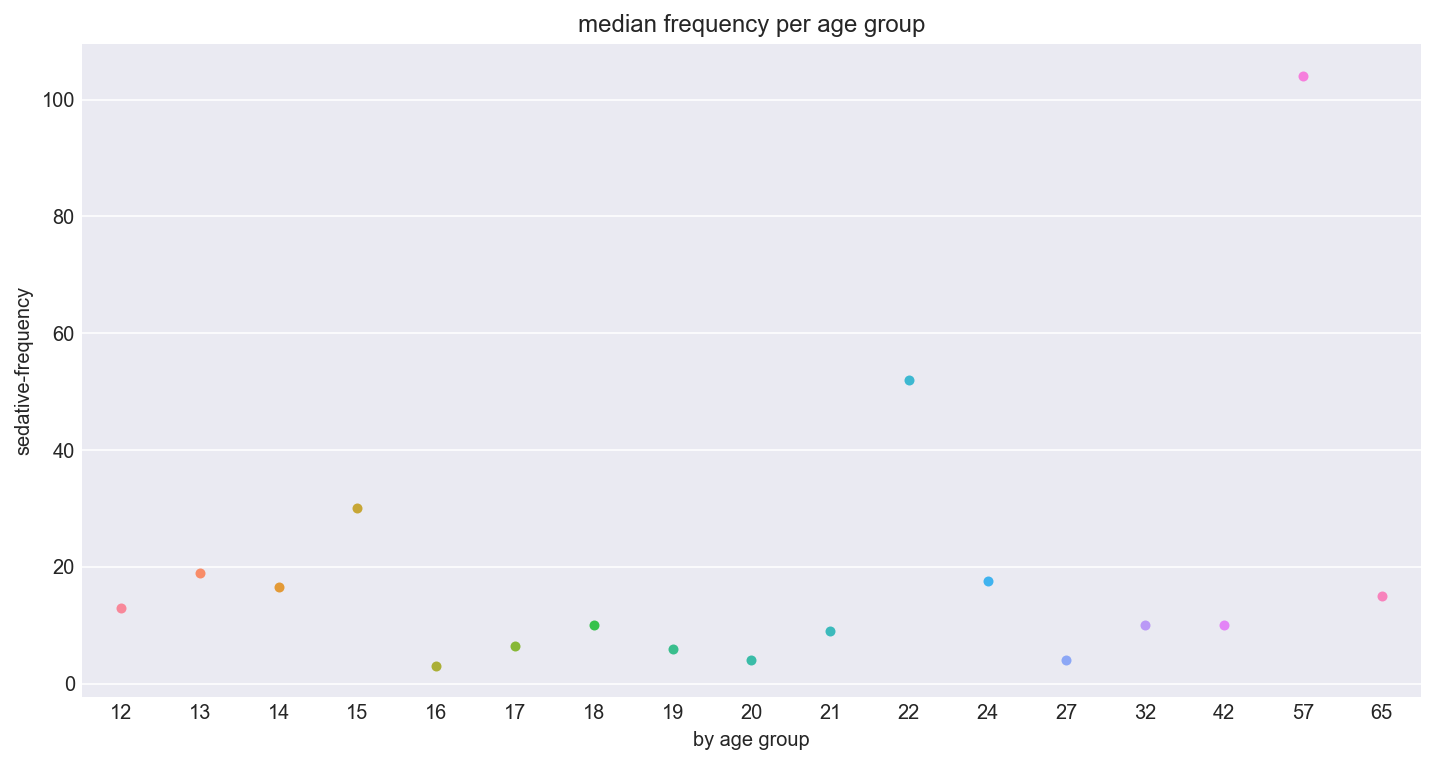

In [74]:
#don't have the percentage yet.. calculate it first

#freqPctDf = freqDf.copy(deep=True)

cols = freqDf.columns.values

# calculate as percentage of each drug frequency across age group 
#freqPctDf[cols]  = freqPctDf[cols].div(freqPctDf[cols].sum(axis=0), axis=1) * 100


for drugType in freqDf.columns.values:
    ax = plt.figure(figsize=(12, 6))
    #ax.set_ylabel('frequency %', fontsize=16)
    #ax.set_title(drugType, fontsize=20)
    ax = sns.stripplot(x=ageIndex, y=freqDf[drugType], data=freqDf)
    ax.set( xlabel='by age group', ylabel=drugType, title='median frequency per age group')

Based on the figure above Alchohol, Marijuana and pain reliever are the 3 higest usesage from any age group

Usage are increasing from teen to early 20s before slowing down as age increases

However based on the frequency Heroin, Marijuana and alchohol are the 3 most frequently used but does not seem to have clear pattern

To have a better view, convert freqency into percentage, then the frequency % shows that in many cases, the users increases the frequncy as age increases.

However a few have no clear patterns and even decreases over time i.e. oxycontin, transquillizer

To get the complete picture, we will further examine the total drug consumption = usage*freq


There could be also be data entry errors
Stimulate frequency could have been 36.4 instead 364 based on the trend at the 65+,
similarly to the sedative frequency could have been 10.4 instead of 104 at the age 50-64 range

But again this may be right due to the grouping

Now let's look at the consumption (usage * frequency) to get the complete picture

In [75]:
drugColData = usageDf.iloc[:, 0] * freqDf.iloc[:, 0]
drugColData.values
usageDf.columns[0]

'alcohol-use'

In [76]:
#now getting the amount of total usage 
drugConsumptionDf = pd.DataFrame()
for pos, colName in enumerate(usageDf.columns):
    drugColData = []
    col = colName.split("-")
    drugColData = usageDf.iloc[:, pos] * freqDf.iloc[:, pos]
    drugConsumptionDf[col[0]] = drugColData.values
    
drugConsumptionDf['sumByAge'] = drugConsumptionDf.sum(axis=1)    

drugConsumptionDf.rename(ageDict)

alcohol  marijuana  cocaine  crack  heroin  hallucinogen  inhalant   pain  \
12     11.7        4.4     0.50   0.00    3.55          10.4     30.40   72.0   
13     51.0       51.0     0.10   0.00    0.00           3.6     30.00   33.6   
14     90.5      208.8     0.55   0.00    0.20           4.8     13.00   46.8   
15    175.2      362.5     2.00   0.95    0.20           8.4     13.75   55.0   
16    401.0      675.0     7.00   0.00    6.65          10.2      9.00   43.4   
17    640.9     1008.0    10.00   2.10    6.40          14.4      8.00   76.5   
18   1408.8     1752.4    16.00   4.00   18.40          28.0      7.20  110.4   
19   2325.6     2004.0    22.55   1.00   90.00          25.8      4.20  112.8   
20   3345.6     2040.0    39.20   3.00   40.50          14.8      6.00  100.0   
21   4326.4     1716.0    24.00   8.50   18.00          25.2      2.80  135.0   
22   4378.4     1476.8    22.50   2.50   63.25          15.6      4.00  150.0   
24   4321.2     1494.0    24.00   3.00   61.60           9.0      1.60  135.0   
27   4196.4     1081.6    16.00   2.40   30.00           9.6      2.40  107.9   
32   4030.0     1180.8    16.80   7.50   26.40           3.6      1.40  129.8   
42   3900.0      499.2    22.50  24.00   28.00           1.8      3.00   50.4   
57   3494.4      379.6    32.40  24.80    4.10          13.2      2.70   30.0   
65   2563.6       43.2     0.00   0.00    0.00           0.2      0.00   14.4   

    oxycontin  tranquilizer  stimulant   meth  sedative  sumByAge  
12       2.45         10.40        0.4   0.00      2.60    148.80  
13       4.10          7.65        1.2   0.50      1.90    184.65  
14       1.80          4.50        9.6   2.40      3.30    386.25  
15       2.40          9.00        9.0   3.15     12.00    653.55  
16       4.40         26.40       17.1  10.80      0.60   1211.55  
17       8.40         24.50       25.2  28.80      3.25   1856.45  
18      11.90         58.80       24.0   6.00      4.00   3449.90  
19      11.25         18.90       19.8  42.00      1.80   4679.70  
20      20.40         54.00       48.0  10.80      2.00   5724.30  
21      17.55         27.30       41.0   1.20      2.70   6345.65  
22      29.75         52.80       36.0  27.60     10.40   6269.60  
24      26.00         43.00       26.0  14.70      3.50   6162.60  
27      16.20         42.00       16.1  18.00      1.60   5540.20  
32      41.40         28.80       16.8  21.60      4.00   5508.90  
42       3.60         11.40       14.4  20.80      3.00   4582.10  
57       2.00         14.00        7.2   6.00     20.80   4031.20  
65       0.00          1.00        0.0   0.00      0.00   2622.40

In [77]:
#top ten age use by age
#topTen = drugConsumptionDf['sumByAge'].nlargest(10)

topFive = drugConsumptionDf.sort_values("sumByAge", ascending=False)
topFive = topFive.rename(ageDict).head(5)

In [78]:
topFive.sumByAge

21    6345.65
22    6269.60
24    6162.60
20    5724.30
27    5540.20
Name: sumByAge, dtype: float64

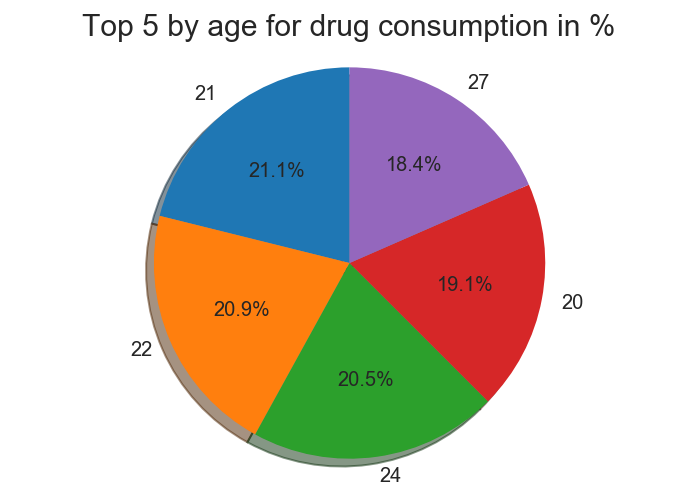

In [79]:
#topFive.pie(x)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = topFive.index.values
sizes = topFive.sumByAge

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Top 5 by age for drug consumption in %", fontsize=15)
plt.show()

Based on this information, drug consumptions are highest are amongst those between 20 - 27 years of age

In [80]:
#drugConsumptionDf.drop(['sumByAge'], axis = 1, inplace = True)

In [81]:
drugTotal = drugConsumptionDf.copy(deep=True)
drugTotal.drop(['sumByAge'], axis = 1, inplace = True)

drugTotal = drugTotal.transpose(copy=True)
drugTotal.columns = ageIndex
drugTotal

12     13      14      15      16       17      18       19  \
alcohol       11.70  51.00   90.50  175.20  401.00   640.90  1408.8  2325.60   
marijuana      4.40  51.00  208.80  362.50  675.00  1008.00  1752.4  2004.00   
cocaine        0.50   0.10    0.55    2.00    7.00    10.00    16.0    22.55   
crack          0.00   0.00    0.00    0.95    0.00     2.10     4.0     1.00   
heroin         3.55   0.00    0.20    0.20    6.65     6.40    18.4    90.00   
hallucinogen  10.40   3.60    4.80    8.40   10.20    14.40    28.0    25.80   
inhalant      30.40  30.00   13.00   13.75    9.00     8.00     7.2     4.20   
pain          72.00  33.60   46.80   55.00   43.40    76.50   110.4   112.80   
oxycontin      2.45   4.10    1.80    2.40    4.40     8.40    11.9    11.25   
tranquilizer  10.40   7.65    4.50    9.00   26.40    24.50    58.8    18.90   
stimulant      0.40   1.20    9.60    9.00   17.10    25.20    24.0    19.80   
meth           0.00   0.50    2.40    3.15   10.80    28.80     6.0    42.00   
sedative       2.60   1.90    3.30   12.00    0.60     3.25     4.0     1.80   

                  20       21       22      24      27      32      42  \
alcohol       3345.6  4326.40  4378.40  4321.2  4196.4  4030.0  3900.0   
marijuana     2040.0  1716.00  1476.80  1494.0  1081.6  1180.8   499.2   
cocaine         39.2    24.00    22.50    24.0    16.0    16.8    22.5   
crack            3.0     8.50     2.50     3.0     2.4     7.5    24.0   
heroin          40.5    18.00    63.25    61.6    30.0    26.4    28.0   
hallucinogen    14.8    25.20    15.60     9.0     9.6     3.6     1.8   
inhalant         6.0     2.80     4.00     1.6     2.4     1.4     3.0   
pain           100.0   135.00   150.00   135.0   107.9   129.8    50.4   
oxycontin       20.4    17.55    29.75    26.0    16.2    41.4     3.6   
tranquilizer    54.0    27.30    52.80    43.0    42.0    28.8    11.4   
stimulant       48.0    41.00    36.00    26.0    16.1    16.8    14.4   
meth            10.8     1.20    27.60    14.7    18.0    21.6    20.8   
sedative         2.0     2.70    10.40     3.5     1.6     4.0     3.0   

                  57      65  
alcohol       3494.4  2563.6  
marijuana      379.6    43.2  
cocaine         32.4     0.0  
crack           24.8     0.0  
heroin           4.1     0.0  
hallucinogen    13.2     0.2  
inhalant         2.7     0.0  
pain            30.0    14.4  
oxycontin        2.0     0.0  
tranquilizer    14.0     1.0  
stimulant        7.2     0.0  
meth             6.0     0.0  
sedative        20.8     0.0

In [82]:
#find 8 largest drugs consumption
#locationDf = location['Comm Timedate String'].nlargest(8)
topThree = pd.DataFrame()
for a in ageIndex:
    topThree[a] = drugTotal[a].nlargest(8)
    
#drop those that have nan values to get to top three
topThree
topThree.dropna(axis=0, how='any', inplace=True) 

Text(0.5,1,'Top 3 drugs consumption by age')

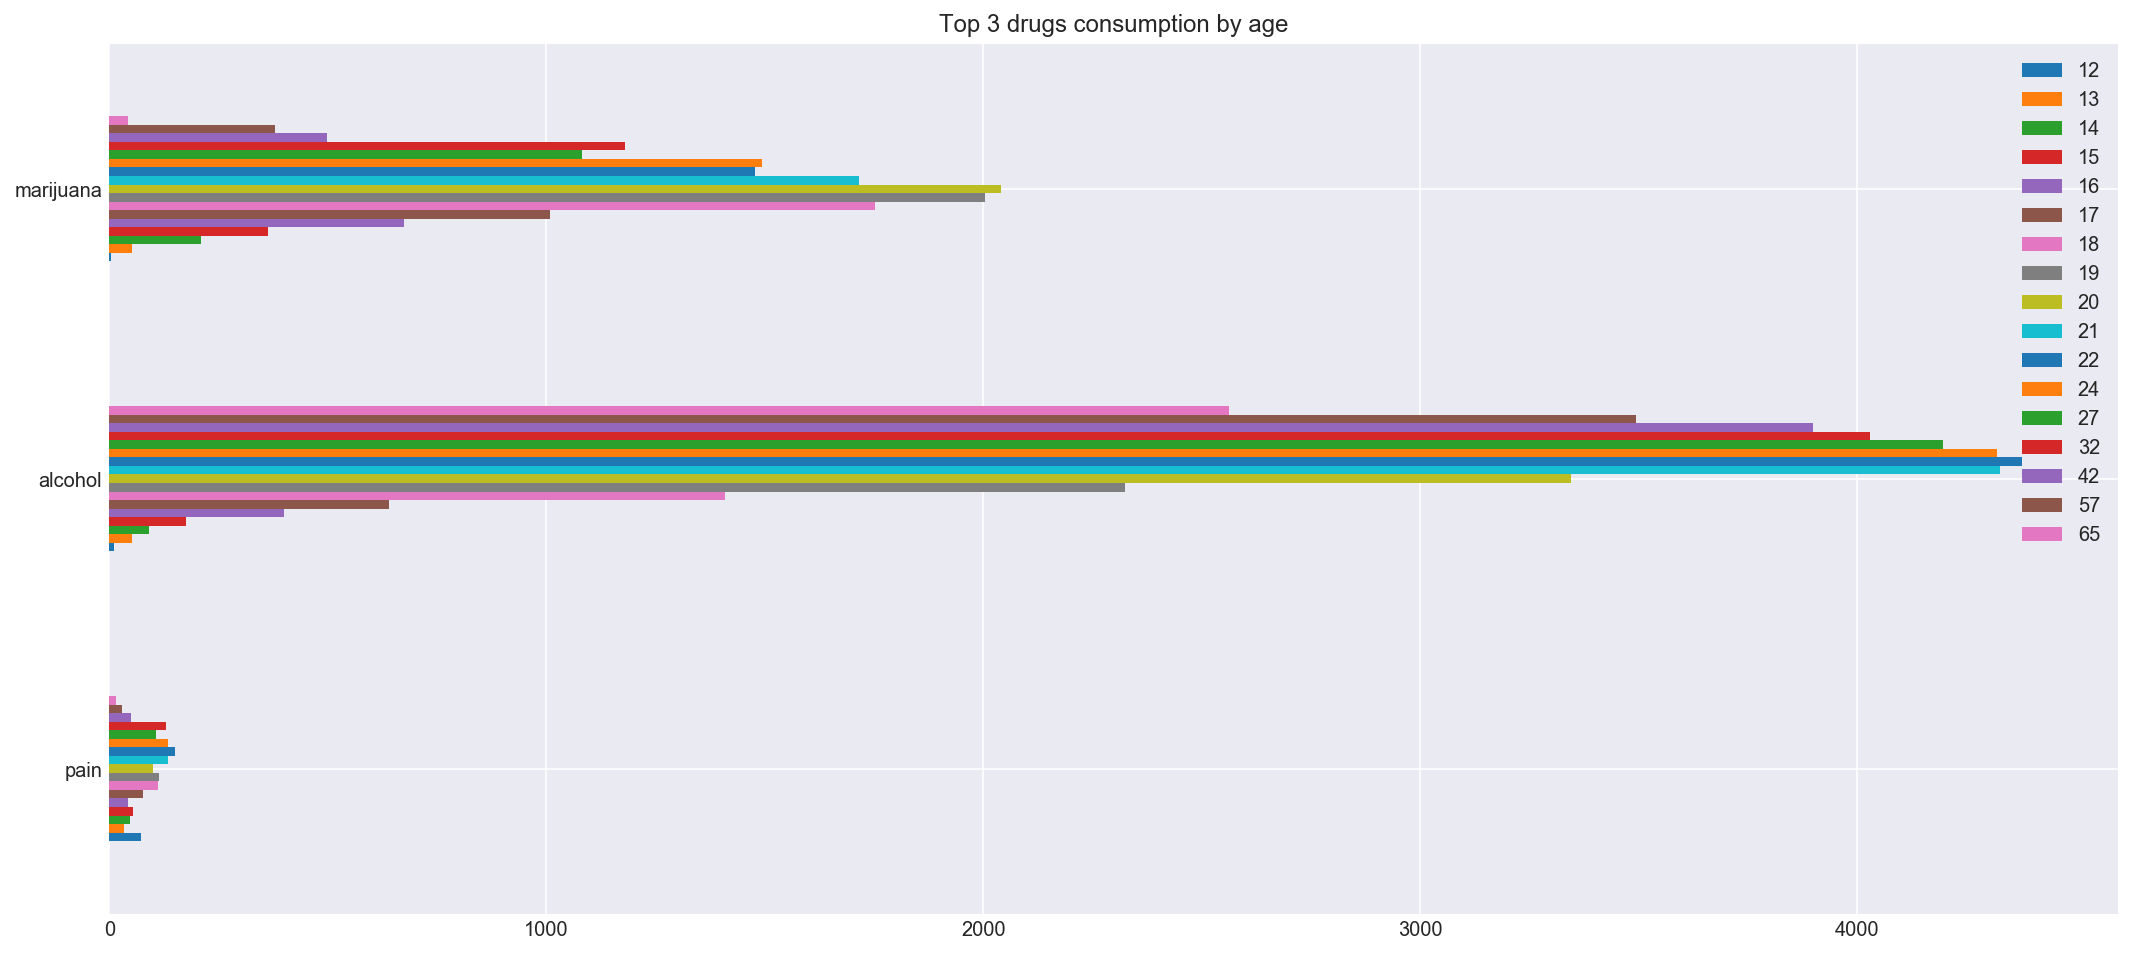

In [83]:
ax = topThree.plot(kind='barh', figsize=(18, 8))

ax.set_title("Top 3 drugs consumption by age")

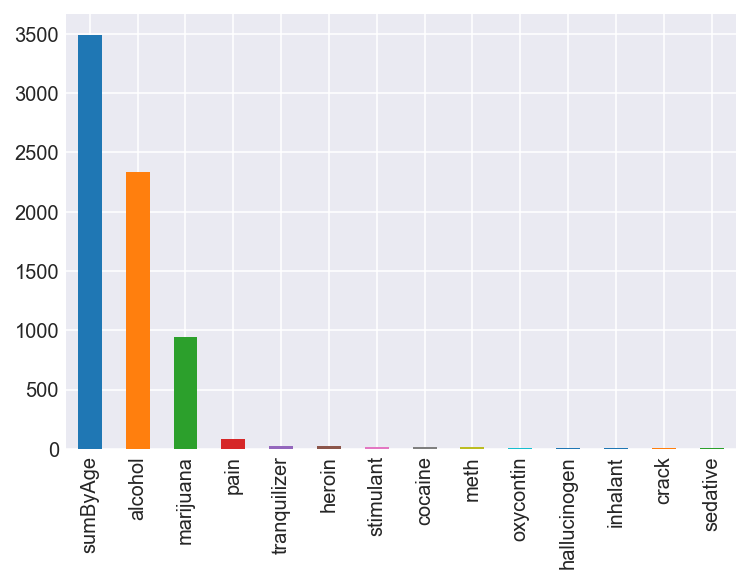

In [84]:
#drugConsumptionDf.describe().mean()

drugConsumptionDf.mean().sort_values(ascending=False).plot(kind='bar')

**Report**

The top 3 drugs uses are Alcohol, Marijuana and Pain Relievers.

The scale of the top 2 exceed all other drugs types.  Therefore the main education focus should be related to those 2 drugs usage.

The top main users are aged between 20 - 27 years of age.  The trend is showing that the drug uses starts to increase in their teenage years.


Therefore drug eductions should be early from Junior to High Schools.


The early twenties, if students go to the universities or other educations institues.  The educations should further enforces the educations related to recreational drugs usages and its negative impact to the users lives.

Based on my background, the colleage often welcome new students often using alcohols, this could be one causes.
Other causes could be the age where the users can legally purchases the alcohols.  Others could be a cultural reasons where gathering often involved alcohols.

For Marijuana when it is considered illegal in some USA sates but legal in others.  This could be the reasons why it is ranked seconds

Further exploration on if the drugs ae illegal or non-legal have any impact on the usage/frequency could be explored


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

HO - Null Hypothesis

Non controlled Drugs consumption mean is the same as all controlled drugs consumption

HA - Althernate Hypothesis

Non controlled Drugs consumption is higher than all controlled drugs consumption

 
 
so first classify drugs into legal or controlled

 Only Alcohol and Tobacco are not controlled substance. 

 https://en.wikipedia.org/wiki/Controlled_Substances_Act
...

In [85]:
from scipy import stats
from scipy.stats import t

In [86]:
usageDf.head(3)

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
12          3.9            1.1          0.1        0.0         0.1   
13          8.5            3.4          0.1        0.0         0.0   
14         18.1            8.7          0.1        0.0         0.1   

    hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
12               0.2           1.6                2.0            0.1   
13               0.6           2.5                2.4            0.1   
14               1.6           2.6                3.9            0.4   

    tranquilizer-use  stimulant-use  meth-use  sedative-use  
12               0.2            0.2       0.0           0.2  
13               0.3            0.3       0.1           0.1  
14               0.9            0.8       0.1           0.2

In [87]:
usageDf.iloc[:, 1:].T.head()

12   13   14    15    16    17    18    19    20    21  \
marijuana-use     1.1  3.4  8.7  14.5  22.5  28.0  33.7  33.4  34.0  33.0   
cocaine-use       0.1  0.1  0.1   0.5   1.0   2.0   3.2   4.1   4.9   4.8   
crack-use         0.0  0.0  0.0   0.1   0.0   0.1   0.4   0.5   0.6   0.5   
heroin-use        0.1  0.0  0.1   0.2   0.1   0.1   0.4   0.5   0.9   0.6   
hallucinogen-use  0.2  0.6  1.6   2.1   3.4   4.8   7.0   8.6   7.4   6.3   

                    22    24    27    32    42   57   65  
marijuana-use     28.4  24.9  20.8  16.4  10.4  7.3  1.2  
cocaine-use        4.5   4.0   3.2   2.1   1.5  0.9  0.0  
crack-use          0.5   0.5   0.4   0.5   0.5  0.4  0.0  
heroin-use         1.1   0.7   0.6   0.4   0.1  0.1  0.0  
hallucinogen-use   5.2   4.5   3.2   1.8   0.6  0.3  0.1

In [88]:
controlDf = pd.DataFrame(usageDf.iloc[:, 1:].T.head().sum())
controlDf.columns = ['drug-use']
controlDf.head()

drug-use
12       1.5
13       4.1
14      10.5
15      17.4
16      27.0

In [89]:
nonControlDf = usageDf[['alcohol-use']]
nonControlDf.columns = ['drug-use']
nonControlDf.head()

drug-use
12       3.9
13       8.5
14      18.1
15      29.2
16      40.1

In [90]:
controlDf['drug-use'].mean()

25.14117647058823

In [91]:
nonControlDf['drug-use'].mean()

55.42941176470588

In [92]:
t_stat = stats.ttest_ind(nonControlDf, controlDf)

In [93]:
t_stat.statistic

array([3.94701673])

In [94]:
t_stat.pvalue/2

array([0.00020318])

In [95]:
control = controlDf['drug-use'].values
t_interval_95_control = t.interval(0.95,
                           len(control)-1,
                           loc=np.mean(control),
                           scale=np.std(control, ddof = 1)/(len(control))**0.5)

In [96]:
nonControl = nonControlDf['drug-use'].values
t_interval_95_noncontrol = t.interval(0.95,
                           len(nonControl)-1,
                           loc=np.mean(nonControl),
                           scale=np.std(nonControl, ddof = 1)/(len(nonControl))**0.5)

In [97]:
control_lower = t_interval_95_control[0]
control_upper = t_interval_95_control[1]

In [98]:
nonControl_lower = t_interval_95_noncontrol[0]
nonControl_upper = t_interval_95_noncontrol[1]

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


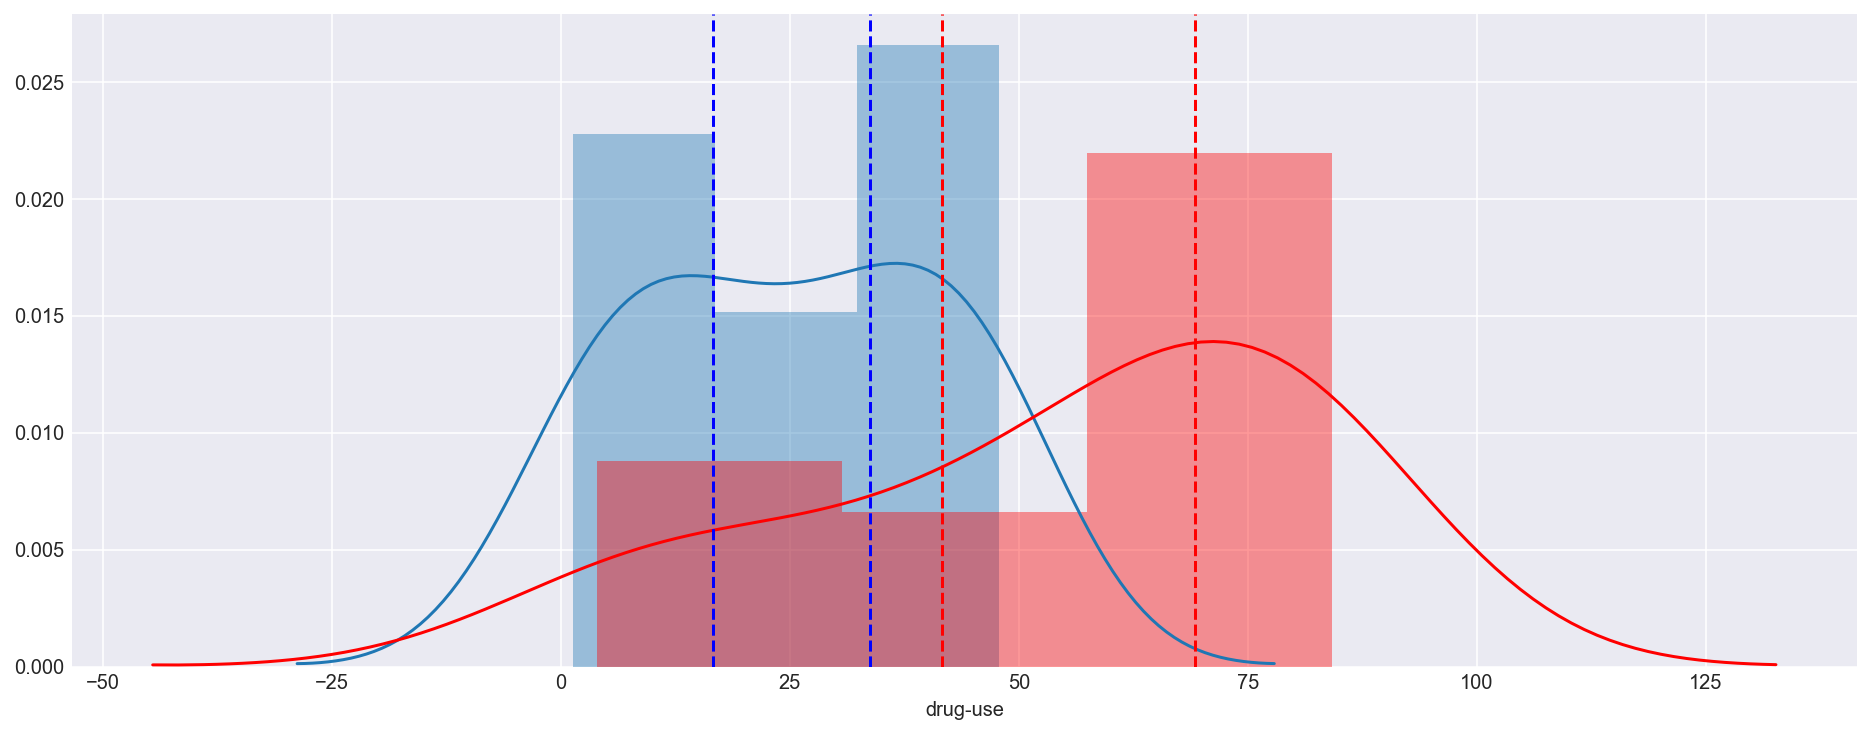

In [99]:
(fig, ax) = plt.subplots(figsize=(16, 6))
sns.distplot(controlDf['drug-use'], ax=ax)
sns.distplot(nonControlDf['drug-use'], ax=ax, color='red')


plt.axvline(x = control_lower, color='b', linestyle='--')
plt.axvline(x = control_upper, color='b', linestyle='--')

plt.axvline(x = nonControl_lower, color='r', linestyle='--')
plt.axvline(x = nonControl_upper, color='r', linestyle='--')


**Report**

Control usage mean (Prescription and Illegal Drugs) is 25.14117647058823
Non-Control (Alcohol) usage mean is 55.42941176470588
T_Stat.statistic is 3.94701673
P Value is 0.00020318 (for each tail)

We reject our null hypothesis and conclude that the true mean of Non-Control (in this case only alchohol) Drug Usage value is the same as the mean of All (12 different types of drugs combine) Control Drug Usage value.

This highlight how effective control drug usage compare to the non-control drug.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [100]:
satDf.head()

Rate  Verbal  Math  Verbal_Math
State                                 
CT       82     509   510           -1
NJ       81     499   513          -14
MA       79     511   515           -4
NY       77     495   505          -10
NH       72     520   516            4

In [101]:
satNoRateDf = satDf.copy(True)
satNoRateDf = satNoRateDf.drop(columns=['Rate'])
satNoRateDf.head()

Verbal  Math  Verbal_Math
State                           
CT        509   510           -1
NJ        499   513          -14
MA        511   515           -4
NY        495   505          -10
NH        520   516            4

In [102]:
satNoRateDf.describe()

Verbal        Math  Verbal_Math
count   51.000000   51.000000    51.000000
mean   532.529412  531.843137     0.686275
std     33.360667   36.287393    15.839811
min    482.000000  439.000000   -30.000000
25%    501.000000  503.000000    -6.000000
50%    527.000000  525.000000     0.000000
75%    562.000000  557.500000     4.500000
max    593.000000  603.000000    95.000000

In [103]:
satNoRateDf.corr()

Verbal      Math  Verbal_Math
Verbal       1.000000  0.899909     0.044527
Math         0.899909  1.000000    -0.395574
Verbal_Math  0.044527 -0.395574     1.000000

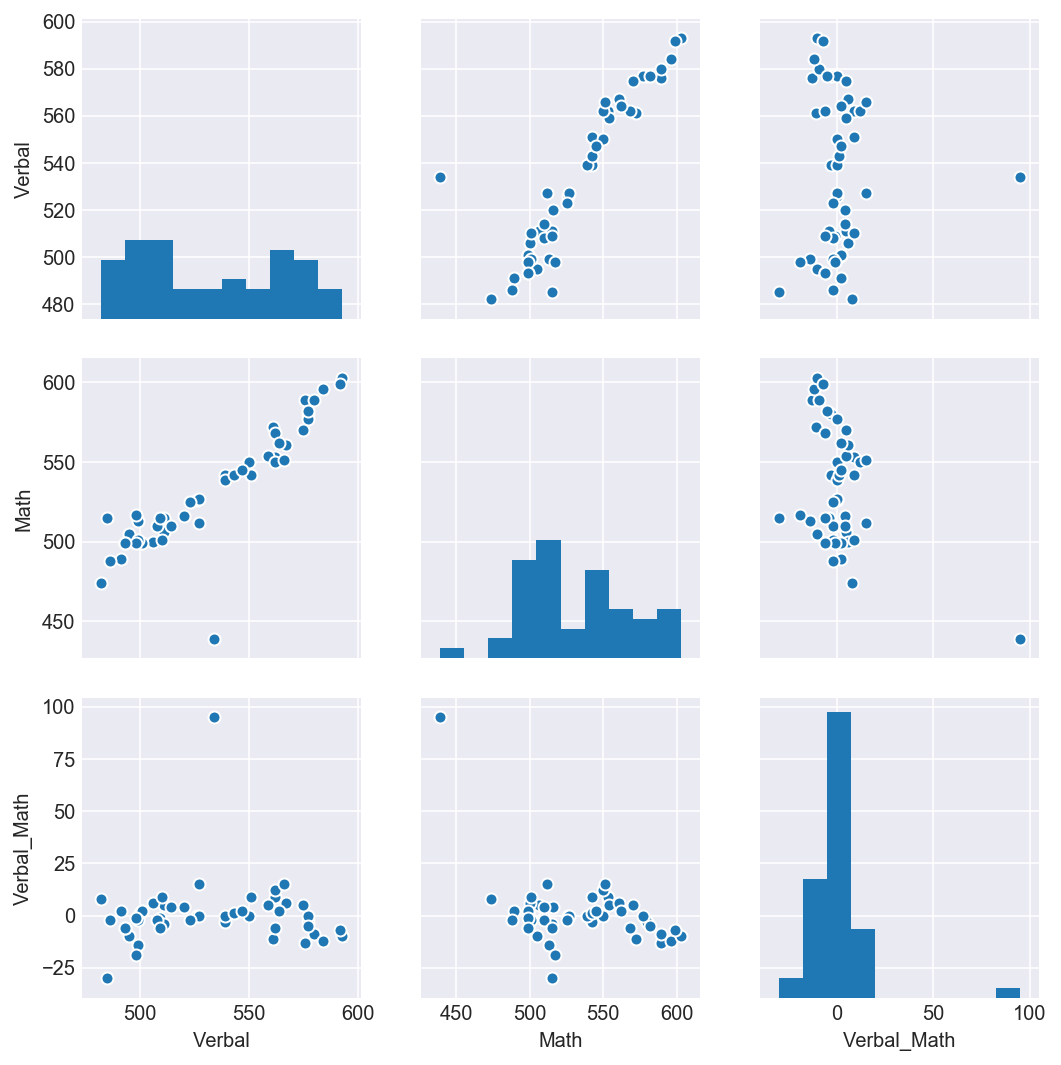

In [104]:
#use pairplot to see if there is an outlier
sns.pairplot(satNoRateDf)

In [105]:
# outliers are those that are < or > 3 standard deviation away from the mean
mathMean = satNoRateDf['Math'].mean()
mathStd = 3 * satNoRateDf['Math'].std()
mathLower = mathMean - mathStd
mathUpper = mathMean + mathStd
print (mathMean, mathStd)
print (mathLower, mathUpper)

531.843137254902 108.86217946397664
422.98095779092534 640.7053167188786


In [106]:
rowMathMask = (satNoRateDf['Math'] < mathLower) | (satNoRateDf['Math'] > mathUpper)

In [107]:
# outliers are those that are < or > 3 standard deviation away from the mean
verbalMean = satNoRateDf['Verbal'].mean()
verbalStd = 3 * satNoRateDf['Verbal'].std()
verbalLower = mathMean - mathStd
verbalUpper = mathMean + mathStd
print (verbalMean, verbalStd)
print (verbalLower, verbalUpper)

532.5294117647059 100.082001672746
422.98095779092534 640.7053167188786


In [108]:
rowVerbalMask = (satNoRateDf['Verbal'] < mathLower) | (satNoRateDf['Verbal'] > mathUpper)

In [109]:
newSat = satNoRateDf[rowMathMask]
newSat.count()

Verbal         0
Math           0
Verbal_Math    0
dtype: int64

No outliers in Math

In [110]:
newSat = satNoRateDf[rowVerbalMask]
newSat.count()

Verbal         0
Math           0
Verbal_Math    0
dtype: int64

No outliers in Verbal

In [111]:
satNoRateDf.sort_values(by='Verbal_Math').head()

Verbal  Math  Verbal_Math
State                           
HI        485   515          -30
CA        498   517          -19
NJ        499   513          -14
IL        576   589          -13
WI        584   596          -12

In [112]:
satNoRateDf.sort_values(by='Verbal_Math').tail()

Verbal  Math  Verbal_Math
State                           
TN        562   553            9
AR        562   550           12
WV        527   512           15
MS        566   551           15
OH        534   439           95

In [113]:
# find the outliers in a different way

outlier = satNoRateDf['Verbal_Math'] == satNoRateDf['Verbal_Math'].max()
no_outliers = satNoRateDf.loc[outlier]

no_outliers

Verbal  Math  Verbal_Math
State                           
OH        534   439           95

In [114]:
no_outliers = satDf.copy()
no_outliers = no_outliers.drop('OH')

In [115]:
no_outliers.cov()

Rate       Verbal         Math  Verbal_Math
Rate         772.011837  -832.602041  -810.259184   -22.342857
Verbal      -832.602041  1135.602041  1114.479592    21.122449
Math        -810.259184  1114.479592  1164.214286   -49.734694
Verbal_Math  -22.342857    21.122449   -49.734694    70.857143

In [116]:
no_outliers.describe()

Rate      Verbal        Math  Verbal_Math
count  50.000000   50.000000   50.000000    50.000000
mean   37.220000  532.500000  533.700000    -1.200000
std    27.785101   33.698695   34.120584     8.417668
min     4.000000  482.000000  474.000000   -30.000000
25%     9.000000  501.000000  505.250000    -6.000000
50%    33.500000  526.500000  525.500000     0.000000
75%    64.500000  562.000000  559.250000     4.000000
max    82.000000  593.000000  603.000000    15.000000

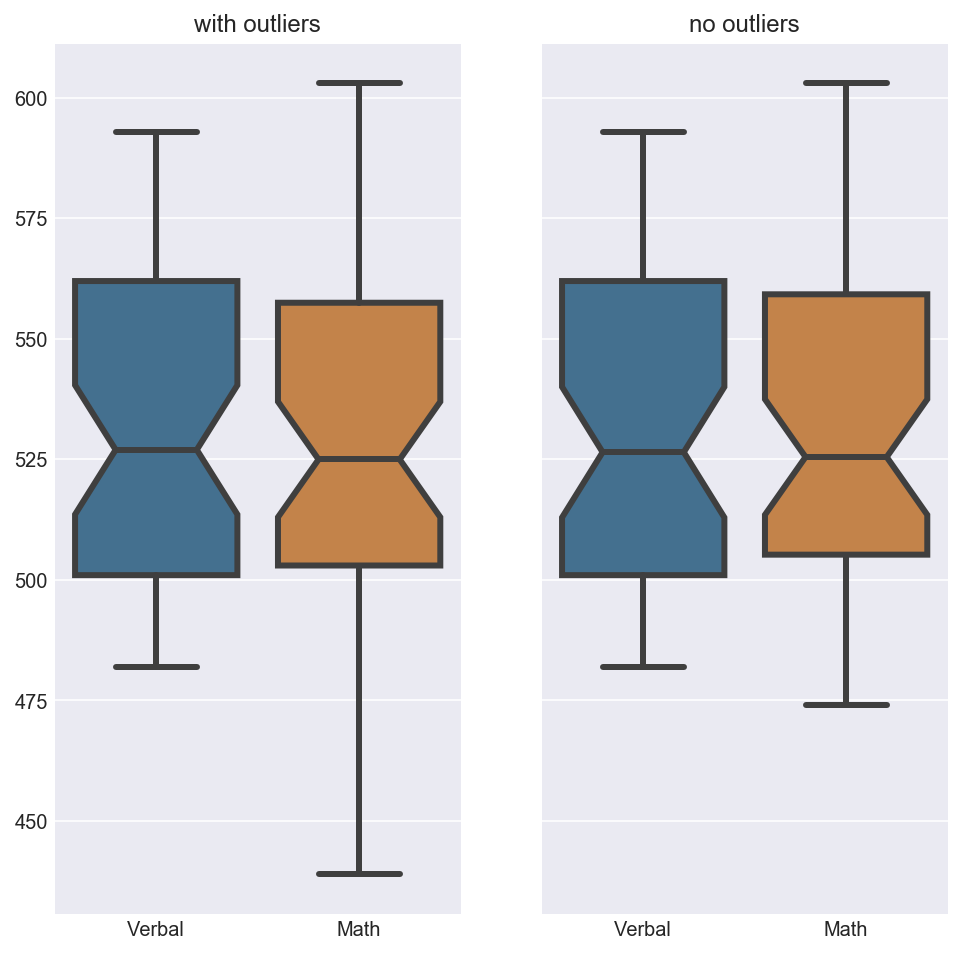

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,8))

ax = sns.boxplot(data=satDf[['Verbal', 'Math']], orient='v', fliersize=3, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax1)
ax.set_title("with outliers")


ax1 = sns.boxplot(data=no_outliers[['Verbal', 'Math']], orient='v', fliersize=3, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax2)
ax1.set_title("no outliers")

plt.show()

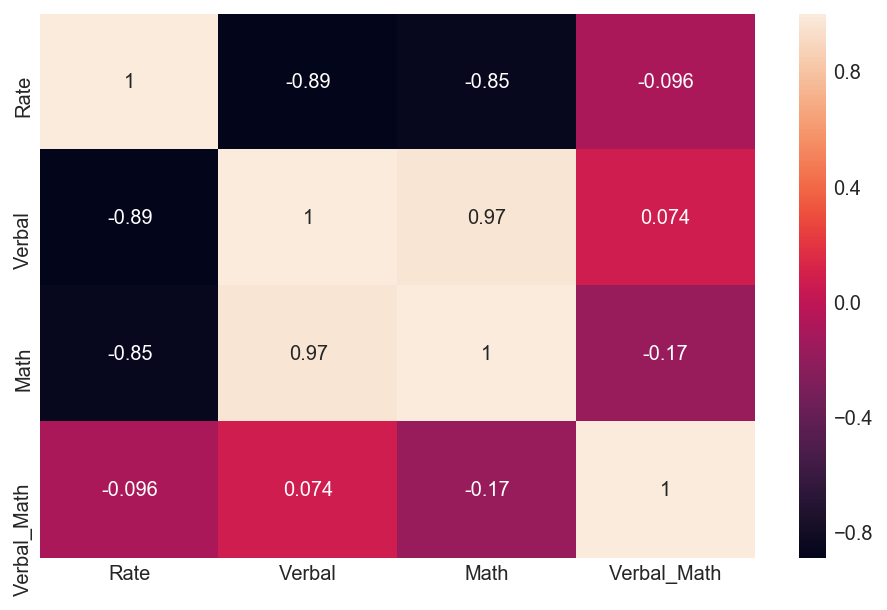

In [118]:
plt.figure(figsize=(8,5)) 
sns.heatmap(no_outliers.corr(), annot=True)

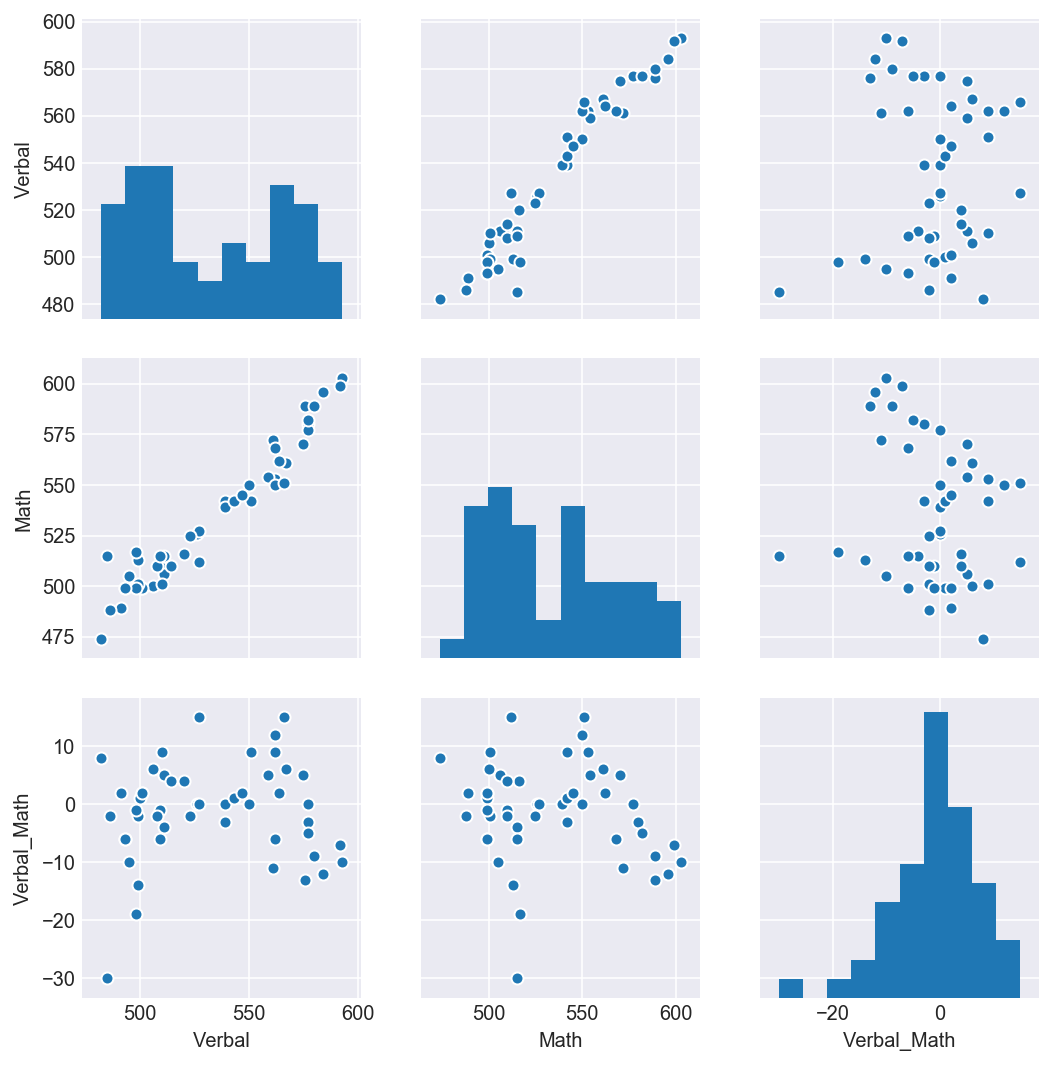

In [119]:
sns.pairplot(no_outliers[['Verbal', 'Math', 'Verbal_Math']])

The statistics correlationship looks much better after the outlier has been removed.

Might be a good idea to do the box plot with outlier vs no outliers

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Reference:
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials

Pearson correlation coefficients measure only linear relationship between two continuous variables
Spearman correlation coefficients measure only monotonic relationship between two continuous or ordinal variables
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data

So a meaningful relationship can exist even if the correlation coefficients are 0. 

It is always a good idea to examine the relationship between variables with a scatterplot. 
Correlation coefficients only measure linear (Pearson) or monotonic (Spearman) relationships.

In [120]:
x = no_outliers['Verbal']

In [121]:
y = no_outliers['Math']

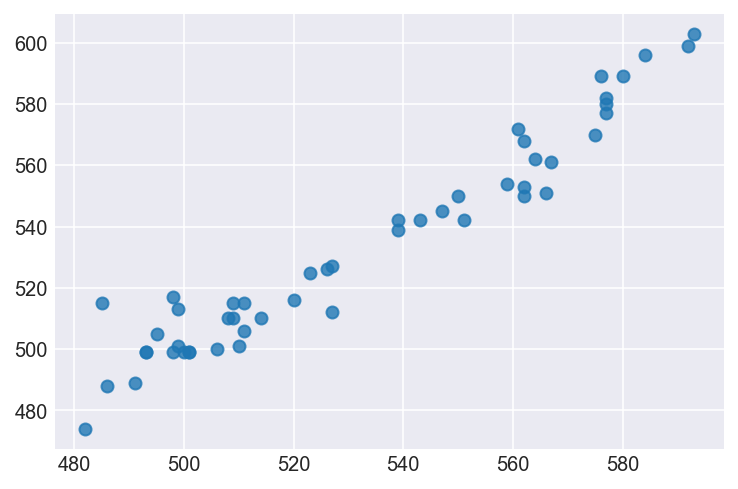

In [122]:
plt.scatter(x, y, alpha=0.8)

plt.show()

In [123]:
verbal = x.values

In [124]:
maths = y.values

In [125]:
# calculate the pearson correlation coefficient between verbal and maths
corr_pearson, pval_pearson = stats.pearsonr(verbal, maths)

In [126]:
corr_pearson

0.969265100963514

In [127]:
pval_pearson

6.894783159173177e-31

In [128]:
pearson = no_outliers[['Verbal', 'Math']].corr(method='pearson')
pearson

Verbal      Math
Verbal  1.000000  0.969265
Math    0.969265  1.000000

In [129]:
# calculate the spearman correlation coefficient between verbal and maths
corr_spearman, pval_spearman = stats.spearmanr(verbal, maths)

In [130]:
corr_spearman

0.9402177055749892

In [131]:
pval_spearman

4.2741486916204536e-24

In [132]:
spearman = no_outliers[['Verbal', 'Math']].corr(method='spearman')
spearman

Verbal      Math
Verbal  1.000000  0.940218
Math    0.940218  1.000000

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


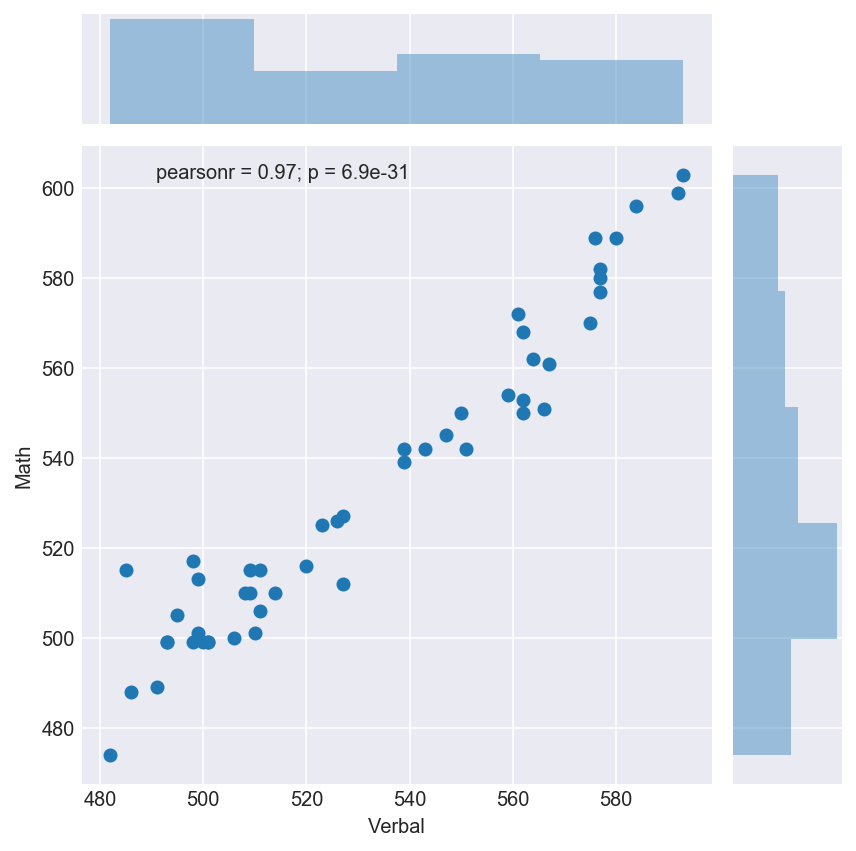

In [133]:
sns.jointplot(x, y)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [134]:
from scipy import stats
from scipy.stats import t

In [135]:
rate = satDf['Rate']
ratevals = rate.values
ratevals

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4],
      dtype=int64)

kind='weak', kind='strict', kind='mean'
rate_pct_kind = [stats.percentileofscore(ratevals,ratevals[r], kind='?') for r in range(len(ratevals))]

In [136]:
satDf['RatePct'] = [stats.percentileofscore(ratevals,ratevals[r]) for r in range(len(ratevals))]
ratePct = satDf['RatePct'].values
satDf

Rate  Verbal  Math  Verbal_Math     RatePct
State                                             
CT       82     509   510           -1  100.000000
NJ       81     499   513          -14   98.039216
MA       79     511   515           -4   96.078431
NY       77     495   505          -10   94.117647
NH       72     520   516            4   92.156863
RI       71     501   499            2   89.215686
PA       71     500   499            1   89.215686
VT       69     511   506            5   85.294118
ME       69     506   500            6   85.294118
VA       68     510   501            9   82.352941
DE       67     501   499            2   80.392157
MD       65     508   510           -2   77.450980
NC       65     493   499           -6   77.450980
GA       63     491   489            2   74.509804
IN       60     499   501           -2   72.549020
SC       57     486   488           -2   70.588235
DC       56     482   474            8   68.627451
OR       55     526   526            0   66.666667
FL       54     498   499           -1   64.705882
WA       53     527   527            0   61.764706
TX       53     493   499           -6   61.764706
HI       52     485   515          -30   58.823529
AK       51     514   510            4   55.882353
CA       51     498   517          -19   55.882353
AZ       34     523   525           -2   52.941176
NV       33     509   515           -6   50.980392
CO       31     539   542           -3   49.019608
OH       26     534   439           95   47.058824
MT       23     539   539            0   45.098039
WV       18     527   512           15   43.137255
ID       17     543   542            1   41.176471
TN       13     562   553            9   38.235294
NM       13     551   542            9   38.235294
IL       12     576   589          -13   34.313725
KY       12     550   550            0   34.313725
WY       11     547   545            2   30.392157
MI       11     561   572          -11   30.392157
MN        9     580   589           -9   25.490196
KS        9     577   580           -3   25.490196
AL        9     559   554            5   25.490196
NE        8     562   568           -6   19.607843
OK        8     567   561            6   19.607843
MO        8     577   577            0   19.607843
LA        7     564   562            2   15.686275
WI        6     584   596          -12   12.745098
AR        6     562   550           12   12.745098
UT        5     575   570            5    8.823529
IA        5     593   603          -10    8.823529
SD        4     577   582           -5    3.921569
ND        4     592   599           -7    3.921569
MS        4     566   551           15    3.921569

In [137]:
print ("The percentile of California in Rate is " + str(satDf.loc['CA'].Rate ))

The percentile of California in Rate is 51.0


In [138]:
# calculate the spearman correlation coefficient between rates and rates percentage
corr_spearman, pval_spearman = stats.spearmanr(ratevals, ratePct)
print (corr_spearman, pval_spearman)

1.0 0.0


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

may be use the freqency of a drug so it can be converted to percentile as it mention...raw scores to percentile

In [139]:
freqDf.columns.values

array(['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',
       'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency',
       'inhalant-frequency', 'pain-releiver-frequency',
       'oxycontin-frequency', 'tranquilizer-frequency',
       'stimulant-frequency', 'meth-frequency', 'sedative-frequency'],
      dtype=object)

In [140]:
painReleiver = freqDf['pain-releiver-frequency'].values

In [141]:
painReleiverPct = [stats.percentileofscore(painReleiver,painReleiver[p]) for p in range(len(painReleiver))]
#painReleiverPct

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


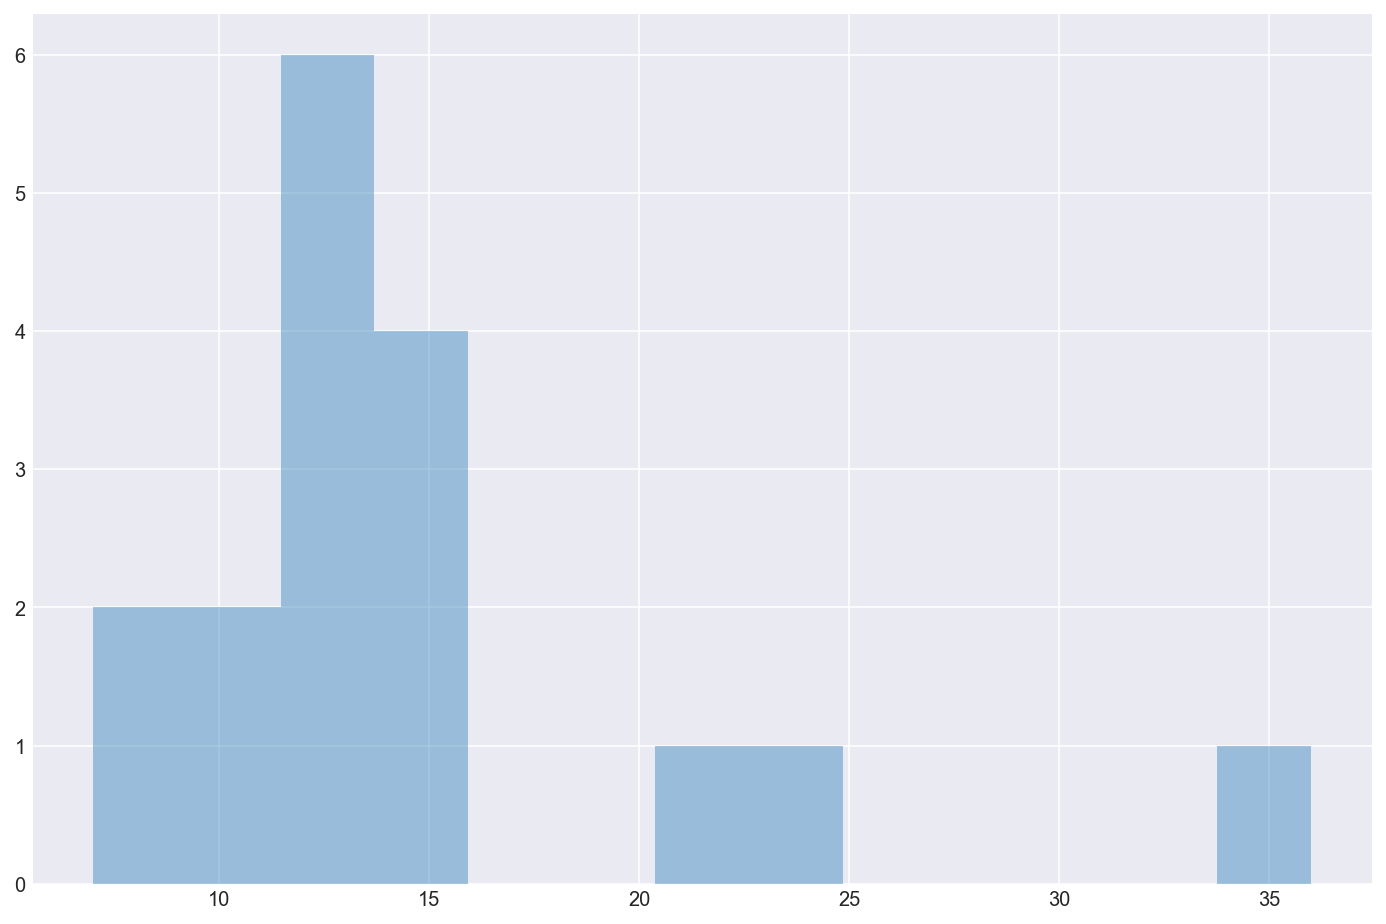

In [142]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

sns.distplot(painReleiver, kde=False, ax=ax)
plt.show()

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


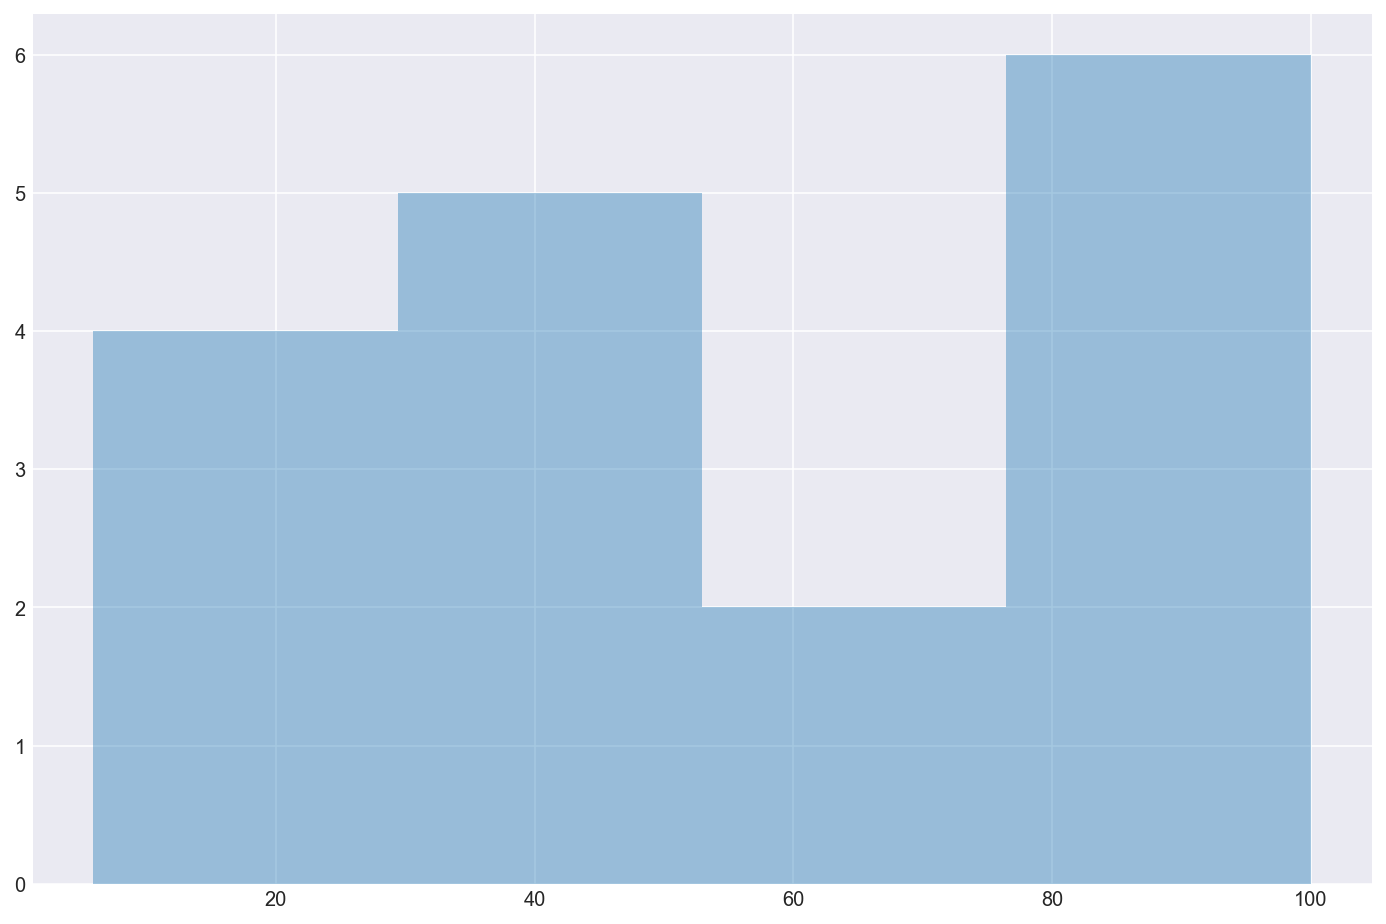

In [143]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

sns.distplot(painReleiverPct, kde=False, ax=ax)
plt.show()

After coverting raw scores to percentile, it looks less skewwed

In [144]:
dict(zip(painReleiver, painReleiverPct))

{36.0: 100.0,
 14.0: 64.70588235294117,
 12.0: 41.1764705882353,
 10.0: 20.58823529411765,
 7.0: 5.882352941176471,
 9.0: 11.764705882352942,
 15.0: 76.47058823529412,
 13.0: 58.8235294117647,
 22.0: 88.23529411764706,
 24.0: 94.11764705882354}

In [145]:
dict(zip(sorted(painReleiver), sorted(painReleiverPct)))

{7.0: 5.882352941176471,
 9.0: 11.764705882352942,
 10.0: 20.58823529411765,
 12.0: 41.1764705882353,
 13.0: 58.8235294117647,
 14.0: 64.70588235294117,
 15.0: 76.47058823529412,
 22.0: 88.23529411764706,
 24.0: 94.11764705882354,
 36.0: 100.0}